# Aim: Amazon product review analysis
1. Analyze and monitor the entire review history: tone, language, keywords, trends 
2. To provide insights that increase the success rate of existing and new products and marketing campaigns

### Product datasets:
Toys_and_Games

# Scenario: Inventory optimization and demand forecasting
1. Identify product categories- clustering as an outcome of text processing
2. Predict products that could be in demand- time series analysis

---

# Data acquisition

In [1]:
import pandas as pd
import gzip
import json

import warnings
warnings.filterwarnings('ignore')

In [2]:
def parse(path):
    g = gzip.open(path, 'r')
    for l in g:
        yield json.loads(l)
        
def parse(path):
    g = gzip.open(path, 'rb')
    for l in g:
        yield json.loads(l)

def getDF(path):
    i = 0
    df = {}
    for d in parse(path):
        df[i] = d
        i += 1
    return pd.DataFrame.from_dict(df, orient='index')

### Review dataset & Product dataset

In [3]:
tg = getDF('F:/NIIT/Capstone Project/Resources/Toys_and_Games_5.json.gz')                      
mtg = getDF('F:/NIIT/Capstone Project/Resources/meta_Toys_and_Games.json.gz')                  

# Data collection

In [4]:
import re                     
import numpy as np

### Review dataset

In [5]:
print('Toys_and_Games')
display(tg.head(3))

print('Shape:',tg.shape)
    
print('COLUMN'.ljust(18),'DATATYPE'.ljust(10),'NULL VALUES')
print('--'*20)
for i in tg.columns:
    nanp = tg[i].isnull().sum()/len(tg[i])*100
    print(f'{i:18} {str(tg[i].dtype):10} {nanp:.2f}%')

Toys_and_Games


overall vote  verified  reviewTime      reviewerID        asin  \
0      5.0    3      True  10 6, 2013  A2LSCFZM2FBZK7  0486427706   
1      5.0    9      True  08 9, 2013  A3IXP5VS847GE5  0486427706   
2      5.0  NaN      True  04 5, 2016  A1274GG1EB2JLJ  0486427706   

                       style                     reviewerName  \
0  {'Format:': ' Paperback'}                           Ginger   
1  {'Format:': ' Paperback'}  Dragonflies &amp; Autumn Leaves   
2  {'Format:': ' Paperback'}                      barbara ann   

                                          reviewText  \
0  The stained glass pages are pretty cool. And i...   
1  My 11 y.o. loved this...and so do I (you know ...   
2  The pictures are great , I've done one and gav...   

                                             summary  unixReviewTime image  
0                                          Nice book      1381017600   NaN  
1                                     Great pictures      1376006400   NaN  
2  The pictures are great, I've done one and gave...      1459814400   NaN

Shape: (1828971, 12)
COLUMN             DATATYPE   NULL VALUES
----------------------------------------
overall            float64    0.00%
vote               object     88.63%
verified           bool       0.00%
reviewTime         object     0.00%
reviewerID         object     0.00%
asin               object     0.00%
style              object     71.38%
reviewerName       object     0.01%
reviewText         object     0.06%
summary            object     0.02%
unixReviewTime     int64      0.00%
image              object     97.74%


Obaservation:
Fields in Toys_and_Games that had more than 70% missing values: vote, style, and image

Since those fields don't have much information those fields are dropped

In [6]:
# for reusability
tgc = tg.copy()


# dropping fields that don't have information
tgc = tgc.drop(['vote','style','image'],axis=1)


# fields that aren't relavant
tgc = tgc.drop(['reviewerID','reviewerName','unixReviewTime'],axis=1)


# changing to relevant data types
tgc['reviewTime'] = pd.to_datetime(tgc['reviewTime'])

In [7]:
print('Toys_and_Games')
print('Shape:',tgc.shape)

print('COLUMN'.ljust(18),'DATATYPE'.ljust(10),'NULL VALUES')
print('--'*20)
for i in tgc.columns:
    nanp = tgc[i].isnull().sum()/len(tgc[i])*100
    print(f'{i:18} {str(tgc[i].dtype):15} {nanp:.2f}%')

Toys_and_Games
Shape: (1828971, 6)
COLUMN             DATATYPE   NULL VALUES
----------------------------------------
overall            float64         0.00%
verified           bool            0.00%
reviewTime         datetime64[ns]  0.00%
asin               object          0.00%
reviewText         object          0.06%
summary            object          0.02%


### Metadata

In [8]:
# for reusability 
mtgc = mtg.copy() 

display(mtgc.head(3))

print('Meta Toys_and_Games')
print('Shape:',mtgc.shape)

print('COLUMN'.ljust(18),'DATATYPE'.ljust(10),'NULL VALUES')
print('--'*20)
for i in mtgc.columns:
    nanp = mtgc[i].isnull().sum()/len(mtgc[i])*100
    print(f'{i:18} {str(mtgc[i].dtype):10} {nanp:.2f}%')

category tech1  \
0  [Toys & Games, Puzzles, Jigsaw Puzzles]         
1                                       []         
2                                       []         

                                         description fit  \
0  [Three Dr. Suess' Puzzles: Green Eggs and Ham,...       
1  [<b>Prepare to be Afraid!</b><br /><br />The B...       
2                                                 []       

                                            title also_buy tech2  \
0  Dr. Suess 19163 Dr. Seuss Puzzle 3 Pack Bundle       []         
1     Pathfinder: Book of Beasts - Legendary Foes       []         
2                        Nursery Rhymes Felt Book       []         

                                           brand  \
0                                      Dr. Seuss   
1  Pathfinder Roleplaying Jon Brazer Productions   
2                                   Betty Lukens   

                                             feature  \
0  [Three giant floor puzzles, Includes: Dr. Sues...   
1                                                 []   
2                                                 []   

                                                rank also_view      main_cat  \
0  [>#2,230,717 in Toys & Games (See Top 100 in T...        []  Toys & Games   
1  [>#2,294,535 in Toys & Games (See Top 100 in T...        []  Toys & Games   
2  [>#2,871,983 in Toys & Games (See Top 100 in T...        []  Toys & Games   

  similar_item date                                              price  \
0                                                                        
1                    .a-box-inner{background-color:#fff}#alohaBuyBo...   
2                    .a-box-inner{background-color:#fff}#alohaBuyBo...   

         asin                                           imageURL  \
0  0000191639  [https://images-na.ssl-images-amazon.com/image...   
1  0004950763                                                 []   
2  0005069491                                                 []   

                                     imageURLHighRes details  
0  [https://images-na.ssl-images-amazon.com/image...     NaN  
1                                                 []     NaN  
2                                                 []     NaN

Meta Toys_and_Games
Shape: (633883, 19)
COLUMN             DATATYPE   NULL VALUES
----------------------------------------
category           object     0.00%
tech1              object     0.00%
description        object     0.00%
fit                object     0.00%
title              object     0.00%
also_buy           object     0.00%
tech2              object     0.00%
brand              object     0.00%
feature            object     0.00%
rank               object     0.00%
also_view          object     0.00%
main_cat           object     0.00%
similar_item       object     0.00%
date               object     0.00%
price              object     0.00%
asin               object     0.00%
imageURL           object     0.00%
imageURLHighRes    object     0.00%
details            object     0.23%


In [9]:
def text_to_currency(df,col):
    '''Returns a series of float value
    Parameters: DataFrame df, Field col'''
    
    import re
    import numpy as np
    
    for i in df[col].index:
        item = df[col][i]
        res = re.compile('(\$\d+\.\d+)').findall(item)
        if res:
            df[col][i] = float(re.sub('\$','',res[0]))
        else: 
            df[col][i] = np.nan
            
    return df[col]

In [10]:
# changing data types
mtgc['price'] = text_to_currency(mtgc,'price')

mtgc['price'] = mtgc['price'].astype(float)

In [11]:
# dropping blank + irrelavant fields
mtgc.drop(['tech1','description','fit','also_buy','tech2','feature','rank','also_view','similar_item','date',
           'imageURL','imageURLHighRes','details','title'],
          axis=1,inplace=True)

In [12]:
print('Meta Toys_and_Games')
print('Shape:',mtgc.shape)

print('COLUMN'.ljust(18),'DATATYPE'.ljust(10),'NULL VALUES')
print('--'*20)
for i in mtgc.columns:
    nanp = mtgc[i].isnull().sum()/len(mtgc[i])*100
    print(f'{i:18} {str(mtgc[i].dtype):10} {nanp:.2f}%')

Meta Toys_and_Games
Shape: (633883, 5)
COLUMN             DATATYPE   NULL VALUES
----------------------------------------
category           object     0.00%
brand              object     0.00%
main_cat           object     0.00%
price              float64    50.29%
asin               object     0.00%


# Data merging
Merging reviews and product into a single dataset

In [13]:
data = tgc.merge(mtgc,how='inner',on='asin')

print('Toys_and_Games')
print('Shape:',data.shape)


print('COLUMN'.ljust(18),'DATATYPE'.ljust(15),'NULL VALUES')
print('--'*20)
for i in data.columns:
    nanp = data[i].isnull().sum()/len(data[i])*100
    print(f'{i:18} {str(data[i].dtype):15} {nanp:.2f}%')

Toys_and_Games
Shape: (1884953, 10)
COLUMN             DATATYPE        NULL VALUES
----------------------------------------
overall            float64         0.00%
verified           bool            0.00%
reviewTime         datetime64[ns]  0.00%
asin               object          0.00%
reviewText         object          0.06%
summary            object          0.02%
category           object          0.00%
brand              object          0.00%
main_cat           object          0.00%
price              float64         26.12%


In [14]:
# deleting the records containing missing values
# since the products not having price don't have and details for appropriate mean/median imputation  
# and imputation of category/brand wise means data manipulation and might/not condratict the actual data
data = data.dropna(axis=0)


# picking out only the necessary category for the 
data = data[data.main_cat=='Toys & Games'].drop('main_cat',axis=1)


# resetting the index afer dropping 
data = data.reset_index()
data = data.drop(['index'],axis = 1)

In [15]:
print('Toys_and_Games')
print('Shape:',data.shape)


print('COLUMN'.ljust(18),'DATATYPE'.ljust(15),'NULL VALUES')
print('--'*20)
for i in data.columns:
    nanp = data[i].isnull().sum()/len(data[i])*100
    print(f'{i:18} {str(data[i].dtype):15} {nanp:.2f}%')

Toys_and_Games
Shape: (1280016, 9)
COLUMN             DATATYPE        NULL VALUES
----------------------------------------
overall            float64         0.00%
verified           bool            0.00%
reviewTime         datetime64[ns]  0.00%
asin               object          0.00%
reviewText         object          0.00%
summary            object          0.00%
category           object          0.00%
brand              object          0.00%
price              float64         0.00%


In [16]:
# for reusability
df = data.copy()

df['category'] = df['category'].astype(str)


print('Cleaned data')
print('Shape:',df.shape)


print('COLUMN'.ljust(18),'DATATYPE'.ljust(15),'NULL VALUES')
print('--'*20)
for i in df.columns:
    nanp = df[i].isnull().sum()/len(df[i])*100
    print(f'{i:18} {str(df[i].dtype):15} {nanp:.2f}%')

Cleaned data
Shape: (1280016, 9)
COLUMN             DATATYPE        NULL VALUES
----------------------------------------
overall            float64         0.00%
verified           bool            0.00%
reviewTime         datetime64[ns]  0.00%
asin               object          0.00%
reviewText         object          0.00%
summary            object          0.00%
category           object          0.00%
brand              object          0.00%
price              float64         0.00%


# Data exploration

In [17]:
print(df['category'].nunique())
df['category'].unique()

718


array(["['Toys & Games', 'Arts & Crafts', 'Craft Kits']",
       "['Toys & Games', 'Games', 'Card Games']",
       "['Toys & Games', 'Stuffed Animals & Plush Toys', 'Plush Figures']",
       "['Toys & Games', 'Novelty & Gag Toys', 'Nesting Dolls']", '[]',
       "['Toys & Games', 'Puzzles', 'Floor Puzzles']",
       "['Toys & Games', 'Puzzles', 'Jigsaw Puzzles']",
       "['Toys & Games', 'Learning & Education']",
       "['Toys & Games', 'Games', 'Board Games']",
       "['Toys & Games', 'Arts & Crafts', 'Stickers']",
       "['Toys & Games', 'Dolls & Accessories', 'Dolls']",
       "['Toys & Games', 'Puzzles', 'Brain Teasers']",
       "['Toys & Games', 'Novelty & Gag Toys', 'Money Banks']",
       "['Toys & Games', 'Games', 'Game Accessories']",
       "['Toys & Games', 'Learning & Education', 'Musical Instruments', 'Accessories']",
       "['Toys & Games', 'Baby & Toddler Toys']",
       "['Toys & Games', 'Stuffed Animals & Plush Toys']",
       "['Toys & Games', 'Games']",
       

In [19]:
indi_games_cat = []
for i in data['category'].index:
    for icat in data['category'][i]:
        if icat not in indi_games_cat:
            indi_games_cat.append(icat)

print('Individual games category:',len(indi_games_cat))

Individual games category: 1363


#### NOTE
Since the individial games category are immense and more of which aren't categorized properly, example. remarks and descriptions are also considered as categories and cleaning them are then proccesing is highly compulational expensive, the list of categories will henceforth be considered as the main category

In [20]:
df = df[df['category']!='[]']
print('Data shape:',df.shape)

Data shape: (1207194, 9)


#### NOTE
Some empty values like '[]' are noted which do not convey any information. Hence those are dropped.

In [21]:
print(df['brand'].nunique())
df['brand'].unique()

5111


array(['Klutz', 'Therapy Game HQ', 'Yottoy', ...,
       'Dunwoody Specialty Sales - Classic Car Sets', 'Sproutoy', 'Rowiz'],
      dtype=object)

In [22]:
df['asin'].value_counts()

B00WR5357G    2178
B00000K3BR    1988
B000ZKPOTM    1902
B001543YEY    1781
B000197NXM    1584
              ... 
B000YQW2MY       1
B000Z4DOXG       1
B00144DZIA       1
B0017TO82Y       1
B0010AMXNG       1
Name: asin, Length: 46266, dtype: int64

In [23]:
df['asin'].value_counts().describe().to_frame().T

count       mean        std  min  25%   50%   75%     max
asin  46266.0  26.092465  55.555569  1.0  7.0  12.0  25.0  2178.0

#### INFERENCE
Min = 1 and q3 = 25 whereas max = 2178: Review distribution in products is not uniform

# Data visualization

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
df['overall'].value_counts().plot(kind='bar',color='r',figsize=(8,5))
plt.grid(axis='y')

#### INFERENCE
Higher number of 5/5 reviews implies most customers are pleased with the products and services

<AxesSubplot:>

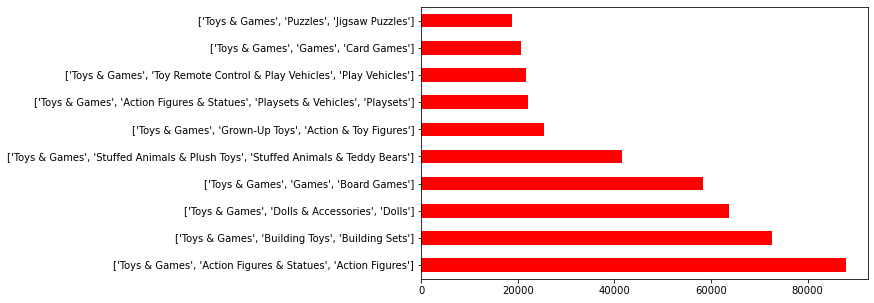

In [26]:
df['category'].value_counts()[:10].plot(kind='barh',color='r',figsize=(8,5))

#### INFERENCE
Action figures and action statues are the top on review stand, its well spoken about- very popular among customers

In [27]:
df['verified'].value_counts().plot(kind='bar',color='r',figsize=(8,5))
plt.grid(axis='y')

#### INFERENCE
Most of the reviewed products are verified

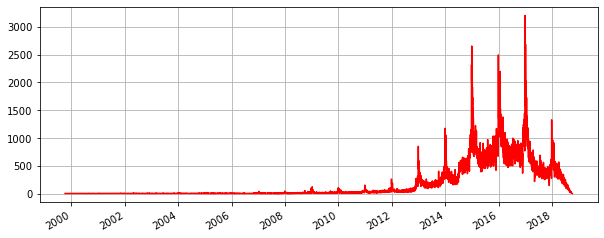

In [28]:
df['reviewTime'].value_counts().plot(color='r',figsize=(10,4))
plt.grid()

#### INFERENCE
The performance of product popularity ie. the review collection has remained in the same range till 2012. The number of reviews or say the popularity of products hit its epitome between 2015-17

In [29]:
from statsmodels.tsa.seasonal import seasonal_decompose

decompose = seasonal_decompose(df['reviewTime'].value_counts().to_frame(),period=365)

fig,ax = plt.subplots(3,1,figsize=(10,12))
decompose.trend.plot(ax=ax[0],color='r')
decompose.seasonal.plot(ax=ax[1],color='r')
decompose.resid.plot(ax=ax[2],color='r')

<AxesSubplot:>

#### INFERENCE
Trend and residuals are related- The residuals are high when the popularity is high

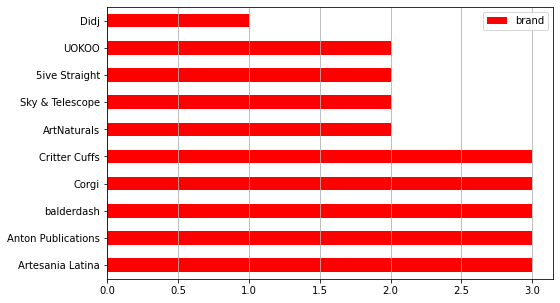

In [30]:
df['brand'].value_counts().to_frame()[:10].plot(kind='barh',color='r',figsize=(8,5))
plt.grid(axis='x')

df['brand'].value_counts().to_frame()[-11:-1].plot(kind='barh',color='r',figsize=(8,5))
plt.grid(axis='x')

#### INFERENCE
Melissa & Dough is the most popular brand and Didj is the least popular brand

#### BUSINESS INSIGHTS
* Most customers are pleased with the products and services
* Action figures and action statues are the most popular
* Most of the reviewed products are verified
* The popularity of products hit its epitome between 2015-17
* Trend and residuals are related- The residuals are high when the popularity is high
* Melissa & Dough is the most popular brand and Didj is the least popular brand


* Toys and Games hit its epitome between 2015-17
* Relationship can be observed between price and ratings: directly proportional.
* [Action figures] receive the highest ratings. In spite of being the most expensive of all toys [Building toys, Building sets] maintains second in total ratings throughout the time.
* Fisher-Price is the oldest brand member and has been maintaining stand though many other younger brands have surpassed it. 
* LEGO is the expensive younger brand receiving high ratings.

* Poorly rated categories and brands have inconsistent performance. They are only short lived 1-3 years.
* All the poor reviewed categories are expensive and related to [costumes].
* Brands have seen decline in performance before termination. Artesania Latina is a just born brand showing increase in ratings but slow


* FantasyFlightGames has the highest variety and products. But MerryMakers has the highest number products despite lesser variety of products.
* Melissa&Dough is the most popular producer of non-expensive products
* Most products of toys are Action Figures, the average price of action figure toy is above average than the price of other toys
* Most variety and most products is in the category of [toys&games, games, board games]. Category having the highest products: variety ratio is [toys&games, games, tile games]


* Despite having some variety 1967 MILTON BRADLEY-MB doesn’t produce many products.
* ArtNaturals is the most non-expensive brand among least popular products and has the highest rating/price ratio.
* Art toy products are the least expensive and the least reviewed category.
* Despite having variety [Party Supplies] are the least reviewed category.

---

# Sentiment Analysis
Sentiment analysis, also referred to as opinion mining, is an approach that identifies the emotional tone behind a body of text: positive, negative and neutral

In [34]:
data = pd.read_csv('F:/NIIT/Capstone Project/Data_merge.csv')

In [35]:
data.dropna(axis=0,inplace=True)

In [36]:
data.drop('Unnamed: 0',axis=1,inplace=True)

data['reviewTime'] = pd.to_datetime(data['reviewTime'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1205727 entries, 0 to 1207193
Data columns (total 9 columns):
 #   Column      Non-Null Count    Dtype         
---  ------      --------------    -----         
 0   overall     1205727 non-null  float64       
 1   verified    1205727 non-null  bool          
 2   reviewTime  1205727 non-null  datetime64[ns]
 3   asin        1205727 non-null  object        
 4   reviewText  1205727 non-null  object        
 5   summary     1205727 non-null  object        
 6   category    1205727 non-null  object        
 7   brand       1205727 non-null  object        
 8   price       1205727 non-null  float64       
dtypes: bool(1), datetime64[ns](1), float64(2), object(5)
memory usage: 83.9+ MB


In [37]:
data['reviewText'] = data['reviewText'] + ' ' + data['summary']
data.head()

overall  verified reviewTime        asin  \
0      3.0      True 2014-02-23  0545346193   
1      4.0      True 2012-11-14  0545346193   
2      5.0      True 2015-02-11  0545346193   
3      5.0      True 2015-01-04  0545346193   
4      4.0      True 2016-02-14  0545346193   

                                          reviewText  \
0  The packaging for a draw-your-own DC Universe ...   
1  I'm 37 years old and I just took up drawing ag...   
2       Our little artist loves this kit. Five Stars   
3             love this delivered on time Five Stars   
4  Useful if you want to train your muscle memory...   

                                             summary  \
0  Great Idea But Needs More Instructions & Detai...   
1                                 Good for beginners   
2                                         Five Stars   
3                                         Five Stars   
4                             Great Drawing Practice   

                                          category  brand  price  
0  ['Toys & Games', 'Arts & Crafts', 'Craft Kits']  Klutz  12.92  
1  ['Toys & Games', 'Arts & Crafts', 'Craft Kits']  Klutz  12.92  
2  ['Toys & Games', 'Arts & Crafts', 'Craft Kits']  Klutz  12.92  
3  ['Toys & Games', 'Arts & Crafts', 'Craft Kits']  Klutz  12.92  
4  ['Toys & Games', 'Arts & Crafts', 'Craft Kits']  Klutz  12.92

#### Approach
1. convert ratings into sentiments
2. classification of reviews based on sentiments
    1. preprocess reviews
    2. feature extraction (nlp)
    3. classification modelling of reviews
3. find out the products in the inventory based on the sentiments

## Ratings to sentiments

In [38]:
def predict_sentiment(rating):
    
    '''Returns the sentiment of the rating'''
    if rating < 3:
        sentiment = 'Negative'
    elif rating > 3:
        sentiment = 'Positive'
    else:
        sentiment = 'Neutral'
        
    return sentiment

In [39]:
data['sentiment'] = data['overall'].apply(predict_sentiment)
data.head()

overall  verified reviewTime        asin  \
0      3.0      True 2014-02-23  0545346193   
1      4.0      True 2012-11-14  0545346193   
2      5.0      True 2015-02-11  0545346193   
3      5.0      True 2015-01-04  0545346193   
4      4.0      True 2016-02-14  0545346193   

                                          reviewText  \
0  The packaging for a draw-your-own DC Universe ...   
1  I'm 37 years old and I just took up drawing ag...   
2       Our little artist loves this kit. Five Stars   
3             love this delivered on time Five Stars   
4  Useful if you want to train your muscle memory...   

                                             summary  \
0  Great Idea But Needs More Instructions & Detai...   
1                                 Good for beginners   
2                                         Five Stars   
3                                         Five Stars   
4                             Great Drawing Practice   

                                          category  brand  price sentiment  
0  ['Toys & Games', 'Arts & Crafts', 'Craft Kits']  Klutz  12.92   Neutral  
1  ['Toys & Games', 'Arts & Crafts', 'Craft Kits']  Klutz  12.92  Positive  
2  ['Toys & Games', 'Arts & Crafts', 'Craft Kits']  Klutz  12.92  Positive  
3  ['Toys & Games', 'Arts & Crafts', 'Craft Kits']  Klutz  12.92  Positive  
4  ['Toys & Games', 'Arts & Crafts', 'Craft Kits']  Klutz  12.92  Positive

## Review preprocessing
1. expand shortforms 
2. removing special characters
3. lemmatization
4. stopwords removal (negation)

### expand shortforms

In [40]:
import contractions

In [41]:
data['reviewText'] = data['reviewText'].apply(lambda x:contractions.fix(x))

### removing special characters

In [42]:
import re

In [43]:
def clean_text(text):
    
    '''Return clean version of the text'''
    
    text = text.lower() 
    # Remove all non-letters and non-spaces except for hyphens and digits
    text = re.sub("[^0-9A-Za-z ]+", " ", text)
    # Remove all numbers except those attached to a word
    text = re.sub("(?<!\w)\d+", "", text)
    # Remove multiple spaces
    text = re.sub('\s+',' ',text)
    
    return text

In [44]:
data['reviewText'] = data['reviewText'].apply(clean_text)
data['reviewText'].head()

0    the packaging for a draw your own dc universe ...
1    i am years old and i just took up drawing agai...
2          our little artist loves this kit five stars
3               love this delivered on time five stars
4    useful if you want to train your muscle memory...
Name: reviewText, dtype: object

### lemmatization

In [45]:
import nltk
from nltk.stem import WordNetLemmatizer

In [46]:
def lemmatization(text):
    
    '''Returns the text after lemmatization'''

    lemmatizer = WordNetLemmatizer()
    words = text.split()
    text_lemma = ' '.join(lemmatizer.lemmatize(word) for word in words)
    
    return text_lemma

In [47]:
data['reviewText'] = data['reviewText'].apply(lemmatization)
data['reviewText'].head()

0    the packaging for a draw your own dc universe ...
1    i am year old and i just took up drawing again...
2            our little artist love this kit five star
3                love this delivered on time five star
4    useful if you want to train your muscle memory...
Name: reviewText, dtype: object

### stopwords removal

In [48]:
from spacy.lang.en.stop_words import STOP_WORDS

negation words are removed for appropriate vectorization and therby correct classification

In [49]:
STOP_WORDS -= {'cannot','least','less','neither','never','no','not','nor','none','nobody'}

In [50]:
def remove_stopwords(text):
    
    '''Returns text after removing stopwords'''
    
    new_text = []
    for word in text.split():
        if word not in STOP_WORDS:
            new_text.append(word)
            
    return ' '.join(new_text)

In [51]:
data['reviewText'] = data['reviewText'].apply(remove_stopwords)
data['reviewText'].head()

0    packaging draw dc universe look easy think twi...
1    year old took drawing time high school wa not ...
2                          little artist love kit star
3                             love delivered time star
4    useful want train muscle memory tracing improv...
Name: reviewText, dtype: object

In [52]:
data.head()

overall  verified reviewTime        asin  \
0      3.0      True 2014-02-23  0545346193   
1      4.0      True 2012-11-14  0545346193   
2      5.0      True 2015-02-11  0545346193   
3      5.0      True 2015-01-04  0545346193   
4      4.0      True 2016-02-14  0545346193   

                                          reviewText  \
0  packaging draw dc universe look easy think twi...   
1  year old took drawing time high school wa not ...   
2                        little artist love kit star   
3                           love delivered time star   
4  useful want train muscle memory tracing improv...   

                                             summary  \
0  Great Idea But Needs More Instructions & Detai...   
1                                 Good for beginners   
2                                         Five Stars   
3                                         Five Stars   
4                             Great Drawing Practice   

                                          category  brand  price sentiment  
0  ['Toys & Games', 'Arts & Crafts', 'Craft Kits']  Klutz  12.92   Neutral  
1  ['Toys & Games', 'Arts & Crafts', 'Craft Kits']  Klutz  12.92  Positive  
2  ['Toys & Games', 'Arts & Crafts', 'Craft Kits']  Klutz  12.92  Positive  
3  ['Toys & Games', 'Arts & Crafts', 'Craft Kits']  Klutz  12.92  Positive  
4  ['Toys & Games', 'Arts & Crafts', 'Craft Kits']  Klutz  12.92  Positive

---

# Classification
Supervised Learning technique that is used to identify the category of new observations on the basis of training data

### CHALLENGES 
1. large data size
2. unbalance in data

### SOLUTION HYPOTHESIS
1. data after 2012                                                      - REJECTED        - no significant reduction
2. choose the time period that has the maximum reviews i.e 2015-17      - REJECTED        - no significant reduction
3. choose stratifies random sampling for years after 2012               - ACCEPTED

In [53]:
print('population data:',data.shape)

population data: (1205727, 10)


In [54]:
data['sentiment'].value_counts()

Positive    1049113
Neutral       82129
Negative      74485
Name: sentiment, dtype: int64

In [55]:
# data after 2012
d = data[(data['reviewTime']>'2011-12-31')]
print(d.shape)

print(d['sentiment'].value_counts())

(1170969, 10)
Positive    1020338
Neutral       79039
Negative      71592
Name: sentiment, dtype: int64


In [56]:
# data for time period that has the maximum reviews i.e 2015-17
d = data[(data['reviewTime']>'2014-12-31')&(data['reviewTime']<'2018-01-01')]
print(d.shape)

print(d['sentiment'].value_counts())

(809647, 10)
Positive    708021
Neutral      52436
Negative     49190
Name: sentiment, dtype: int64


In [57]:
# stratified random sampling 10% of each sentiment

grouped = data.groupby('sentiment')
group_names = data['sentiment'].unique()

sample = pd.DataFrame()

for g in group_names:
    igroup = grouped.get_group(g)
    temp_sample = igroup.sample(frac=0.05,replace=False)
    sample = sample.append(temp_sample,ignore_index=True)

In [58]:
sample.shape

(60286, 10)

In [59]:
sample['sentiment'].value_counts()

Positive    52456
Neutral      4106
Negative     3724
Name: sentiment, dtype: int64

### Hypothesis testing: Mood's median test
Is a non-parametric statistical test that works on 2 or more groups to compare the ordinal data distribution based on their median.

Null hypothesis: Medians of the groups are equal
Alternate hypothesis: Medians of the groups are not equal

In [60]:
p = pd.DataFrame(data['sentiment'].value_counts()).rename({'sentiment':'frequency'},axis=1)
p = p.sort_values(by='frequency',ascending=True)
p

frequency
Negative      74485
Neutral       82129
Positive    1049113

In [61]:
s = pd.DataFrame(sample['sentiment'].value_counts()).rename({'sentiment':'frequency'},axis=1)
s = s.sort_values(by='frequency',ascending=True)
s

frequency
Negative       3724
Neutral        4106
Positive      52456

In [62]:
# significance level = 5%
alpha = 0.05

# df = number of sample groups - 1
df = 1

In [63]:
from scipy.stats import median_test

res = median_test(p['frequency'].values,s['frequency'].values)

pvalue = res[1]

if pvalue < alpha:
    print('Reject null hypothesis')
    print('Medians of the groups are not equal')
else:
    print('Cannot reject null hypothesis')
    print('Medians of the groups are equal')

Cannot reject null hypothesis
Medians of the groups are equal


#### INFERENCE
Sample represents population- sample can be used for modelling

---

## Vectorization

In [64]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [65]:
x = sample['reviewText']
y = sample['sentiment']

tfidf = TfidfVectorizer()
X = tfidf.fit_transform(x)

In [66]:
from sklearn.preprocessing import LabelEncoder

In [67]:
encoder = LabelEncoder()
Y = encoder.fit_transform(y)

## Data splitting

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=777)

print('x:',x_train.shape,x_test.shape)
print('y:',y_train.shape,y_test.shape)

x: (48228, 29419) (12058, 29419)
y: (48228,) (12058,)


# Modelling
for multi-classification: KNeighborsClassifier, Naive-bayes, DecisionTreeClassifier, RandomForestClassifier(Bagging), AdaBoost, Stacking

In [70]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, precision_score, recall_score

## KNeighbors
computes classification from majority of vote of knearest neighbors

In [71]:
from sklearn.neighbors import KNeighborsClassifier

### finding the parameters for maximum score
k = number of neighbors for the maximum score \
odd number is preferred to ommit equal voting of neighbors

In [72]:
score = dict()
up = 10

for k in range(1,up,2):
    temp_knn = KNeighborsClassifier(n_neighbors=k).fit(x_train,y_train) 
    temp_score = temp_knn.score(x_test,y_test)
    score[k] = temp_score
    
best_k = max(score,key=lambda i:score[i])
print('Best k =',best_k)

Best k = 7


### training

In [73]:
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(x_train,y_train)

print('KNeighborsClassifier: Training accuracy:',knn.score(x_train,y_train))

KNeighborsClassifier: Training accuracy: 0.8761715186198888


### testing

In [74]:
y_knn = knn.predict(x_test)

print('KNeighborsClassifier: Testing accuracy:',accuracy_score(y_test,y_knn))

KNeighborsClassifier: Testing accuracy: 0.8734450157571737


### evaluation

Text(33.0, 0.5, 'actual\n')

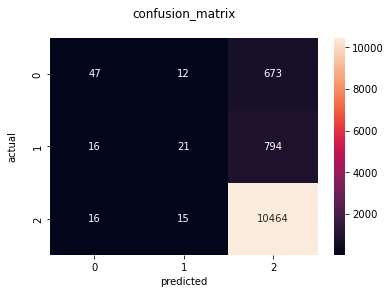

In [75]:
sns.heatmap(confusion_matrix(y_test,y_knn),annot=True,fmt='d')
plt.title('confusion_matrix\n')
plt.xlabel('predicted\n')
plt.ylabel('actual\n')

In [76]:
print('Classification report:\n',classification_report(y_test,y_knn))

Classification report:
               precision    recall  f1-score   support

           0       0.59      0.06      0.12       732
           1       0.44      0.03      0.05       831
           2       0.88      1.00      0.93     10495

    accuracy                           0.87     12058
   macro avg       0.64      0.36      0.37     12058
weighted avg       0.83      0.87      0.82     12058



In [77]:
imbal = pd.DataFrame({'KNeighborsClassifier':
                    [accuracy_score(y_test,y_knn),
                     precision_score(y_test,y_knn,average='weighted'),
                    recall_score(y_test,y_knn,average='weighted'),
                    f1_score(y_test,y_knn,average='weighted')]},
                   index=['accuracy','precision','recall','f1_score'])


# Naive-Bayes
assumes each imput is independent and is based on Bayes theorem

In [78]:
from sklearn.naive_bayes import MultinomialNB

### training

In [79]:
nb = MultinomialNB()
nb.fit(x_train,y_train)

print('MultinomialNB: Taining accuracy:',nb.score(x_train,y_train))

MultinomialNB: Taining accuracy: 0.8709048685410965


### testing

In [80]:
y_nb = nb.predict(x_test)
print('MultinomialNB: Testing accuracy:',accuracy_score(y_test,y_nb))

MultinomialNB: Testing accuracy: 0.8709570409686516


### evaluation

Text(33.0, 0.5, 'actual\n')

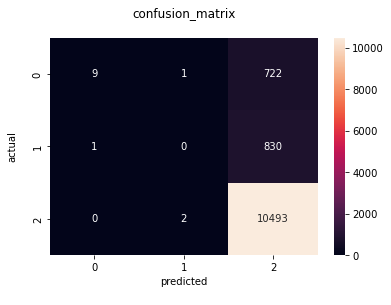

In [81]:
sns.heatmap(confusion_matrix(y_test,y_nb),annot=True,fmt='d')
plt.title('confusion_matrix\n')
plt.xlabel('predicted\n')
plt.ylabel('actual\n')

In [82]:
print('Classification report:\n',classification_report(y_test,y_nb))

Classification report:
               precision    recall  f1-score   support

           0       0.90      0.01      0.02       732
           1       0.00      0.00      0.00       831
           2       0.87      1.00      0.93     10495

    accuracy                           0.87     12058
   macro avg       0.59      0.34      0.32     12058
weighted avg       0.81      0.87      0.81     12058



In [83]:
imbal['MultinomialNB'] = [accuracy_score(y_test,y_nb),precision_score(y_test,y_nb,average='weighted'),
                    recall_score(y_test,y_nb,average='weighted'), f1_score(y_test,y_nb,average='weighted')]


## DecisionTreeClassifier
produces a sequence of rules that can be used to classify the data

In [84]:
from sklearn import tree
from sklearn.tree import plot_tree

In [85]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_val_score

### finding the parameters for maximum score
parameters: max_dept, min_samples_leaf

In [86]:
max_depth = list(range(2,20,2))
cv=KFold(n_splits=5)

score = dict()

for depth in max_depth:
    iscore = cross_val_score(tree.DecisionTreeClassifier(max_depth=depth, random_state=777),X,Y,cv=cv,scoring="accuracy")
    score[depth] = iscore

depth = max(score,key=lambda i:score[i].mean())
print('Best depth =',depth)

Best depth = 2


In [87]:
min_sam_leaf = list(range(10,100,10))

score = dict()

for min_sam in min_sam_leaf:
    iscore = cross_val_score(tree.DecisionTreeClassifier(min_samples_leaf=min_sam,random_state=777)
                             ,X,Y,cv=cv,scoring="accuracy")
    score[min_sam] = iscore
    
min_sam = max(score,key=lambda i:score[i].mean())
print('Best min_sam_leaf =',min_sam)

Best min_sam_leaf = 80


### training

In [88]:
dtc = DecisionTreeClassifier(max_depth=depth,min_samples_leaf=min_sam)
dtc.fit(x_train,y_train)

print('DecisionTreeClassifier: Training accuracy:',dtc.score(x_train,y_train))

DecisionTreeClassifier: Training accuracy: 0.8708633988554366


### testing

In [89]:
y_dtc = dtc.predict(x_test)
print('DecisionTreeClassifier: Testing accuracy:',accuracy_score(y_test,y_dtc))

DecisionTreeClassifier: Testing accuracy: 0.8712887709404544


### evaluation

Text(0.5, 1.0, 'confusion_matrix')

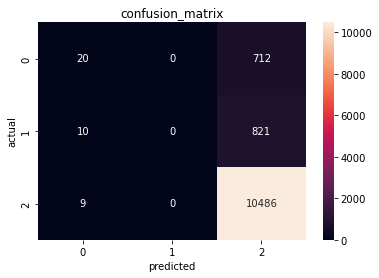

In [90]:
sns.heatmap(confusion_matrix(y_test,y_dtc),annot=True,fmt='d')
plt.xlabel('predicted')
plt.ylabel('actual')
plt.title('confusion_matrix')

In [91]:
print('Classification report:\n',classification_report(y_test,y_dtc))

Classification report:
               precision    recall  f1-score   support

           0       0.51      0.03      0.05       732
           1       0.00      0.00      0.00       831
           2       0.87      1.00      0.93     10495

    accuracy                           0.87     12058
   macro avg       0.46      0.34      0.33     12058
weighted avg       0.79      0.87      0.81     12058



### model representation

In [92]:
plt.figure(figsize=(20,10))
plot_tree(DecisionTreeClassifier(max_depth=depth,min_samples_leaf=min_sam,random_state=1).fit(x_train,y_train),
         fontsize=10,filled=True);

In [93]:
imbal['DecisionTreeClassifier'] = [accuracy_score(y_test,y_dtc),precision_score(y_test,y_dtc,average='weighted'),
                    recall_score(y_test,y_dtc,average='weighted'), f1_score(y_test,y_dtc,average='weighted')]


## RandomForestClassifier
bagging ensemble technique: that is a strong learner- combination of multiple homogeneous weak learners \
learning happens parallel and the final class is predicted based on hard voting

In [94]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

### training

In [95]:
params={'n_estimators':list(range(1,10,2))}

grid_search_rfc = GridSearchCV(estimator=RandomForestClassifier(max_depth=depth,min_samples_leaf=min_sam,random_state=777),
                             param_grid=params,cv=5,n_jobs=-1)
grid_search_rfc.fit(x_train,y_train)

print(grid_search_rfc.best_estimator_)
print('RandomForestClassifier: Training accuracy:',grid_search_rfc.best_estimator_.score(x_train,y_train))

RandomForestClassifier(max_depth=2, min_samples_leaf=80, n_estimators=1,
                       random_state=777)
RandomForestClassifier: Training accuracy: 0.8719001409969312


### testing

In [96]:
y_rfc = grid_search_rfc.predict(x_test)
print('RandomForestClassifier: Testing accuracy:',accuracy_score(y_test,y_rfc))

RandomForestClassifier: Testing accuracy: 0.8712887709404544


### evaluation

Text(0.5, 1.0, '\nConfusion matrix\n')

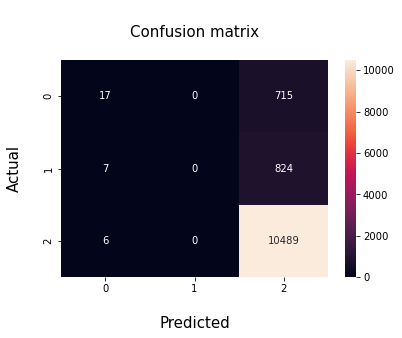

In [97]:
sns.heatmap(confusion_matrix(y_test,y_rfc,),annot=True,fmt='d')
plt.xlabel('\nPredicted',fontsize=15)
plt.ylabel('Actual\n',fontsize=15)
plt.title('\nConfusion matrix\n',fontsize=15)

In [98]:
print('\nClassification report:')
print(classification_report(y_test,y_rfc))


Classification report:
              precision    recall  f1-score   support

           0       0.57      0.02      0.04       732
           1       0.00      0.00      0.00       831
           2       0.87      1.00      0.93     10495

    accuracy                           0.87     12058
   macro avg       0.48      0.34      0.33     12058
weighted avg       0.79      0.87      0.81     12058



### model representation

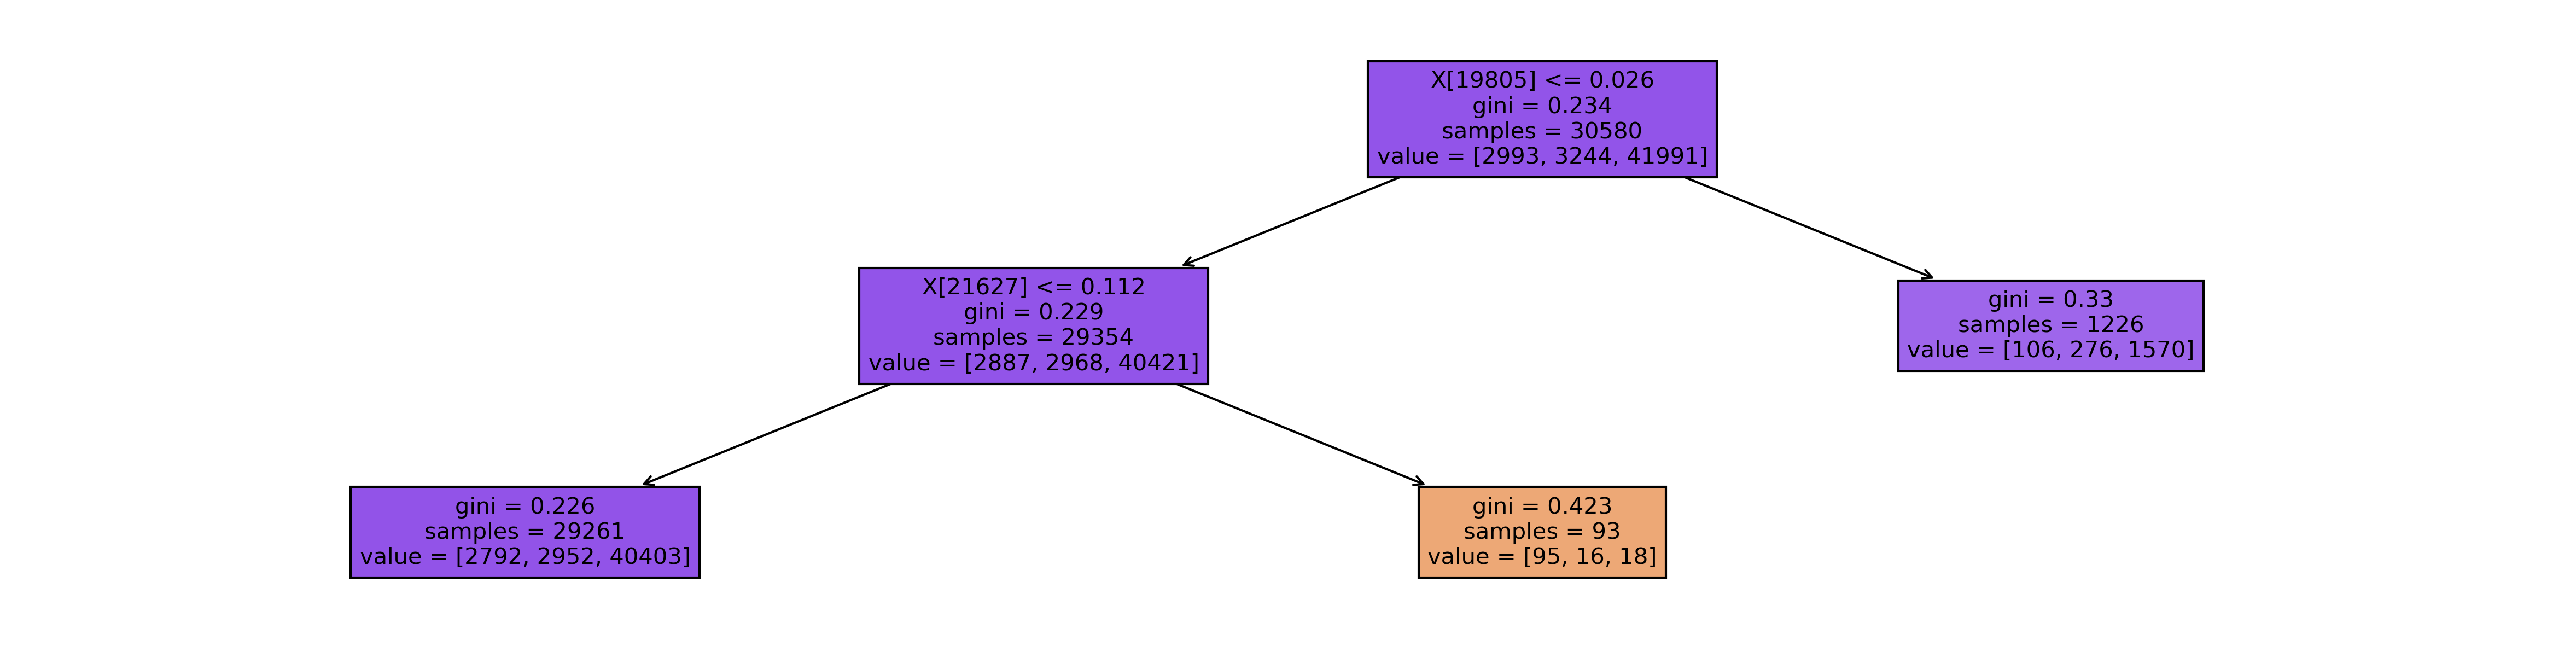

In [99]:
plt.figure(figsize=(20,5),dpi=300)
plot_tree(RandomForestClassifier(max_depth=2,min_samples_leaf=90,n_estimators=1,random_state=777).
          fit(x_train,y_train).estimators_[0],fontsize=10,filled=True);

In [100]:
imbal['RandomForestClassifier'] = [accuracy_score(y_test,y_rfc),precision_score(y_test,y_rfc,average='weighted'),
                    recall_score(y_test,y_rfc,average='weighted'), f1_score(y_test,y_rfc,average='weighted')]


## AdaBoost
boosting ensemble technique: that is a combination of multiple weal learners \
learning happens sequentially 

In [101]:
from sklearn.ensemble import AdaBoostClassifier

### training

In [102]:
ab=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=depth, random_state=777),
                     random_state=777,n_estimators=1)
ab.fit(x_train,y_train)

print('AdaBoost: Taining accuracy:',ab.score(x_train,y_train))

AdaBoost: Taining accuracy: 0.8708633988554366


### testing

In [103]:
y_ab=ab.predict(x_test)
print('AdaBoost: Testing accuracy:',accuracy_score(y_test,y_ab))

AdaBoost: Testing accuracy: 0.8712887709404544


### evaluation

Text(0.5, 1.0, '\nConfusion matrix\n')

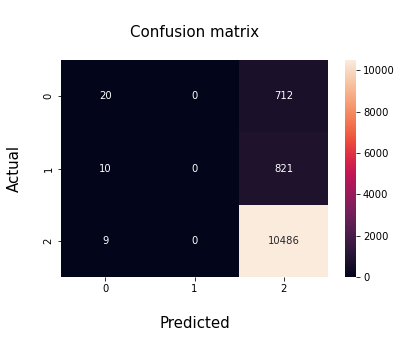

In [104]:
sns.heatmap(confusion_matrix(y_test,y_ab,),annot=True,fmt='d')
plt.xlabel('\nPredicted',fontsize=15)
plt.ylabel('Actual\n',fontsize=15)
plt.title('\nConfusion matrix\n',fontsize=15)

In [105]:
print('\nClassification report:')
print(classification_report(y_test,y_ab))


Classification report:
              precision    recall  f1-score   support

           0       0.51      0.03      0.05       732
           1       0.00      0.00      0.00       831
           2       0.87      1.00      0.93     10495

    accuracy                           0.87     12058
   macro avg       0.46      0.34      0.33     12058
weighted avg       0.79      0.87      0.81     12058



### model representation

In [106]:
plot_tree(AdaBoostClassifier(random_state=777).fit(x_train,y_train).estimators_[0],fontsize=10,filled=True);

In [107]:
imbal['AdaBoost'] = [accuracy_score(y_test,y_ab),precision_score(y_test,y_ab,average='weighted'),
                    recall_score(y_test,y_ab,average='weighted'), f1_score(y_test,y_ab,average='weighted')]


# Stacking
ensemble method in which the predictions, generated by using various machine learning algorithms, are used as inputs in a second-layer learning algorithm. This second-layer algorithm is trained to optimally combine the model predictions to form a new set of predictions

In [108]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

### training

In [109]:
level0=[('dtree', DecisionTreeClassifier()),('nb',MultinomialNB())] 
level1 = LogisticRegression()

sc = StackingClassifier(estimators=level0,final_estimator=level1,cv=3).fit(x_train,y_train)
print('StackingClassifier: Training accuracy:',sc.score(x_train,y_train))

StackingClassifier: Training accuracy: 0.9241726797710873


### testing

In [110]:
y_sc=sc.predict(x_test)
print('StackingClassifier: Testing accuracy:',accuracy_score(y_test,y_sc))

StackingClassifier: Testing accuracy: 0.8867971471222424


### evaluation

In [111]:
sns.heatmap(confusion_matrix(y_test,y_sc,),annot=True,fmt='d')
plt.xlabel('\nPredicted',fontsize=15)
plt.ylabel('Actual\n',fontsize=15)
plt.title('\nConfusion matrix\n',fontsize=15)

Text(0.5, 1.0, '\nConfusion matrix\n')

In [112]:
print('\nClassification report:')
print(classification_report(y_test,y_sc))


Classification report:
              precision    recall  f1-score   support

           0       0.59      0.43      0.50       732
           1       0.50      0.02      0.05       831
           2       0.90      0.99      0.94     10495

    accuracy                           0.89     12058
   macro avg       0.66      0.48      0.49     12058
weighted avg       0.86      0.89      0.85     12058



In [113]:
imbal['StackingClassifier'] = [accuracy_score(y_test,y_sc),precision_score(y_test,y_sc,average='weighted'),
                    recall_score(y_test,y_sc,average='weighted'), f1_score(y_test,y_sc,average='weighted')]

## Logistic Regression

In [114]:
from sklearn.multiclass import OneVsRestClassifier

### training

In [115]:
score = dict()
up = 200

for i in range(100,up,50):
    temp_lr = LogisticRegression(max_iter=i)
    temp_ovr = OneVsRestClassifier(temp_lr).fit(x_train,y_train) 
    
    temp_score = temp_ovr.score(x_test,y_test)
    score[i] = temp_score
    
best_i = max(score,key=lambda i:score[i])
print('Best i =',best_i)

Best i = 100


In [116]:
lr = LogisticRegression(max_iter=best_i)
ovr = OneVsRestClassifier(lr)
ovr.fit(x_train, y_train)

print('StackingClassifier: Training accuracy:',ovr.score(x_train,y_train))

StackingClassifier: Training accuracy: 0.9123538193580493


### testing

In [117]:
y_lr = ovr.predict(x_test)
print('LogisticRegression: Testing accuracy:',accuracy_score(y_test,y_lr))

LogisticRegression: Testing accuracy: 0.8999834135014099


### evaluation

Text(0.5, 1.0, '\nConfusion matrix\n')

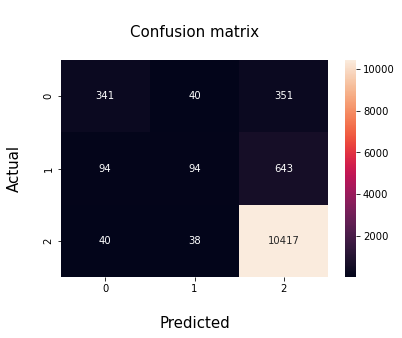

In [118]:
sns.heatmap(confusion_matrix(y_test,y_lr,),annot=True,fmt='d')
plt.xlabel('\nPredicted',fontsize=15)
plt.ylabel('Actual\n',fontsize=15)
plt.title('\nConfusion matrix\n',fontsize=15)

In [119]:
print('\nClassification report:')
print(classification_report(y_test,y_lr))


Classification report:
              precision    recall  f1-score   support

           0       0.72      0.47      0.57       732
           1       0.55      0.11      0.19       831
           2       0.91      0.99      0.95     10495

    accuracy                           0.90     12058
   macro avg       0.73      0.52      0.57     12058
weighted avg       0.88      0.90      0.88     12058



In [120]:
imbal['LogisticRegression'] = [accuracy_score(y_test,y_lr),precision_score(y_test,y_lr,average='weighted'),
                    recall_score(y_test,y_lr,average='weighted'), f1_score(y_test,y_lr,average='weighted')]

## Comparison

In [121]:
imbal.T.style.background_gradient(cmap='Reds')

#### OBSERVATION
inorder to decide the best comparitive model:
1. overall metrics 
2. individual f1 scores

LogisticRegression is the best comparitive model on imbalanced data

though the combined f1_score is good, the data being unbalanced the individual class f1_scores are not good 

### OBSERVATION
data is imbalanced, hence the data has to be made balanced for efficient machine learning

Technique to make it balanced:
* SMOTE - requires numeric data

## Data balancing

In [122]:
from imblearn.over_sampling import SMOTE

sample imbalance data

In [123]:
sample['sentiment'].value_counts()

Positive    52456
Neutral      4106
Negative     3724
Name: sentiment, dtype: int64

In [124]:
smote = SMOTE(random_state=777)
Xb,Yb = smote.fit_resample(X,Y)

print('x:',Xb.shape,'y:',Yb.shape)

x: (157368, 29419) y: (157368,)


### Data splitting

In [125]:
x_trainb,x_testb,y_trainb,y_testb = train_test_split(Xb,Yb,test_size=0.2,random_state=777)

print('x:',x_trainb.shape,x_testb.shape)
print('y:',y_trainb.shape,y_testb.shape)

x: (125894, 29419) (31474, 29419)
y: (125894,) (31474,)


sample balanced data

In [126]:
pd.DataFrame(y_trainb).value_counts()

2    42013
0    41971
1    41910
dtype: int64

In [127]:
bal = pd.DataFrame(index=['accuracy','precision','recall','f1_score'])

# Naive-Bayes
assumes each imput is independent and is based on Bayes theorem

### training

In [128]:
nbb = MultinomialNB()
nbb.fit(x_trainb,y_trainb)

print('MultinomialNB: Taining accuracy:',nbb.score(x_trainb,y_trainb))

MultinomialNB: Taining accuracy: 0.838665861756716


### testing

In [129]:
y_nbb = nbb.predict(x_testb)
print('MultinomialNB: Testing accuracy:',accuracy_score(y_testb,y_nbb))

MultinomialNB: Testing accuracy: 0.8263010739022686


### evaluation

Text(33.0, 0.5, 'actual\n')

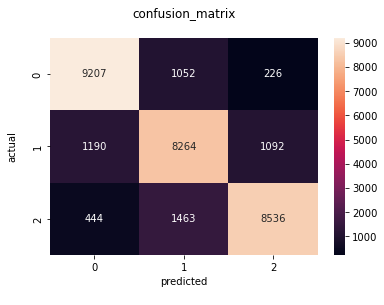

In [130]:
sns.heatmap(confusion_matrix(y_testb,y_nbb),annot=True,fmt='d')
plt.title('confusion_matrix\n')
plt.xlabel('predicted\n')
plt.ylabel('actual\n')

In [131]:
print('Classification report:\n',classification_report(y_testb,y_nbb))

Classification report:
               precision    recall  f1-score   support

           0       0.85      0.88      0.86     10485
           1       0.77      0.78      0.78     10546
           2       0.87      0.82      0.84     10443

    accuracy                           0.83     31474
   macro avg       0.83      0.83      0.83     31474
weighted avg       0.83      0.83      0.83     31474



In [132]:
bal['MultinomialNB'] = [accuracy_score(y_testb,y_nbb),precision_score(y_testb,y_nbb,average='weighted'),
                    recall_score(y_testb,y_nbb,average='weighted'), f1_score(y_testb,y_nbb,average='weighted')]

## DecisionTreeClassifier
produces a sequence of rules that can be used to classify the data

### finding the parameters for maximum score
parameters: max_dept, min_samples_leaf

In [133]:
max_depth = list(range(2,10,2))
cv=KFold(n_splits=5)

score = dict()

for depth in max_depth:
    iscore = cross_val_score(tree.DecisionTreeClassifier(max_depth=depth, random_state=777)
                             ,x_trainb,y_trainb,cv=cv,scoring="accuracy")
    score[depth] = iscore

depth = max(score,key=lambda i:score[i].mean())
print('Best depth =',depth)

Best depth = 8


### training

In [134]:
dtcb = DecisionTreeClassifier(max_depth=depth)
dtcb.fit(x_trainb,y_trainb)

print('DecisionTreeClassifier: Training accuracy:',dtcb.score(x_trainb,y_trainb))

DecisionTreeClassifier: Training accuracy: 0.6469331342240298


### testing

In [135]:
y_dtcb = dtcb.predict(x_testb)
print('DecisionTreeClassifier: Testing accuracy:',accuracy_score(y_testb,y_dtcb))

DecisionTreeClassifier: Testing accuracy: 0.6438330050200165


### evaluation

Text(0.5, 1.0, 'confusion_matrix')

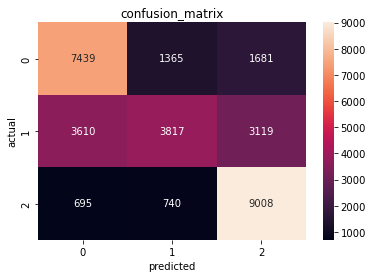

In [136]:
sns.heatmap(confusion_matrix(y_testb,y_dtcb),annot=True,fmt='d')
plt.xlabel('predicted')
plt.ylabel('actual')
plt.title('confusion_matrix')

In [137]:
print('Classification report:\n',classification_report(y_testb,y_dtcb))

Classification report:
               precision    recall  f1-score   support

           0       0.63      0.71      0.67     10485
           1       0.64      0.36      0.46     10546
           2       0.65      0.86      0.74     10443

    accuracy                           0.64     31474
   macro avg       0.64      0.64      0.63     31474
weighted avg       0.64      0.64      0.62     31474



In [138]:
bal['DecisionTreeClassifier'] = [accuracy_score(y_testb,y_dtcb),precision_score(y_testb,y_dtcb,average='weighted'),
                    recall_score(y_testb,y_dtcb,average='weighted'), f1_score(y_testb,y_dtcb,average='weighted')]

## RandomForestClassifier
bagging ensemble technique: that is a strong learner- combination of multiple homogeneous weak learners \
learning happens parallel and the final class is predicted based on hard voting

### training

In [139]:
params={'n_estimators':list(range(1,10,2))}

grid_search_rfcb = GridSearchCV(estimator=RandomForestClassifier(max_depth=depth,random_state=777),
                             param_grid=params,cv=5,n_jobs=-1)
grid_search_rfcb.fit(x_trainb,y_trainb)

print(grid_search_rfcb.best_estimator_)
print('RandomForestClassifier: Training accuracy:',grid_search_rfcb.best_estimator_.score(x_trainb,y_trainb))

RandomForestClassifier(max_depth=8, n_estimators=9, random_state=777)
RandomForestClassifier: Training accuracy: 0.5760322175798688


### testing

In [140]:
y_rfcb = grid_search_rfcb.predict(x_testb)
print('RandomForestClassifier: Testing accuracy:',accuracy_score(y_testb,y_rfcb))

RandomForestClassifier: Testing accuracy: 0.5745377136684248


### evaluation

In [141]:
sns.heatmap(confusion_matrix(y_testb,y_rfcb),annot=True,fmt='d')
plt.xlabel('\nPredicted',fontsize=15)
plt.ylabel('Actual\n',fontsize=15)
plt.title('\nConfusion matrix\n',fontsize=15)

Text(0.5, 1.0, '\nConfusion matrix\n')

In [142]:
print('\nClassification report:')
print(classification_report(y_testb,y_rfcb))


Classification report:
              precision    recall  f1-score   support

           0       0.66      0.56      0.60     10485
           1       0.58      0.40      0.47     10546
           2       0.52      0.76      0.62     10443

    accuracy                           0.57     31474
   macro avg       0.59      0.58      0.57     31474
weighted avg       0.59      0.57      0.57     31474



### model representation

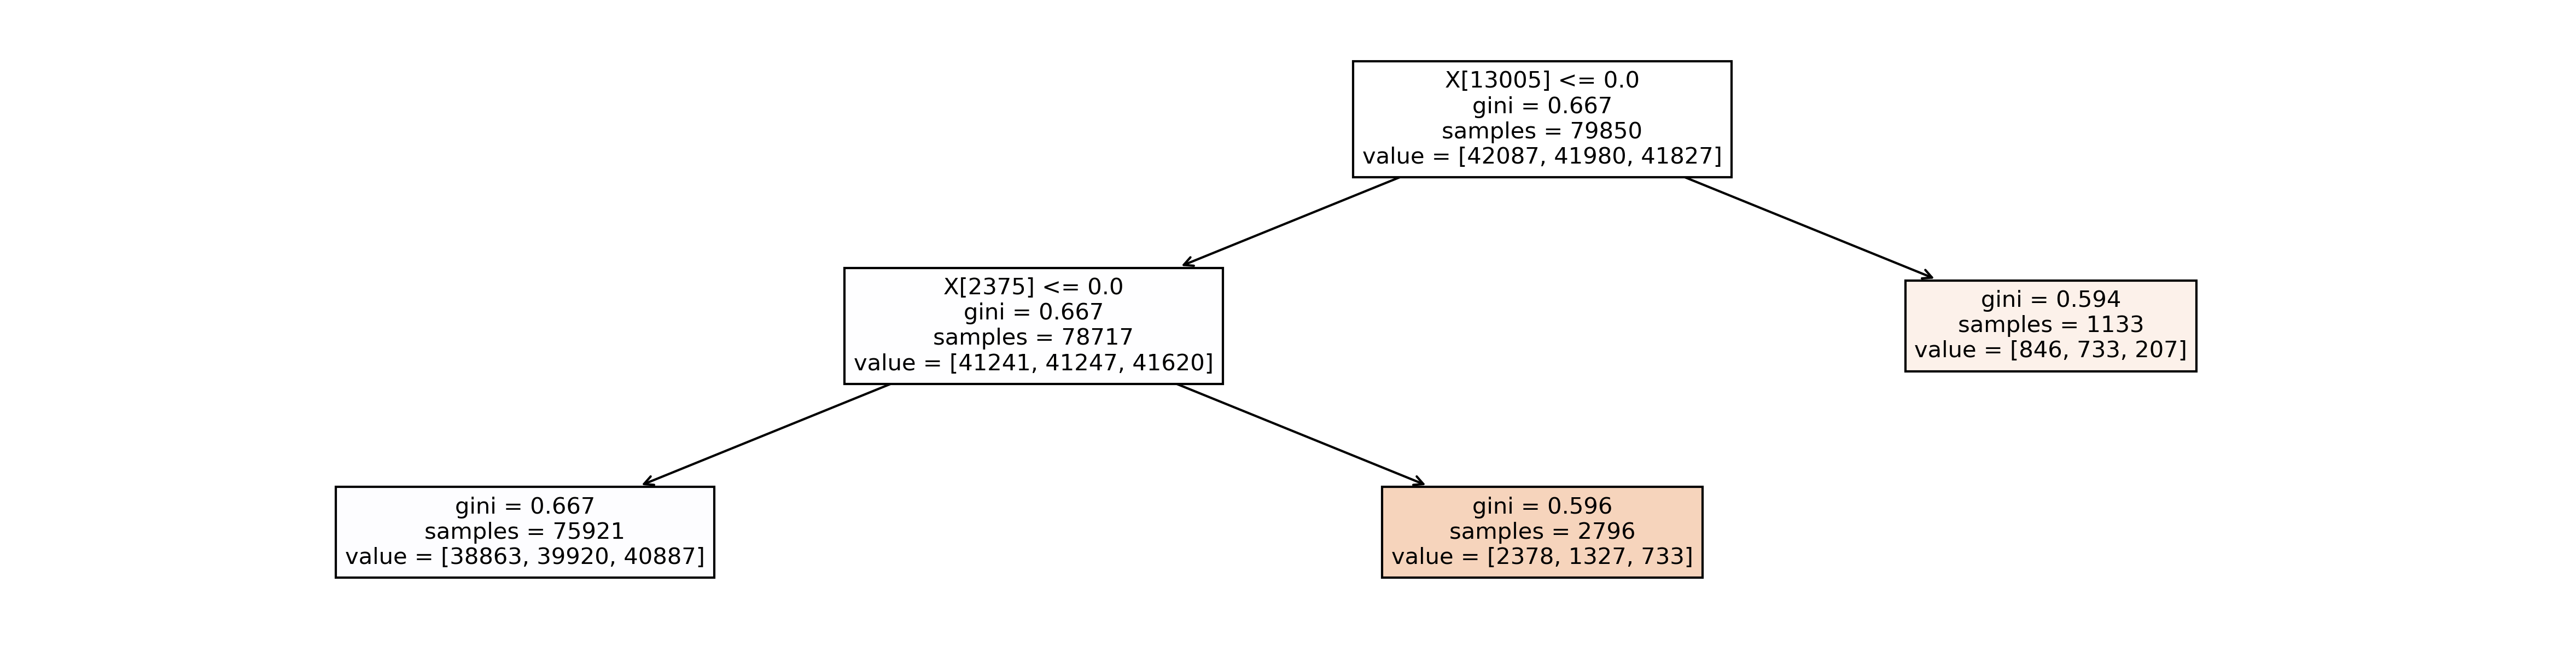

In [143]:
plt.figure(figsize=(20,5),dpi=300)
plot_tree(RandomForestClassifier(max_depth=2,min_samples_leaf=90,n_estimators=1,random_state=777).
          fit(x_trainb,y_trainb).estimators_[0],fontsize=10,filled=True);

In [144]:
bal['RandomForestClassifier'] = [accuracy_score(y_testb,y_rfcb),precision_score(y_testb,y_rfcb,average='weighted'),
                    recall_score(y_testb,y_rfcb,average='weighted'), f1_score(y_testb,y_rfcb,average='weighted')]

## AdaBoost
boosting ensemble technique: that is a combination of multiple weal learners \
learning happens sequentially 

### training

In [145]:
abb = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=depth, random_state=777),
                     random_state=777,n_estimators=1)
abb.fit(x_trainb,y_trainb)

print('AdaBoost: Taining accuracy:',abb.score(x_trainb,y_trainb))

AdaBoost: Taining accuracy: 0.646893418272515


### testing

In [146]:
y_abb = abb.predict(x_testb)
print('AdaBoost: Testing accuracy:',accuracy_score(y_testb,y_abb))

AdaBoost: Testing accuracy: 0.6440554108152761


### evaluation

In [147]:
sns.heatmap(confusion_matrix(y_testb,y_abb),annot=True,fmt='d')
plt.xlabel('\nPredicted',fontsize=15)
plt.ylabel('Actual\n',fontsize=15)
plt.title('\nConfusion matrix\n',fontsize=15)

Text(0.5, 1.0, '\nConfusion matrix\n')

In [148]:
print('\nClassification report:')
print(classification_report(y_testb,y_abb))


Classification report:
              precision    recall  f1-score   support

           0       0.63      0.71      0.67     10485
           1       0.64      0.36      0.46     10546
           2       0.65      0.86      0.74     10443

    accuracy                           0.64     31474
   macro avg       0.64      0.64      0.63     31474
weighted avg       0.64      0.64      0.63     31474



In [149]:
bal['AdaBoost'] = [accuracy_score(y_testb,y_abb),precision_score(y_testb,y_abb,average='weighted'),
                    recall_score(y_testb,y_abb,average='weighted'), f1_score(y_testb,y_abb,average='weighted')]

# Stacking
ensemble method in which the predictions, generated by using various machine learning algorithms, are used as inputs in a second-layer learning algorithm. This second-layer algorithm is trained to optimally combine the model predictions to form a new set of predictions

### training

In [150]:
level0=[('dtree', DecisionTreeClassifier()),('nb',MultinomialNB())] 
level1 = LogisticRegression()

scb = StackingClassifier(estimators=level0,final_estimator=level1,cv=3).fit(x_trainb,y_trainb)
print('StackingClassifier: Training accuracy:',scb.score(x_trainb,y_trainb))

StackingClassifier: Training accuracy: 0.9690851033409058


### testing

In [151]:
y_scb = scb.predict(x_testb)
print('StackingClassifier: Testing accuracy:',accuracy_score(y_testb,y_scb))

StackingClassifier: Testing accuracy: 0.9084323568659847


### evaluation

Text(0.5, 1.0, '\nConfusion matrix\n')

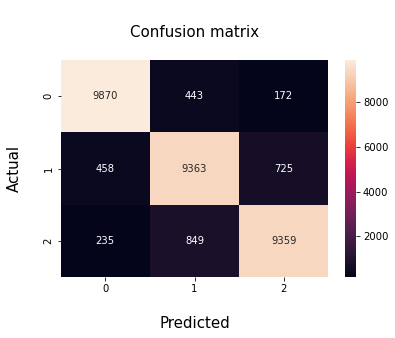

In [152]:
sns.heatmap(confusion_matrix(y_testb,y_scb),annot=True,fmt='d')
plt.xlabel('\nPredicted',fontsize=15)
plt.ylabel('Actual\n',fontsize=15)
plt.title('\nConfusion matrix\n',fontsize=15)

In [153]:
print('\nClassification report:')
print(classification_report(y_testb,y_scb))


Classification report:
              precision    recall  f1-score   support

           0       0.93      0.94      0.94     10485
           1       0.88      0.89      0.88     10546
           2       0.91      0.90      0.90     10443

    accuracy                           0.91     31474
   macro avg       0.91      0.91      0.91     31474
weighted avg       0.91      0.91      0.91     31474



In [154]:
bal['StackingClassifier'] = [accuracy_score(y_testb,y_scb),precision_score(y_testb,y_scb,average='weighted'),
                    recall_score(y_testb,y_scb,average='weighted'), f1_score(y_testb,y_scb,average='weighted')]

## Logistic Regression

### training

In [155]:
score = dict()
up = 200

for i in range(100,up,50):
    temp_lr = LogisticRegression(max_iter=i)
    temp_ovr = OneVsRestClassifier(temp_lr).fit(x_trainb,y_trainb) 
    
    temp_score = temp_ovr.score(x_testb,y_testb)
    score[i] = temp_score
    
best_i = max(score,key=lambda i:score[i])
print('Best i =',best_i)

Best i = 100


In [156]:
lrb = LogisticRegression(max_iter=best_i)
ovrb = OneVsRestClassifier(lrb)
ovrb.fit(x_trainb, y_trainb)

print('StackingClassifier: Training accuracy:',ovrb.score(x_trainb,y_trainb))

StackingClassifier: Training accuracy: 0.8734252625224395


### testing

In [157]:
y_lrb = ovrb.predict(x_testb)
print('LogisticRegression: Testing accuracy:',accuracy_score(y_testb,y_lrb))

LogisticRegression: Testing accuracy: 0.8606151108851751


### evaluation

Text(0.5, 1.0, '\nConfusion matrix\n')

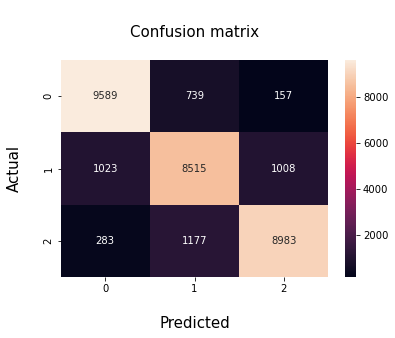

In [158]:
sns.heatmap(confusion_matrix(y_testb,y_lrb),annot=True,fmt='d')
plt.xlabel('\nPredicted',fontsize=15)
plt.ylabel('Actual\n',fontsize=15)
plt.title('\nConfusion matrix\n',fontsize=15)

In [159]:
print('\nClassification report:')
print(classification_report(y_testb,y_lrb))


Classification report:
              precision    recall  f1-score   support

           0       0.88      0.91      0.90     10485
           1       0.82      0.81      0.81     10546
           2       0.89      0.86      0.87     10443

    accuracy                           0.86     31474
   macro avg       0.86      0.86      0.86     31474
weighted avg       0.86      0.86      0.86     31474



In [160]:
bal['LogisticRegression'] = [accuracy_score(y_testb,y_lrb),precision_score(y_testb,y_lrb,average='weighted'),
                    recall_score(y_testb,y_lrb,average='weighted'), f1_score(y_testb,y_lrb,average='weighted')]

## Comparison

on unbalanced data

In [161]:
imbal.T.style.background_gradient(cmap='Reds')

on balanced data

In [162]:
bal.T.style.background_gradient(cmap='Blues')

### OBSERVATION
inorder to decide the best comparitive model:
1. overall metrics 
2. individual f1 scores

after balancing all the evaluations metrics have decreased for all the models except StackingClassifier \
though the evaluation metrics has decreased 

on comparing the confusion matrices and the evaluation metrics- **StackingClassifier** trained on balanced data is comparitively the best model

---

In [163]:
# for reusability
df = data.copy()

In [164]:
xp = df['reviewText']
Xp = tfidf.transform(xp)

In [165]:
df['predicted'] = scb.predict(Xp)

In [166]:
df['predicted'].replace({2:'Positive',1:'Neutral',0:'Negative'},inplace=True)
df.head()

overall  verified reviewTime        asin  \
0      3.0      True 2014-02-23  0545346193   
1      4.0      True 2012-11-14  0545346193   
2      5.0      True 2015-02-11  0545346193   
3      5.0      True 2015-01-04  0545346193   
4      4.0      True 2016-02-14  0545346193   

                                          reviewText  \
0  packaging draw dc universe look easy think twi...   
1  year old took drawing time high school wa not ...   
2                        little artist love kit star   
3                           love delivered time star   
4  useful want train muscle memory tracing improv...   

                                             summary  \
0  Great Idea But Needs More Instructions & Detai...   
1                                 Good for beginners   
2                                         Five Stars   
3                                         Five Stars   
4                             Great Drawing Practice   

                                          category  brand  price sentiment  \
0  ['Toys & Games', 'Arts & Crafts', 'Craft Kits']  Klutz  12.92   Neutral   
1  ['Toys & Games', 'Arts & Crafts', 'Craft Kits']  Klutz  12.92  Positive   
2  ['Toys & Games', 'Arts & Crafts', 'Craft Kits']  Klutz  12.92  Positive   
3  ['Toys & Games', 'Arts & Crafts', 'Craft Kits']  Klutz  12.92  Positive   
4  ['Toys & Games', 'Arts & Crafts', 'Craft Kits']  Klutz  12.92  Positive   

  predicted  
0  Positive  
1   Neutral  
2  Positive  
3  Positive  
4  Positive

### Products with positive sentiment

In [167]:
Positive = df[df['predicted']=='Positive']
Positive.head()

overall  verified reviewTime        asin  \
0      3.0      True 2014-02-23  0545346193   
2      5.0      True 2015-02-11  0545346193   
3      5.0      True 2015-01-04  0545346193   
4      4.0      True 2016-02-14  0545346193   
5      5.0      True 2015-10-16  0545346193   

                                          reviewText  \
0  packaging draw dc universe look easy think twi...   
2                        little artist love kit star   
3                           love delivered time star   
4  useful want train muscle memory tracing improv...   
5                       daughter loved dc comic star   

                                             summary  \
0  Great Idea But Needs More Instructions & Detai...   
2                                         Five Stars   
3                                         Five Stars   
4                             Great Drawing Practice   
5                                         Five Stars   

                                          category  brand  price sentiment  \
0  ['Toys & Games', 'Arts & Crafts', 'Craft Kits']  Klutz  12.92   Neutral   
2  ['Toys & Games', 'Arts & Crafts', 'Craft Kits']  Klutz  12.92  Positive   
3  ['Toys & Games', 'Arts & Crafts', 'Craft Kits']  Klutz  12.92  Positive   
4  ['Toys & Games', 'Arts & Crafts', 'Craft Kits']  Klutz  12.92  Positive   
5  ['Toys & Games', 'Arts & Crafts', 'Craft Kits']  Klutz  12.92  Positive   

  predicted  
0  Positive  
2  Positive  
3  Positive  
4  Positive  
5  Positive

Wordcloud is a visualization technique to represent the frequency of words in a text where the size of the word represents its frequency

In [168]:
from wordcloud import WordCloud,STOPWORDS

In [169]:
print('Most frequent words of review that classifies the product as Positive:')
wordcloud = WordCloud( width = 3000, height = 1000, background_color = 'black', 
                      stopwords = STOPWORDS).generate(str(Positive['reviewText']))

fig = plt.figure( figsize = (40, 20), facecolor = 'k', edgecolor = 'k')
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

Most frequent words of review that classifies the product as Positive:


In [170]:
print('Of AMAZON number of products with positive sentiment')
len(Positive['asin'])/len(df)*100

Of AMAZON number of products with positive sentiment


81.7007498380645

In [171]:
print('Of AMAZON number of categories with positive sentiment')
len(Positive['category'])/len(df)*100

Of AMAZON number of categories with positive sentiment


81.7007498380645

In [172]:
print('Of AMAZON number of brands with positive sentiment')
len(Positive['brand'])/len(df)*100

Of AMAZON number of brands with positive sentiment


81.7007498380645

In [173]:
pos_cat = dict()
for i in Positive['category'].unique():
    pos_cat[i] = Positive.groupby('category').get_group(i)['overall'].mean()

In [174]:
print('Top 5 categories with positive products:')
sorted(pos_cat,key=lambda i:pos_cat[i],reverse=True)[:5]

Top 5 categories with positive products:


['[\'Toys & Games\', \'Party Supplies\', \'Party Hats\', \'38.1 centimeters high\', \'20.32 centimeters wide\', \'Fabric lining, secret pocket with fortune\', \'Velcro size adjuster\', \'Kids\\\' size, ages 3-12, fits 5556 cm heads 21.75"\', \'Velvet, satin\']',
 "['Toys & Games', 'Hobbies', 'Remote & App Controlled Vehicles & Parts', 'Remote & App Controlled Vehicle Parts', 'Power Plant & Driveline Systems', 'Brakes']",
 '[\'Toys & Games\', \'Dress Up & Pretend Play\', \'Accessories\', \'Polyester\', \'Imported\', \'1" high\', \'6" wide\', \'Costume sound effect creating accessory\', \'Star Wars is officially licensed by Lucasfilms\', \'Produces the distinctive heavy breathing sound from the original movie\']',
 '[\'Toys & Games\', \'Dress Up & Pretend Play\', \'Hats\', \'Includes cap with elastic back, propeller.\', \'This Tweedledee Twill is an officially licensed Alice In Wonderland costume accessory.\', "Please note: This item\'s color may vary due to inherent manufacturing variat

In [175]:
print('Bottom 5 categories with positive products:')
sorted(pos_cat,key=lambda i:pos_cat[i],reverse=False)[:5]

Bottom 5 categories with positive products:


['[\'Toys & Games\', \'Dress Up & Pretend Play\', \'Costumes\', \'100% Synthetic Fiber\', \'Imported\', \'3-Piece face and body hair kit\', \'Includes moustache, chest hair and sideburns\', "Black 70\'s Afro wig available separately from Forum", "Part of the 70\'s Disco Fever collection", "Look to Forum Novelties for all your Halloween, Luau, Easter, Mardi Gras and St. Patrick\'s Day supplies", \'Designed for ages 14 + adult\']',
 '[\'Toys & Games\', \'Novelty & Gag Toys\', \'Gag Toys & Practical Jokes\', \'Plastic\', \'1.5" high\', \'7" wide\', \'Change your voice to match your costume with this Voice Disguiser with Microphone\', \'Features four different voices: Space Alien, Witch, Voice from Beyond, Scary Monster\', \'Fun for Halloween or any other day\', \'Includes special effects sound box and microphone\']',
 '[\'Toys & Games\', \'Dress Up & Pretend Play\', \'Accessories\', \'Plastic\', \'Imported\', \'3.04 centimeters high\', \'3.04 centimeters wide\', "Rubie\'s Costume Harry Po

In [176]:
pos_brand = dict()
for i in Positive['brand'].unique():
    pos_brand[i] = Positive.groupby('brand').get_group(i)['overall'].mean()

In [177]:
print('Top 5 brands with positive products:')
sorted(pos_brand,key=lambda i:pos_brand[i],reverse=True)[:5]

Top 5 brands with positive products:


['Galison',
 'Ditty Bird',
 'Beanie Baby',
 'Beanie Babies - Sea Life',
 'eaglecollector83']

In [178]:
print('Bottom 5 brands with positive products:')
sorted(pos_brand,key=lambda i:pos_brand[i],reverse=False)[:5]

Bottom 5 brands with positive products:


['Insect House', 'Girl Gourmet', 'Artesania Latina', 'Assortmart', 'Winlow']

---

### Products with negative sentiment

In [179]:
Negative = df[df['predicted']=='Negative']
Negative.head()

overall  verified reviewTime        asin  \
6        4.0      True 2017-08-18  0545561647   
17       1.0      True 2017-01-17  0545561647   
46       5.0      True 2015-06-19  0545561647   
95       2.0      True 2015-03-13  0615638996   
107      3.0      True 2017-01-19  0641869665   

                                            reviewText  \
6    need hobby bought kit instruction easy follow ...   
17   booo unles patient know measure not patience n...   
46   gift packaging product good packaging product ...   
95   uno type game anger control stuff not like you...   
107  son love book wa disappointed cheaply wing wa ...   

                                               summary  \
6                      Need more yarn & a hot glue gun   
17   BORING UNLESS YOU ARE A CRAFT PERSON WHICH I A...   
46                      packaging and product is good!   
95                                   Bit dissapointed.   
107  Poorly Made and will require needle/thread rep...   

                                              category            brand  \
6      ['Toys & Games', 'Arts & Crafts', 'Craft Kits']            Klutz   
17     ['Toys & Games', 'Arts & Crafts', 'Craft Kits']            Klutz   
46     ['Toys & Games', 'Arts & Crafts', 'Craft Kits']            Klutz   
95             ['Toys & Games', 'Games', 'Card Games']  Therapy Game HQ   
107  ['Toys & Games', 'Stuffed Animals & Plush Toys...           Yottoy   

     price sentiment predicted  
6    17.45  Positive  Negative  
17   17.45  Negative  Negative  
46   17.45  Positive  Negative  
95   19.95  Negative  Negative  
107  22.51   Neutral  Negative

In [180]:
print('Most frequent words of review that classifies the product as Negative:')
wordcloud = WordCloud( width = 3000, height = 1000, background_color = 'black', 
                      stopwords = STOPWORDS).generate(str(Negative['reviewText']))

fig = plt.figure( figsize = (40, 20), facecolor = 'k', edgecolor = 'k')
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

Most frequent words of review that classifies the product as Negative:


In [181]:
print('Of AMAZON number of products with negative sentiment')
len(Negative['asin'])/len(df)*100

Of AMAZON number of products with negative sentiment


7.281996670888185

In [182]:
print('Of AMAZON number of categories with negative sentiment')
len(Negative['category'])/len(df)*100

Of AMAZON number of categories with negative sentiment


7.281996670888185

In [183]:
print('Of AMAZON number of brands with negative sentiment')
len(Negative['brand'])/len(df)*100

Of AMAZON number of brands with negative sentiment


7.281996670888185

In [184]:
neg_cat = dict()
for i in Negative['category'].unique():
    neg_cat[i] = Negative.groupby('category').get_group(i)['overall'].mean()

In [185]:
print('Top 5 categories with negative products:')
sorted(neg_cat,key=lambda i:neg_cat[i],reverse=True)[:5]

Top 5 categories with negative products:


['[\'Toys & Games\', \'Dress Up & Pretend Play\', \'Wigs\', \'Synthetic Acrylic Hair\', \'Made in USA or Imported\', \'1.5" high\', \'7.5" wide\', \'Give every little girl Dorothy hair\', \'Brown with braids\', \'One size fits most children\']',
 "['Toys & Games', 'Dress Up & Pretend Play', 'Costumes', '100% Woven poly poplin, washable', 'Does not include Hat And Sword']",
 "['Toys & Games', 'Party Supplies', 'plastic', 'Plastic. Phoney Dynamite party accessory']",
 '[\'Toys & Games\', \'Dolls & Accessories\', \'Doll Accessories\', \'Plastic.\', \'Imported\', \'1.5" high\', \'9.75" wide\', \'Plastic construction\', \'The weapon of choice to fight the Dark Side\', \'Black and silver with orange tip for safe play\']',
 "['Toys & Games', 'Baby & Toddler Toys', 'Mirrors']"]

In [186]:
print('Bottom 5 categories with negative products:')
sorted(neg_cat,key=lambda i:neg_cat[i],reverse=False)[:5]

Bottom 5 categories with negative products:


["['Toys & Games', 'Hobbies', 'Remote & App Controlled Vehicles & Parts', 'Fuel']",
 "['Toys & Games', 'Dress Up & Pretend Play', 'Costumes', '100% acrylic', 'Tiger Costume for Children.', 'Four sizes. 4-6, 6-8, 8-10 and 10-12 Years.', 'Costume includes jumpsuit with tail , mittens and hood.', 'Machine washable. 100% Acrylic.', 'Conforms to European & North American safety regulations. As a precaution keep away from fire. For more information view the product details below.']",
 "['Toys & Games', 'Party Supplies', 'Looks like a gold chain']",
 "['Toys & Games', 'Hobbies', 'Trains & Accessories', 'Accessories', 'Vehicles, Boats & Airplanes']",
 '[\'Toys & Games\', \'Novelty & Gag Toys\', \'Gag Toys & Practical Jokes\', \'Plastic\', \'0.75" high\', \'5.2" wide\', \'Prop lollipop in light-weight plastic\', \'9-inches tall x 5-inches wide\', \'Brightly colored\', \'Great for munchkins of all ages\', \'Look to Forum Novelties for gag gifts and other fun party props\']']

In [187]:
neg_brand = dict()
for i in Negative['brand'].unique():
    neg_brand[i] = Negative.groupby('brand').get_group(i)['overall'].mean()

In [188]:
print('Top 5 brands with negative products:')
sorted(neg_brand,key=lambda i:neg_brand[i],reverse=True)[:5]

Top 5 brands with negative products:


['Ditty Bird', 'Paizo Inc.', 'Pockets Of Learning', 'Zomma', 'Playstar']

In [189]:
print('Bottom 5 brands with negative products:')
sorted(neg_brand,key=lambda i:neg_brand[i],reverse=False)[:5]

Bottom 5 brands with negative products:


['STORY EGG',
 'Jakks',
 'Vintage Sports Cards',
 'Professor Noggin',
 'Bob Smith Ind Glue']

---

### Products with neutral sentiment

In [190]:
Neutral = df[df['predicted']=='Neutral']
Neutral.head()

overall  verified reviewTime        asin  \
1       4.0      True 2012-11-14  0545346193   
11      3.0      True 2017-03-01  0545561647   
16      2.0     False 2017-01-21  0545561647   
20      3.0      True 2016-09-15  0545561647   
24      4.0      True 2016-07-18  0545561647   

                                           reviewText  \
1   year old took drawing time high school wa not ...   
11  okay rate not easy apply ear eye stay definite...   
16  cute idea basic step sense easy follow parent ...   
20  hard year old supervision wa frustrating know ...   
24  wa present year old daughter far puppy yes klu...   

                                              summary  \
1                                  Good for beginners   
11  it isn't easy to apply the ears and eyes and h...   
16  and the basic steps make sense are are easy to...   
20                        Cute but a little difficult   
24                    Fun craft to to with older kids   

                                           category  brand  price sentiment  \
1   ['Toys & Games', 'Arts & Crafts', 'Craft Kits']  Klutz  12.92  Positive   
11  ['Toys & Games', 'Arts & Crafts', 'Craft Kits']  Klutz  17.45   Neutral   
16  ['Toys & Games', 'Arts & Crafts', 'Craft Kits']  Klutz  17.45  Negative   
20  ['Toys & Games', 'Arts & Crafts', 'Craft Kits']  Klutz  17.45   Neutral   
24  ['Toys & Games', 'Arts & Crafts', 'Craft Kits']  Klutz  17.45  Positive   

   predicted  
1    Neutral  
11   Neutral  
16   Neutral  
20   Neutral  
24   Neutral

Most frequent words of review that classifies the product as Neutral:


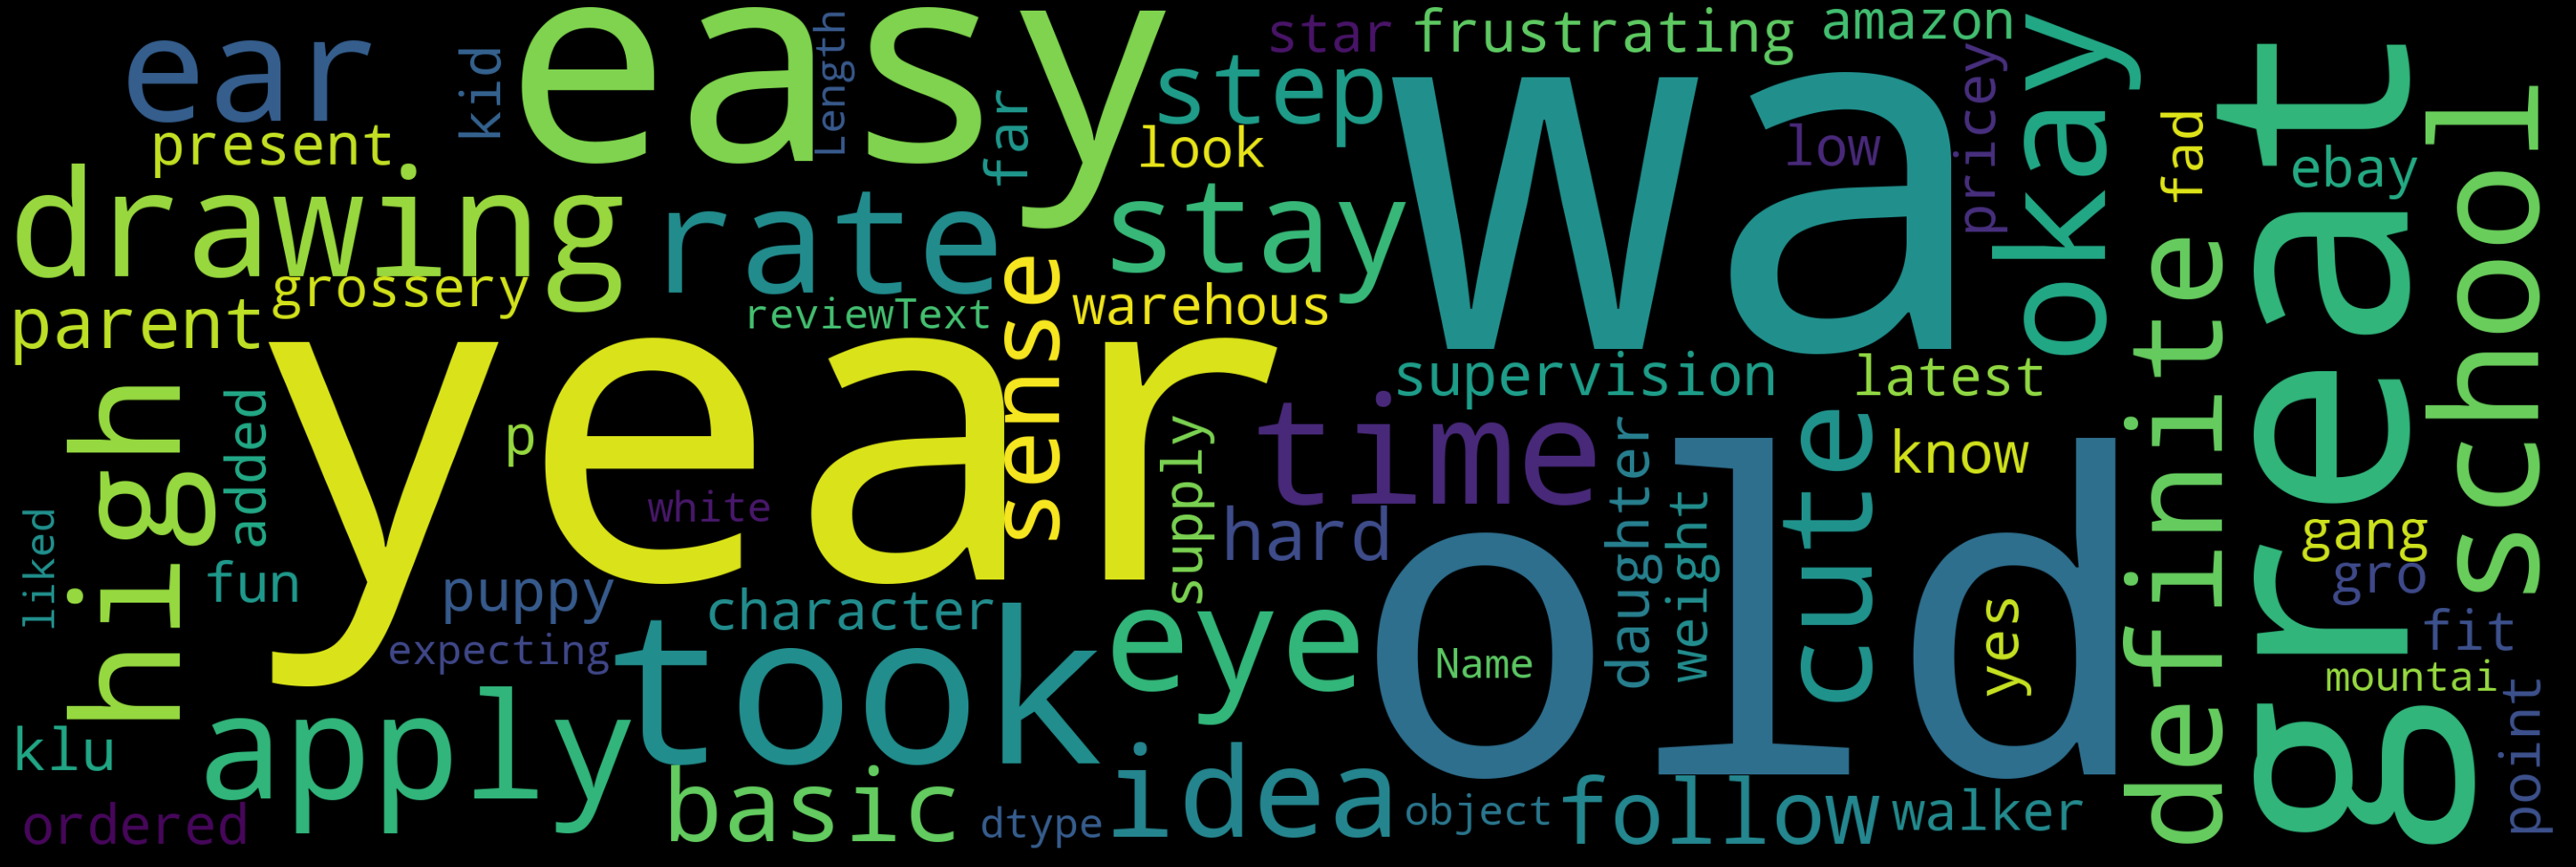

In [191]:
print('Most frequent words of review that classifies the product as Neutral:')
wordcloud = WordCloud( width = 3000, height = 1000, background_color = 'black', 
                      stopwords = STOPWORDS).generate(str(Neutral['reviewText']))

fig = plt.figure( figsize = (40, 20), facecolor = 'k', edgecolor = 'k')
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [192]:
print('Of AMAZON number of products with neutral sentiment')
len(Neutral['asin'])/len(df)*100

Of AMAZON number of products with neutral sentiment


11.01725349104731

In [193]:
print('Of AMAZON number of categories with neutral sentiment')
len(Neutral['category'])/len(df)*100

Of AMAZON number of categories with neutral sentiment


11.01725349104731

In [194]:
print('Of AMAZON number of brands with neutral sentiment')
len(Neutral['brand'])/len(df)*100

Of AMAZON number of brands with neutral sentiment


11.01725349104731

In [195]:
neu_cat = dict()
for i in Neutral['category'].unique():
    neu_cat[i] = Neutral.groupby('category').get_group(i)['overall'].mean()

In [196]:
print('Top 5 categories with neutral products:')
sorted(neu_cat,key=lambda i:neu_cat[i],reverse=True)[:5]

Top 5 categories with neutral products:


["['Toys & Games', 'Hobbies', 'Hobby Building Tools & Hardware', 'RC Linkages']",
 '[\'Toys & Games\', \'Dress Up & Pretend Play\', \'Hats\', \'Includes cap with elastic back, propeller.\', \'This Tweedledee Twill is an officially licensed Alice In Wonderland costume accessory.\', "Please note: This item\'s color may vary due to inherent manufacturing variations or your computer monitor\'s color settings. The item you receive will be identical or substantially similar to the item pictured in this listing.", \'elope, Inc.\', \'Spot clean air dry only\', \'Costumes\']',
 "['Toys & Games', 'Dress Up & Pretend Play', 'Costumes', '100% acrylic', 'Tiger Costume for Children.', 'Four sizes. 4-6, 6-8, 8-10 and 10-12 Years.', 'Costume includes jumpsuit with tail , mittens and hood.', 'Machine washable. 100% Acrylic.', 'Conforms to European & North American safety regulations. As a precaution keep away from fire. For more information view the product details below.']",
 "['Toys & Games', 'Novelt

In [197]:
print('Bottom 5 categories with neutral products:')
sorted(neu_cat,key=lambda i:neu_cat[i],reverse=False)[:5]

Bottom 5 categories with neutral products:


['[\'Toys & Games\', \'Dress Up & Pretend Play\', \'Accessories\', \'Fun costumes for kids and adults\', "Whether it\'s for Halloween, a themed party, or even for giggles", \'Beautiful colors, hand-wash needed, excellent for dress up\']',
 '[\'Toys & Games\', \'Dress Up & Pretend Play\', \'Beauty & Fashion\', \'Includes 4 sets of clip-on earrings jewelry; Shown as picture\', \'Perfect accessories for dressing up your girl for birthday parties and other fanciful occasions\', "It\'s a good gift to your princess."]',
 '[\'Toys & Games\', \'Dress Up & Pretend Play\', \'Costumes\', \'100% Synthetic Fiber\', \'Imported\', \'3-Piece face and body hair kit\', \'Includes moustache, chest hair and sideburns\', "Black 70\'s Afro wig available separately from Forum", "Part of the 70\'s Disco Fever collection", "Look to Forum Novelties for all your Halloween, Luau, Easter, Mardi Gras and St. Patrick\'s Day supplies", \'Designed for ages 14 + adult\']',
 "['Toys & Games', 'Hobbies', 'Trains & Access

In [198]:
neu_brand = dict()
for i in Neutral['brand'].unique():
    neu_brand[i] = Neutral.groupby('brand').get_group(i)['overall'].mean()

In [199]:
print('Top 5 brands with neutral products:')
sorted(neu_brand,key=lambda i:neu_brand[i],reverse=True)[:5]

Top 5 brands with neutral products:


['Galison',
 'US Games',
 'Beyond123',
 'Daron Worldwide Trading inc',
 'Smethport']

In [200]:
print('Bottom 5 brands with neutral products:')
sorted(neu_brand,key=lambda i:neu_brand[i],reverse=False)[:5]

Bottom 5 brands with neutral products:


['G.I. Joe',
 'PL',
 'Roy Toy',
 'Ty Chance / Holsteiner (Brown)',
 'Selchow & Righter']

---

# Inventory optimization: Clustering
Clustering is grouping of like objects together
Clustering of categories on the basis of rating and Total Sales

### Clustering with respect to category

In [201]:
cat_count = df['category'].value_counts().to_frame()
cat_rating = df.groupby('category')['overall'].mean().to_frame()
cat_price = df.groupby('category')['price'].mean().to_frame()
cat_sales = df.groupby('category')['price'].sum().to_frame().rename(columns={'price':'sales'})

df_cat = cat_count.join(cat_rating).join(cat_price).join(cat_sales)
df_cat.head()

category   overall  \
['Toys & Games', 'Action Figures & Statues', 'A...     87998  4.558592   
['Toys & Games', 'Building Toys', 'Building Sets']     72554  4.683794   
['Toys & Games', 'Dolls & Accessories', 'Dolls']       63726  4.612136   
['Toys & Games', 'Games', 'Board Games']               58258  4.496430   
['Toys & Games', 'Stuffed Animals & Plush Toys'...     41665  4.711076   

                                                        price       sales  
['Toys & Games', 'Action Figures & Statues', 'A...  39.438923  3470546.36  
['Toys & Games', 'Building Toys', 'Building Sets']  64.467419  4677369.12  
['Toys & Games', 'Dolls & Accessories', 'Dolls']    43.029306  2742085.58  
['Toys & Games', 'Games', 'Board Games']            28.385488  1653681.75  
['Toys & Games', 'Stuffed Animals & Plush Toys'...  20.734315   863895.23

In [202]:
df_cat = df_cat.reset_index().rename(columns={'index':'category','category':'Freq'})
df_cat.head(3)

category   Freq   overall  \
0  ['Toys & Games', 'Action Figures & Statues', '...  87998  4.558592   
1  ['Toys & Games', 'Building Toys', 'Building Se...  72554  4.683794   
2   ['Toys & Games', 'Dolls & Accessories', 'Dolls']  63726  4.612136   

       price       sales  
0  39.438923  3470546.36  
1  64.467419  4677369.12  
2  43.029306  2742085.58

### Feature engineering
transforming data to machine understandable and processable form

In [203]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 642 entries, 0 to 641
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   category  642 non-null    object 
 1   Freq      642 non-null    int64  
 2   overall   642 non-null    float64
 3   price     642 non-null    float64
 4   sales     642 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 25.2+ KB


### Feature scaling
the numeric distribution is normalized/standardized to boost the model performance

In [204]:
from sklearn.preprocessing import StandardScaler

In [205]:
scaler = StandardScaler()

df_cat_num = df_cat.select_dtypes('number')
df_cat_num=df_cat_num.drop(['Freq','price'],axis=1)
df_cat_num_scaled = scaler.fit_transform(df_cat_num)

### Feature selection
method of reducing the input variable to the model by using only relevant data and getting rid of noise in data

In [206]:
df_cat.corr().style.background_gradient(cmap='Purples')

## Modelling
Models: KMeans (distance), Heirarchial Agglomerative Clustering (heirarchy), DBSCAN (density)

In [207]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_samples, silhouette_score

import scipy.cluster.hierarchy as sch
from sklearn.neighbors import NearestNeighbors

### KMeans

In [208]:
sil_score=dict()
for i in range(2,11):
    temp=KMeans(n_clusters=i).fit(df_cat_num_scaled)
    labels=temp.labels_
    sil_score[i]=silhouette_score(df_cat_num_scaled,labels)
    
# best k unsing elbow method
wcss=dict()
for i in range(2,11):
    temp=KMeans(n_clusters=i).fit(df_cat_num_scaled)
    wcss[i]=temp.inertia_

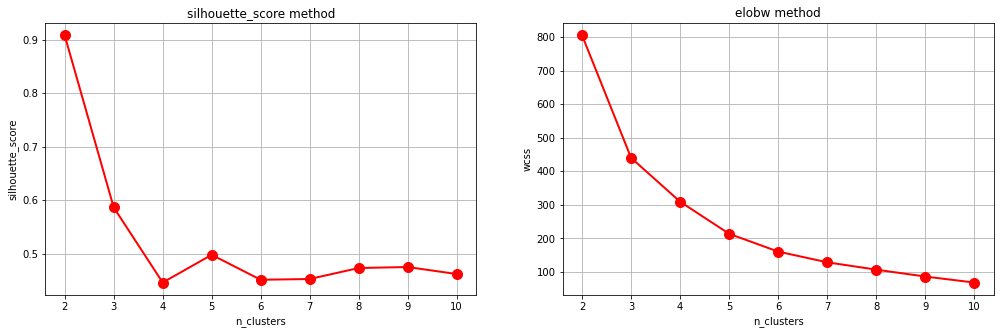

In [209]:
fig,ax=plt.subplots(1,2,figsize=(17,5))

# plotting silhouette_score vs k
ax[0].plot(list(sil_score.keys()),list(sil_score.values()),marker='o',linewidth=2,markersize=10,color='r')
ax[0].set_xlabel('n_clusters')
ax[0].set_ylabel('silhouette_score')
ax[0].set_title('silhouette_score method')  
ax[0].grid()

# plotting wcss vs k
ax[1].plot(list(wcss.keys()), list(wcss.values()),marker='o',color='r',linewidth=2, markersize=10)  
ax[1].set_xlabel('n_clusters')  
ax[1].set_ylabel('wcss')
ax[1].set_title('elobw method')  
ax[1].grid()

From both silhouette score and elbow method:

best kmeans model k = 3

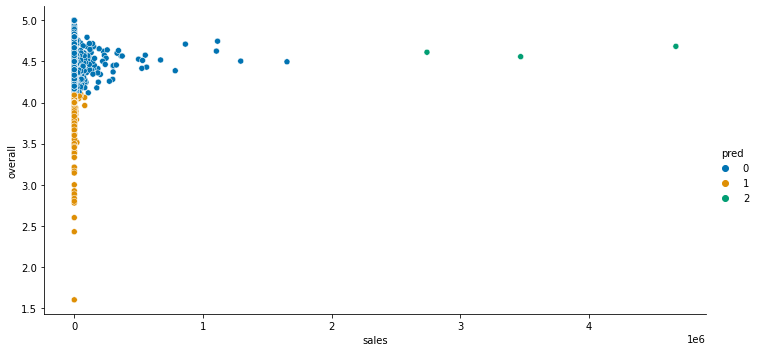

In [210]:
kmeans = KMeans(n_clusters=3, random_state=777)
y_kmeans = kmeans.fit_predict(df_cat_num_scaled)

df_cat['pred']=y_kmeans
df_pred = pd.DataFrame({'y_kmeans':y_kmeans})

sns.relplot(data=df_cat,x='sales',y='overall',hue='pred',palette='colorblind',aspect=2)

### Agglomerative Clustering

Text(0.5, 1.0, 'Dendrogram')

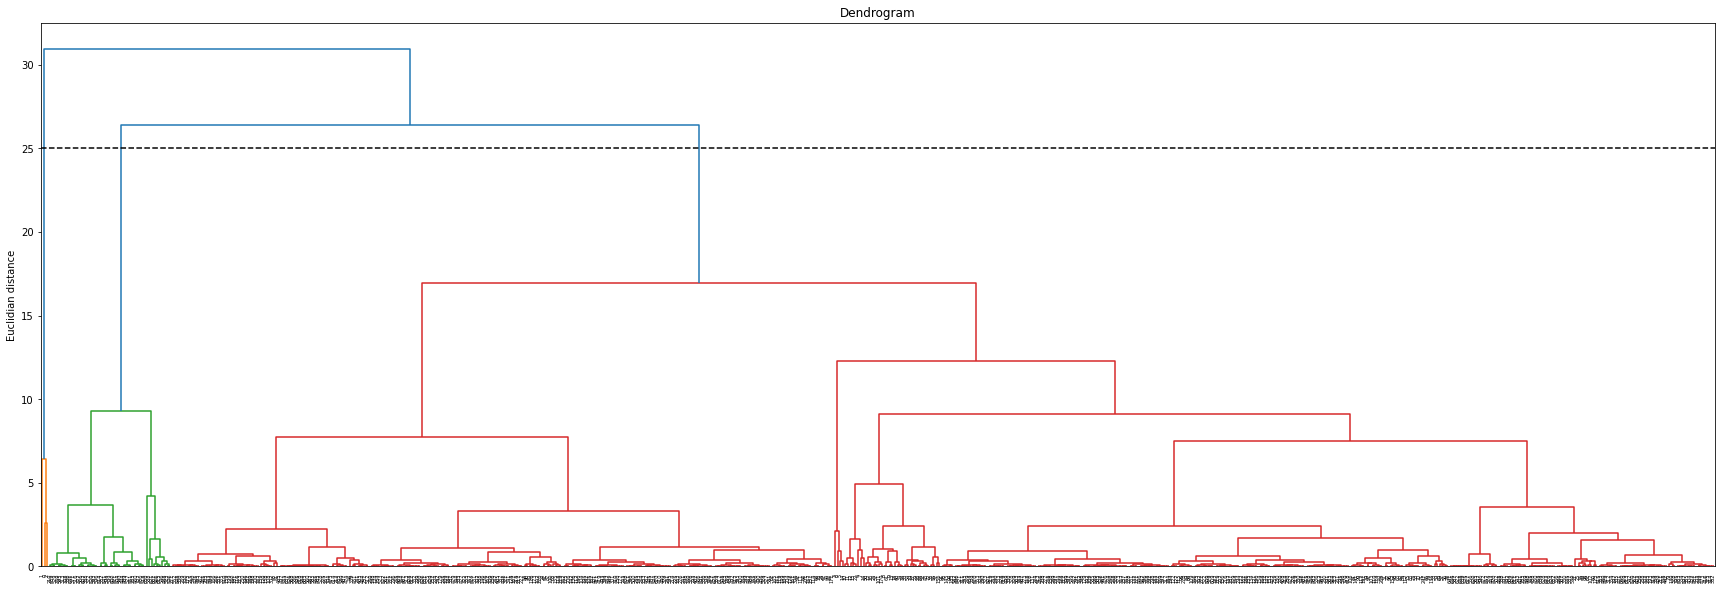

In [211]:
plt.figure(figsize=(30,10))
dendrogram = sch.dendrogram(sch.linkage(df_cat_num_scaled,method='ward'))

ax = plt.gca()
ax.tick_params(axis='x',which='major')

plt.axhline(y=25,linestyle='--',color='k')

plt.ylabel('Euclidian distance')
plt.title('Dendrogram')

#### INFERENCE
from dendogram k = 3

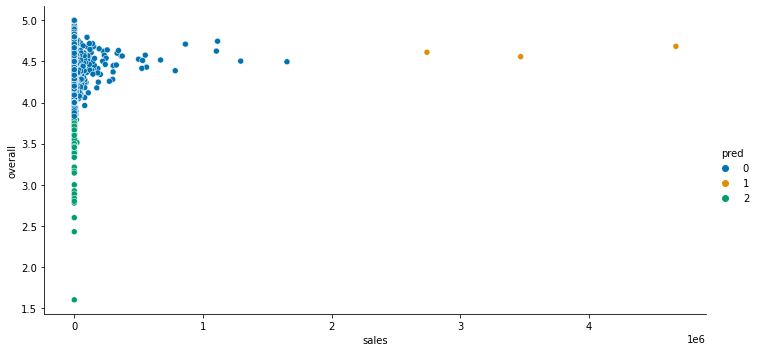

In [212]:
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(df_cat_num_scaled)

df_cat['pred'] = y_hc
df_pred['y_hc'] = y_hc

sns.relplot(data=df_cat,x='sales',y='overall',hue='pred',palette='colorblind',aspect=2)

### DBSCAN

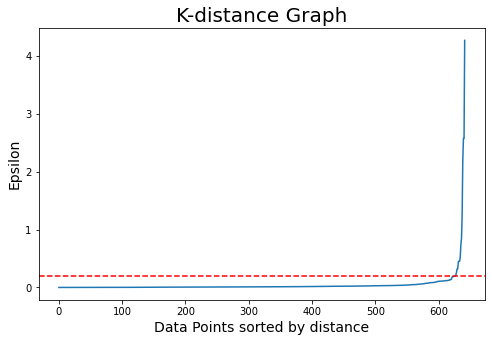

In [213]:
knn = NearestNeighbors(n_neighbors=2)
neighbors = knn.fit(df_cat_num_scaled)
distances, indices = neighbors.kneighbors(df_cat_num_scaled)

# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(8,5))
plt.plot(distances)

plt.axhline(y=0.2, color='r', linestyle='--')
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

#### INFERENCE
breaking point at epsilon = 0.2

In [214]:
eps = 0.2

for min_samples in range(2,50):
    
    clusterer = DBSCAN(eps=eps, min_samples=min_samples)
    cluster_labels = clusterer.fit_predict(df_cat_num_scaled)

    X = cluster_labels + 2
    y = np.bincount(X)
    i = np.nonzero(y)[0]
    results = list(zip(i,y[i]) )
    
    print('eps =',eps,'min_samples =', min_samples)
    print('obtained clusters:', results)
    print('---'*30)

eps = 0.2 min_samples = 2
obtained clusters: [(1, 15), (2, 4), (3, 2), (4, 3), (5, 599), (6, 4), (7, 2), (8, 2), (9, 7), (10, 4)]
------------------------------------------------------------------------------------------
eps = 0.2 min_samples = 3
obtained clusters: [(1, 21), (2, 4), (3, 599), (4, 3), (5, 4), (6, 7), (7, 4)]
------------------------------------------------------------------------------------------
eps = 0.2 min_samples = 4
obtained clusters: [(1, 24), (2, 4), (3, 599), (4, 4), (5, 7), (6, 4)]
------------------------------------------------------------------------------------------
eps = 0.2 min_samples = 5
obtained clusters: [(1, 38), (2, 593), (3, 5), (4, 6)]
------------------------------------------------------------------------------------------
eps = 0.2 min_samples = 6
obtained clusters: [(1, 49), (2, 593)]
------------------------------------------------------------------------------------------
eps = 0.2 min_samples = 7
obtained clusters: [(1, 49), (2, 593)]
--

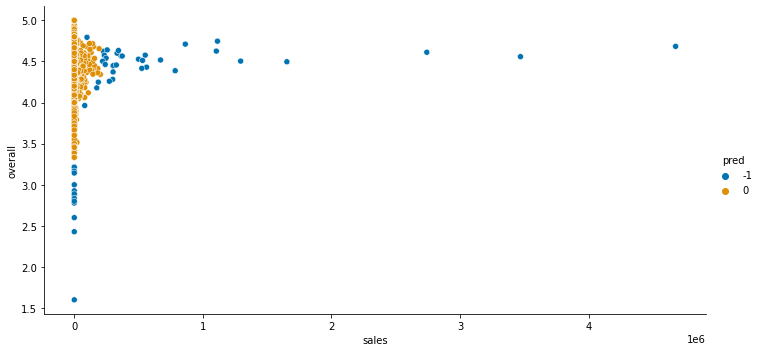

In [215]:
eps = 0.2; min_samples = 6

dbscan = DBSCAN(eps=eps, min_samples=min_samples)
y_dbscan = dbscan.fit_predict(df_cat_num_scaled)

df_cat['pred'] = y_dbscan
df_pred['y_dbscan'] = y_dbscan

sns.relplot(data=df_cat,x='sales',y='overall',hue='pred',palette='colorblind',aspect=2)

### Comparison

In [216]:
df_pred.head()

y_kmeans  y_hc  y_dbscan
0         2     1        -1
1         2     1        -1
2         2     1        -1
3         0     0        -1
4         0     0        -1

silhouette_score is a clustering metric- measure of how well the clusters are formed
it explains how close intra-cluster points are and how far far clusters are

In [217]:
sil_kmeans = silhouette_score(df_cat_num_scaled,y_kmeans)
sil_hc = silhouette_score(df_cat_num_scaled,y_hc)
sil_dbscan = silhouette_score(df_cat_num_scaled,y_dbscan)

print('Silhouette score:')
print('Kmeans: {:.3f}'.format(sil_kmeans))
print('AgglomerativeClustering: {:.3f}'.format(sil_hc))
print('DBSCAN: {:.3f}'.format(sil_dbscan))

Silhouette score:
Kmeans: 0.586
AgglomerativeClustering: 0.671
DBSCAN: 0.647


#### INFERENCE
On comparing the silhouette scores best model: AgglomerativeClustering

In [218]:
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(df_cat_num_scaled)

df_cat['pred'] = y_hc

## Characteristics of Clusters

In [219]:
clusters = df_cat.groupby('pred')
for i in range(3):
    print(f'Cluster {i}:',len(clusters.get_group(i)),'Categories')

Cluster 0: 592 Categories
Cluster 1: 3 Categories
Cluster 2: 47 Categories


### Cluster 0: Modrate performing

In [220]:
cluster_0 = clusters.get_group(0).sort_values(by='overall',ascending=True).drop(['pred'],axis=1)

print('Cluster Discription:')
display(cluster_0.describe())

print('\n\nTop 3 categories based on rating:')
display(cluster_0.loc[:,['category']].tail(3).style.hide_index())

print('\n\nBottom 3 categories based on rating:')
display(cluster_0.loc[:,['category']].head(3).style.hide_index())

Cluster Discription:


Freq     overall       price         sales
count    592.000000  592.000000  592.000000  5.920000e+02
mean    1651.922297    4.438617   24.465331  4.500662e+04
std     4255.613971    0.236456   30.386665  1.379478e+05
min        1.000000    3.833333    0.990000  9.900000e+00
25%       37.000000    4.285456   11.487500  6.348900e+02
50%      298.500000    4.456055   17.878502  5.802555e+03
75%     1352.500000    4.586094   26.496167  3.433773e+04
max    58258.000000    5.000000  522.990000  1.653682e+06



Top 3 categories based on rating:




Bottom 3 categories based on rating:


### Cluster 1: Best Performing

In [221]:
cluster_1 = clusters.get_group(1).sort_values(by='overall',ascending=True).drop(['pred'],axis=1)

print('Cluster Discription:')
display(cluster_1.describe())

print('\n\ncategories based on rating:')
display(cluster_1.loc[:,['category']].style.hide_index())

Cluster Discription:


Freq   overall      price         sales
count      3.000000  3.000000   3.000000  3.000000e+00
mean   74759.333333  4.618174  48.978550  3.630000e+06
std    12285.361913  0.062819  13.533349  9.774455e+05
min    63726.000000  4.558592  39.438923  2.742086e+06
25%    68140.000000  4.585364  41.234115  3.106316e+06
50%    72554.000000  4.612136  43.029306  3.470546e+06
75%    80276.000000  4.647965  53.748363  4.073958e+06
max    87998.000000  4.683794  64.467419  4.677369e+06



categories based on rating:


### Cluster 2: Needs Improvement

In [222]:
cluster_2 = clusters.get_group(2).sort_values(by='overall',ascending=True).drop(['pred'],axis=1)

print('Cluster Discription:')
display(cluster_2.describe())

print('\n\nTop 3 categories based on rating:')
display(cluster_2.loc[:,['category']].tail(3).style.hide_index())

print('\n\nBottom 3 categories based on rating:')
display(cluster_2.loc[:,['category']].head(3).style.hide_index())

Cluster Discription:


Freq    overall      price         sales
count   47.000000  47.000000  47.000000     47.000000
mean    74.702128   3.370894  13.687008   1672.982553
std    138.853209   0.443647  13.836650   4008.675040
min      5.000000   1.600000   0.990000      9.950000
25%      8.000000   3.188596   5.965000     61.465000
50%     17.000000   3.500000   9.960000    136.440000
75%     65.000000   3.710084  15.718172    845.780000
max    760.000000   3.800000  86.766987  20737.310000



Top 3 categories based on rating:




Bottom 3 categories based on rating:


### Suggestions
  * First cluster (Moderate performing ) is having good ratings but average sales. As observed the categories with less price is giving better sales and purchase frequency of those products is also high, so to improve the sales it is recommended to drop the price. 

  * Second cluster (Best performing) is having good ratings as well as sales. So, these categories should not be tampered. 

  * Second cluster (Needs Improvement) is having worst response in terms of rating as well as sales. So, complete overhauling is required to improve their ratings.



---

# Demand forecasting 
as per sentiments

In [223]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller,acf,pacf
from pmdarima.arima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

import itertools
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

### Data preparation for time series analysis

In [224]:
Positive = df[df['predicted']=='Positive']
Negative = df[df['predicted']=='Negative']
Neutral = df[df['predicted']=='Neutral']

In [225]:
print('Positive reviews')
Positive.set_index('reviewTime',inplace=True)
Positive.sort_index(inplace=True)
display(Positive.head(3))

print('Negative reviews')
Negative.set_index('reviewTime',inplace=True)
Negative.sort_index(inplace=True)
display(Negative.head(3))

print('Neutral reviews')
Neutral.set_index('reviewTime',inplace=True)
Neutral.sort_index(inplace=True)
display(Neutral.head(3))

Positive reviews


overall  verified        asin  \
reviewTime                                  
1999-10-06      5.0     False  1572810939   
2000-03-08      5.0     False  B00000IWFB   
2000-03-08      5.0     False  B00000IWFB   

                                                   reviewText  \
reviewTime                                                      
1999-10-06  ready heart meet spade whist ready play wizard...   
2000-03-08  long ha toy yes awhile great play great stress...   
2000-03-08  long ha toy yes awhile great play great stress...   

                                            summary  \
reviewTime                                            
1999-10-06  The game was a great time for everyone.   
2000-03-08           Lots of fun for grown-ups too!   
2000-03-08           Lots of fun for grown-ups too!   

                                           category           brand  price  \
reviewTime                                                                   
1999-10-06  ['Toys & Games', 'Games', 'Card Games']        US Games  12.72   
2000-03-08                ['Toys & Games', 'Games']  Milton Bradley  39.63   
2000-03-08                ['Toys & Games', 'Games']  Milton Bradley  39.63   

           sentiment predicted  
reviewTime                      
1999-10-06  Positive  Positive  
2000-03-08  Positive  Positive  
2000-03-08  Positive  Positive

Negative reviews


overall  verified        asin  \
reviewTime                                  
2001-05-05      4.0     False  B000059LBN   
2001-05-05      4.0     False  B000059LBN   
2001-08-27      1.0     False  B00000ISUK   

                                                   reviewText  \
reviewTime                                                      
2001-05-05  wa reluctant let year old twin spend week allo...   
2001-05-05  wa reluctant let year old twin spend week allo...   
2001-08-27  toy wa dissapointing son love thomas toy poorl...   

                                     summary  \
reviewTime                                     
2001-05-05                        Shark Park   
2001-05-05                        Shark Park   
2001-08-27  Great character, poorly made toy   

                                                     category       brand  \
reviewTime                                                                  
2001-05-05  ['Toys & Games', 'Toy Remote Control & Play Ve...  Hot Wheels   
2001-05-05  ['Toys & Games', 'Toy Remote Control & Play Ve...  Hot Wheels   
2001-08-27  ['Toys & Games', 'Toy Remote Control & Play Ve...        TOMY   

             price sentiment predicted  
reviewTime                              
2001-05-05  239.99  Positive  Negative  
2001-05-05  239.99  Positive  Negative  
2001-08-27   59.99  Negative  Negative

Neutral reviews


overall  verified        asin  \
reviewTime                                  
2000-10-01      4.0     False  B00ESIWIO6   
2000-10-10      5.0     False  B00000IWCY   
2000-10-10      5.0     False  B00000IWCY   

                                                   reviewText  \
reviewTime                                                      
2000-10-01  endless game ha bad habit good version game e ...   
2000-10-10  paper pen hand cross suspect knew no longer su...   
2000-10-10  paper pen hand cross suspect knew no longer su...   

                                summary  \
reviewTime                                
2000-10-01  Lets start the Family Feud!   
2000-10-10     Mystery heaven for kids!   
2000-10-10     Mystery heaven for kids!   

                                            category          brand  price  \
reviewTime                                                                   
2000-10-01   ['Toys & Games', 'Games', 'Card Games']  Endless Games  14.99   
2000-10-10  ['Toys & Games', 'Games', 'Board Games']         Hasbro  79.99   
2000-10-10  ['Toys & Games', 'Games', 'Board Games']         Hasbro  79.99   

           sentiment predicted  
reviewTime                      
2000-10-01  Positive   Neutral  
2000-10-10  Positive   Neutral  
2000-10-10  Positive   Neutral

## Positive sentiment products

### Resempling of data on monthly basis

In [226]:
Positive_resample = Positive['price'].resample('m').sum()

# for data continuity
Positive_resample = Positive_resample[Positive_resample.index>'2002-01-01']    # to avoid null values 
Positive_resample[:5]

reviewTime
2002-01-31     37.47
2002-02-28    286.02
2002-03-31    146.48
2002-04-30    456.05
2002-05-31    646.87
Freq: M, Name: price, dtype: float64

### Data decomposition

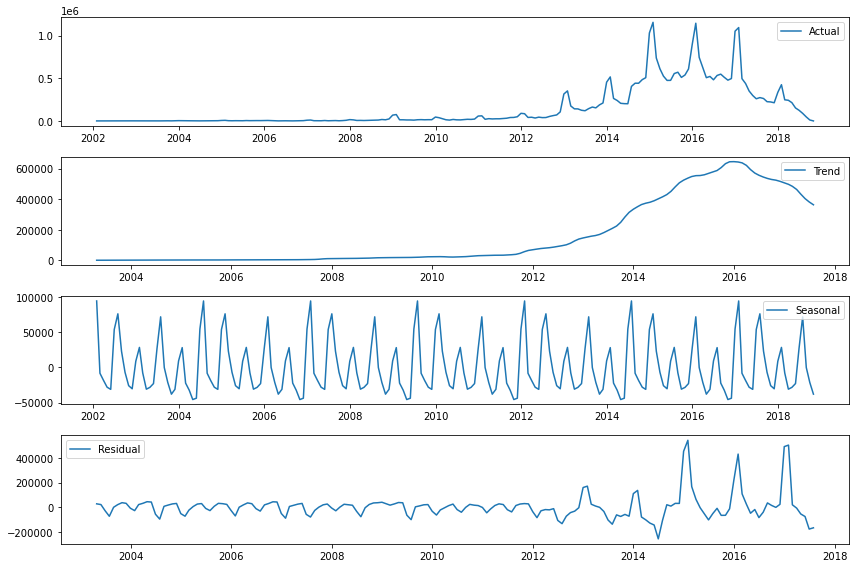

In [227]:
decomposition=seasonal_decompose(Positive_resample, period=30)
d_trend=decomposition.trend
d_seasonal=decomposition.seasonal
d_residual=decomposition.resid

# plotting all the 4 graphs
fig,ax = plt.subplots(4,1,figsize=(12,8))

plt.subplot(411)
plt.plot(Positive_resample,label='Actual')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(d_trend,label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(d_seasonal,label='Seasonal')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(d_residual,label='Residual')
plt.legend(loc='best')

plt.tight_layout()

#### Observations 
Trend: approaching inverted u trend
Seasonality: additive seasonality is observed after every 12 months
Residuals: magnitude of residuals correspond to the trend

#### Hypothesis behind the inverted u trend
Increasing broadband internet and 4g advancement created more ecommerce platforms and thereby more competitiors. Also by this time the living standards of people had improved and people started looking for more options.

### Data stationarity
ADF test to check the stationarity of data

In [228]:
def checkStationarity(data):
    '''Returns str that explains the passsed data is stationary or not'''
    pvalue = adfuller(data)[1]
    if(pvalue>0.05):
        msg = 'p-value = {:.3f}. Data is not stationary'.format(pvalue)
    else:
        msg='p-value = {:.3f}. Data is stationary'.format(pvalue)
        
    return(msg)

In [229]:
checkStationarity(Positive_resample)

'p-value = 0.322. Data is not stationary'

Data is not stationary i.e. data does not have constant mean and constant variance over the time. Data has to be made stationary for accurat statistical analysis.

### Differencing method to make data stationary

In [230]:
shift1 = Positive_resample - Positive_resample.shift(8)
checkStationarity(shift1.dropna())

'p-value = 0.001. Data is stationary'

In [231]:
Stationary_positive = shift1.dropna()

### Plot of before and after stationary

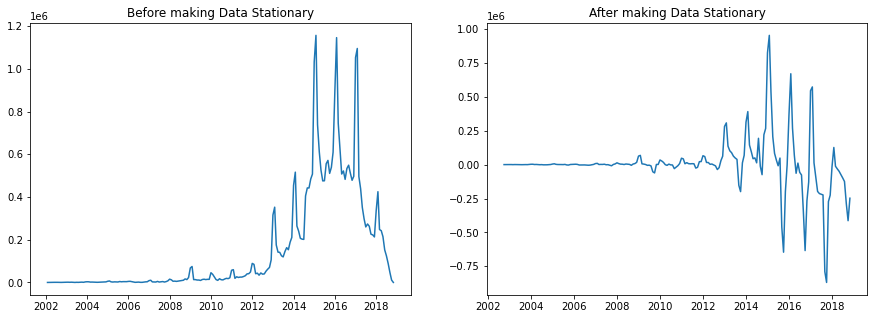

In [232]:
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(15,5))

ax[0].plot(Positive_resample)
ax[0].set_title('Before making Data Stationary')

ax[1].plot(Stationary_positive)
ax[1].set_title('After making Data Stationary')

plt.show()

Before stationarity: The average value changes over time and the peaks in the seasonal periods seem to get only larger
After stationarity treatment: The average value is not changing much, seasonal peaks over the time has decreased and trend component is not longer in data

### ACF & PACF Plot

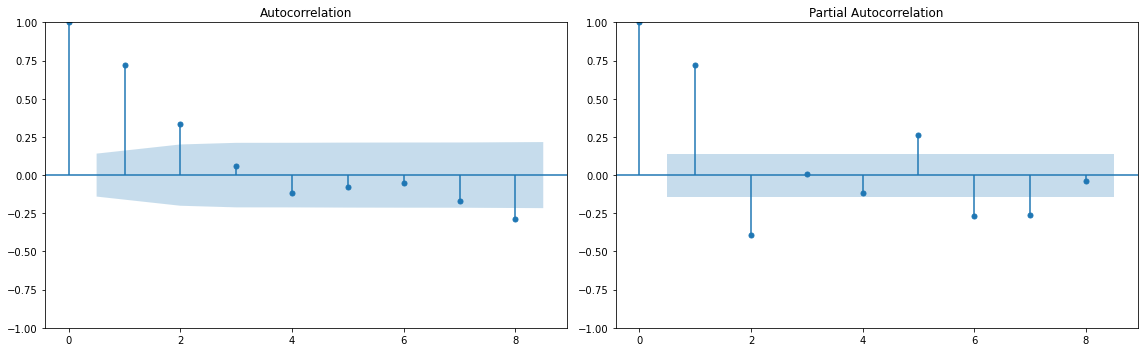

In [233]:
fig = plt.figure(figsize=(16,5))

# ACF
ax1 = fig.add_subplot(121)
sm.graphics.tsa.plot_acf(Stationary_positive, lags=8, ax=ax1)


# PACF
ax2 = fig.add_subplot(122)
sm.graphics.tsa.plot_pacf(Stationary_positive, lags=8, ax=ax2)
plt.tight_layout()

### Train - Test split

In [234]:
train_size = int(0.9 * len(Positive_resample))

train = Positive_resample.iloc[:train_size]
test = Positive_resample.iloc[train_size:]
print("train = {}, test = {}".format(len(train), len(test)))

train = 181, test = 21


## ARMA

### Hyperparameters with lowest AIC score

In [235]:
for p in range(1,9):
    for q in range(1,9):
        m1 = ARIMA(Stationary_positive,order=(p,0,q))
        r1 = m1.fit()
        print(f'for AR{p,0,q} AIC score is {r1.aic}')

for AR(1, 0, 1) AIC score is 5097.133881829964
for AR(1, 0, 2) AIC score is 5095.469998983457
for AR(1, 0, 3) AIC score is 5059.152737842514
for AR(1, 0, 4) AIC score is 5047.1005178346895
for AR(1, 0, 5) AIC score is 5068.304532940081
for AR(1, 0, 6) AIC score is 5076.586001483237
for AR(1, 0, 7) AIC score is 5079.9403505757455
for AR(1, 0, 8) AIC score is 5053.622474969638
for AR(2, 0, 1) AIC score is 5113.809704137695
for AR(2, 0, 2) AIC score is 5099.900101383599
for AR(2, 0, 3) AIC score is 5042.869328954021
for AR(2, 0, 4) AIC score is 5042.585160177465
for AR(2, 0, 5) AIC score is 5054.064146952822
for AR(2, 0, 6) AIC score is 5035.289938627549
for AR(2, 0, 7) AIC score is 5037.560078126355
for AR(2, 0, 8) AIC score is 5027.70247248273
for AR(3, 0, 1) AIC score is 5088.179602382462
for AR(3, 0, 2) AIC score is 5085.0968902178165
for AR(3, 0, 3) AIC score is 5043.399343928801
for AR(3, 0, 4) AIC score is 5044.575761988517
for AR(3, 0, 5) AIC score is 5055.358206819332
for AR(3, 0

### Training of model

In [236]:
p,d,q = 8,0,7
arma_model1 = ARIMA(train,order=(p,d,q)).fit()

print(arma_model1.summary())

                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:                  181
Model:                 ARIMA(8, 0, 7)   Log Likelihood               -2272.038
Date:                Wed, 01 Feb 2023   AIC                           4578.076
Time:                        21:47:34   BIC                           4632.451
Sample:                    01-31-2002   HQIC                          4600.121
                         - 01-31-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.436e+05   4.58e-08   3.14e+12      0.000    1.44e+05    1.44e+05
ar.L1          2.5410      0.275      9.224      0.000       2.001       3.081
ar.L2         -2.9698      0.715     -4.153      0.0

### Predictions

In [237]:
start = len(train)
end = len(train)+len(test)-1

pred = arma_model1.predict(start=start,end=end)

# pred.index=Positive_resample.index[start:end+1]

DF_ARMA1 = pd.DataFrame({'Actual':test,'Predicted':pred,'Error':test-pred})
DF_ARMA1.head()

Actual      Predicted          Error
2017-02-28  495870.80  908317.519617 -412446.719617
2017-03-31  438455.69  586506.731511 -148051.041511
2017-04-30  351062.03  511344.891798 -160282.861798
2017-05-31  298158.92  634562.982061 -336404.062061
2017-06-30  259863.83  687756.876972 -427893.046972

### Actual vs predicted

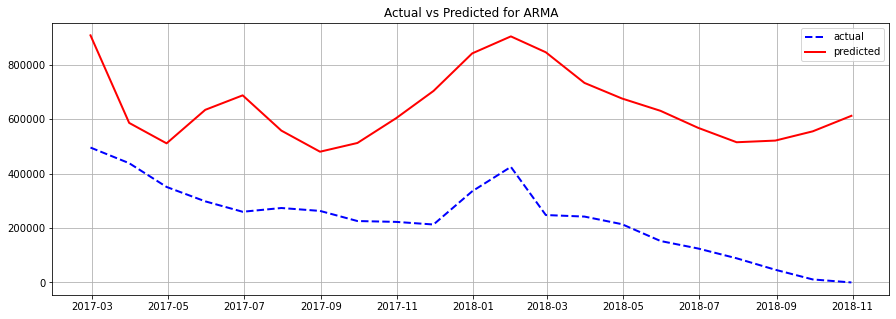

In [238]:
plt.figure(figsize=(15,5))
plt.plot(test,'b--',linewidth=2,label='actual')
plt.plot(pred,'r-',linewidth=2,label='predicted')
plt.title(f'Actual vs Predicted for ARMA')
plt.legend()
plt.grid()

Key to read the graph:
red corresponds to the model values and blue corresponds to the actual

Model is predicting near to the actual values but not the exact values and predicting values following the pattern of actual values

### Evaluation

In [239]:
mse = mean_squared_error(pred,test)
rmse = np.sqrt(mse)
print('Root Mean squarred error for ARMA model for positive sentiments  is : ',round(rmse,2))

Root Mean squarred error for ARMA model for positive sentiments  is :  431809.54


### Ljung box test
The test examines autocorrelations of the residuals to check the goodness of the model. If the autocorrelations are very small, it is a good model

In [240]:
pvalue = sm.stats.acorr_ljungbox(arma_model1.resid,lags=[1],return_df=True)['lb_pvalue'].values
if pvalue < 0.05:
    print("Reject H0. Bad model")
else:
    print("Fail-to-Reject H0. Good model")

Fail-to-Reject H0. Good model


### ARIMA

In [241]:
for p in range(1,10):
    for q in range(1,10):
        m1 = ARIMA(Stationary_positive,order=(p,8,q))
        r1 = m1.fit()
        print(f'for AR{p,8,q} AIC score is {r1.aic}')

for AR(1, 8, 1) AIC score is 5973.739194338568
for AR(1, 8, 2) AIC score is 5975.809111859669
for AR(1, 8, 3) AIC score is 6003.646934214655
for AR(1, 8, 4) AIC score is 5934.334404378402
for AR(1, 8, 5) AIC score is 5952.818595801137
for AR(1, 8, 6) AIC score is 6000.644884069352
for AR(1, 8, 7) AIC score is 6000.711004806088
for AR(1, 8, 8) AIC score is 6011.858513422048
for AR(1, 8, 9) AIC score is 6004.484558980857
for AR(2, 8, 1) AIC score is 5766.883389663999
for AR(2, 8, 2) AIC score is 5753.9421145215
for AR(2, 8, 3) AIC score is 5736.284991634828
for AR(2, 8, 4) AIC score is 5721.537379541745
for AR(2, 8, 5) AIC score is 5754.80780824501
for AR(2, 8, 6) AIC score is 5780.628173265165
for AR(2, 8, 7) AIC score is 5787.6315796811305
for AR(2, 8, 8) AIC score is 5780.5302819388335
for AR(2, 8, 9) AIC score is 5746.631749440104
for AR(3, 8, 1) AIC score is 5718.137634919867
for AR(3, 8, 2) AIC score is 5655.4672114236155
for AR(3, 8, 3) AIC score is 5661.161915407132
for AR(3, 8, 

### Training of model

In [242]:
p,d,q = 9,8,9
arima_model1 = ARIMA(train,order=(p,d,q)).fit()

print(arima_model1.summary())

                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:                  181
Model:                 ARIMA(9, 8, 9)   Log Likelihood               -2311.515
Date:                Wed, 01 Feb 2023   AIC                           4661.030
Time:                        21:48:45   BIC                           4720.943
Sample:                    01-31-2002   HQIC                          4685.336
                         - 01-31-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -3.2070      0.079    -40.513      0.000      -3.362      -3.052
ar.L2         -5.8071      0.247    -23.550      0.000      -6.290      -5.324
ar.L3         -7.9226      0.446    -17.779      0.0

### Predictions

In [243]:
start = len(train)
end = len(train)+len(test)-1
pred = arima_model1.predict(start=start,end=end)

DF_ARIMA1 = pd.DataFrame({'Actual':test,'Predicted':pred,'Error':test-pred})
DF_ARIMA1.head()

Actual      Predicted          Error
2017-02-28  495870.80  788528.122934 -292657.322934
2017-03-31  438455.69  872048.176746 -433592.486746
2017-04-30  351062.03  628858.397898 -277796.367898
2017-05-31  298158.92  511632.767769 -213473.847769
2017-06-30  259863.83  118866.677706  140997.152294

### Predicted vs actual

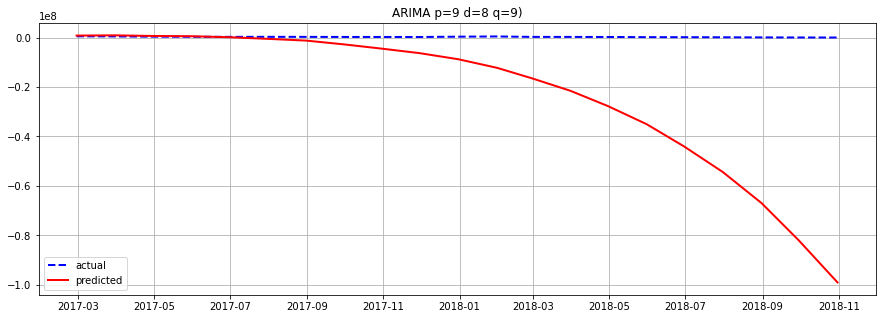

In [244]:
plt.figure(figsize=(15,5))

plt.plot(test,'b--',linewidth=2,label='actual')
plt.plot(pred,'r-',linewidth=2,label='predicted')
plt.title(f'ARIMA p={p} d={d} q={q})')
plt.legend()
plt.grid()

Key to read the graph:
red corresponds to the model values and blue corresponds to the actual

Here we can see as per the time increasing error in predictions is also increasing that means model have heteroscedasticity factor

### Evaluation

In [245]:
mse = mean_squared_error(pred,test)
rmse = np.sqrt(mse)
print('Root Mean squarred error for ARMA model for positive sentiments  is : ',round(rmse,2))

Root Mean squarred error for ARMA model for positive sentiments  is :  37175869.98


### Ljung box test

In [246]:
pvalue = sm.stats.acorr_ljungbox(arima_model1.resid,lags=[1],return_df=True)['lb_pvalue'].values
if pvalue < 0.05:
    print("Reject H0. Bad model")
else:
    print("Fail-to-Reject H0. Good model")

Reject H0. Bad model


### SARIMA

In [247]:
p,d,q = (8, 0, 7)

sarima_model1 = SARIMAX(train, order=(p,d,q), seasonal_order=(p,d,q,24)).fit()
print(sarima_model1.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              price   No. Observations:                  181
Model:             SARIMAX(8, 0, 7)x(8, 0, 7, 24)   Log Likelihood               -2256.440
Date:                            Wed, 01 Feb 2023   AIC                           4574.881
Time:                                    21:52:52   BIC                           4674.034
Sample:                                01-31-2002   HQIC                          4615.080
                                     - 01-31-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0598      1.596     -0.037      0.970      -3.188       3.069
ar.L2         -0.6893      0.797   

### Predictions

In [248]:
start = len(train)
end = len(train)+len(test)-1

pred = sarima_model1.predict(start=start,end=end)

DF_SARIMA1 = pd.DataFrame({'Actual':test,'Predicted':pred,'Error':test-pred})
DF_SARIMA1.head()

Actual      Predicted          Error
2017-02-28  495870.80  709629.813036 -213759.013036
2017-03-31  438455.69  528865.455981  -90409.765981
2017-04-30  351062.03  478183.075961 -127121.045961
2017-05-31  298158.92  479503.527986 -181344.607986
2017-06-30  259863.83  515527.086666 -255663.256666

### Actual vs Predicted

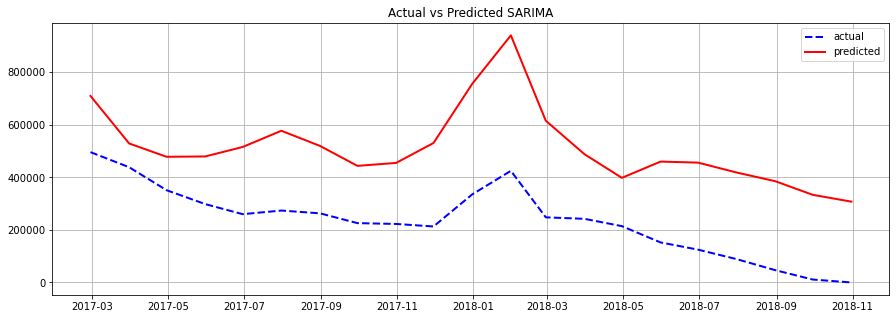

In [249]:
plt.figure(figsize=(15,5))

plt.plot(test,'b--',linewidth=2,label='actual')
plt.plot(pred,'r-',linewidth=2,label='predicted')
plt.title(f'Actual vs Predicted SARIMA')
plt.legend()
plt.grid()

### Evaluation

In [250]:
mse = mean_squared_error(pred,test)
rmse = np.sqrt(mse)
print('Root Mean squarred error for ARMA model for positive sentiments  is : ',round(rmse,2))

Root Mean squarred error for ARMA model for positive sentiments  is :  294919.88


### Ljung box test

In [251]:
pvalue = sm.stats.acorr_ljungbox(sarima_model1.resid,lags=[1],return_df=True)['lb_pvalue'].values
if pvalue < 0.05:
    print("Reject H0. Bad model")
else:
    print("Fail-to-Reject H0. Good model")

Fail-to-Reject H0. Good model


Model is predicting near to the actual values but not the exact values and predicted values following the pattern of actual values

SARIMA model giving the best predictions with compare to the other models as it have low RMSE value and the predicted values are following the actual values path and closed to it

### Foresacting the total sales 
for next 1 years

As SARIMA giving the best result with compare to ARIMA , ARMA i.e. SARIMA is using for forecasting

In [252]:
start = len(train)+len(test)
end = start + 12
future = sarima_model1.predict(start=start,end=end)
future

2018-11-30    355137.602884
2018-12-31    707850.076670
2019-01-31    698453.788441
2019-02-28    441977.362038
2019-03-31    298468.581106
2019-04-30    294398.387422
2019-05-31    338549.374740
2019-06-30    376932.224553
2019-07-31    390271.623689
2019-08-31    306464.361450
2019-09-30    249232.352157
2019-10-31    275947.310332
2019-11-30    343809.194756
Freq: M, Name: predicted_mean, dtype: float64

In [253]:
plt.figure(figsize=(16,5))

plt.plot(Positive_resample,color='black',label='Actual')
plt.plot(future,color='red',label='Forecast')
plt.title('Demand forecasting for 2019')

plt.legend()
plt.show()

#### Observation
2019 starts off with increase in sum(price) i.e sales from the previous year
follows the seasonality- sale hits peak at the 1st quarter and declines as the year passes lowest in november 2019 and then again increased for december

## Negative sentiment products

### Resempling of data on monthly basis

In [254]:
Negative_resample = Negative['price'].resample('m').sum()

Negative_resample = Negative_resample[Negative_resample.index>='2008-01-01']
Negative_resample[:5]

reviewTime
2008-01-31    1151.68
2008-02-29     508.76
2008-03-31     289.00
2008-04-30     520.37
2008-05-31     636.43
Freq: M, Name: price, dtype: float64

### Data decomposition

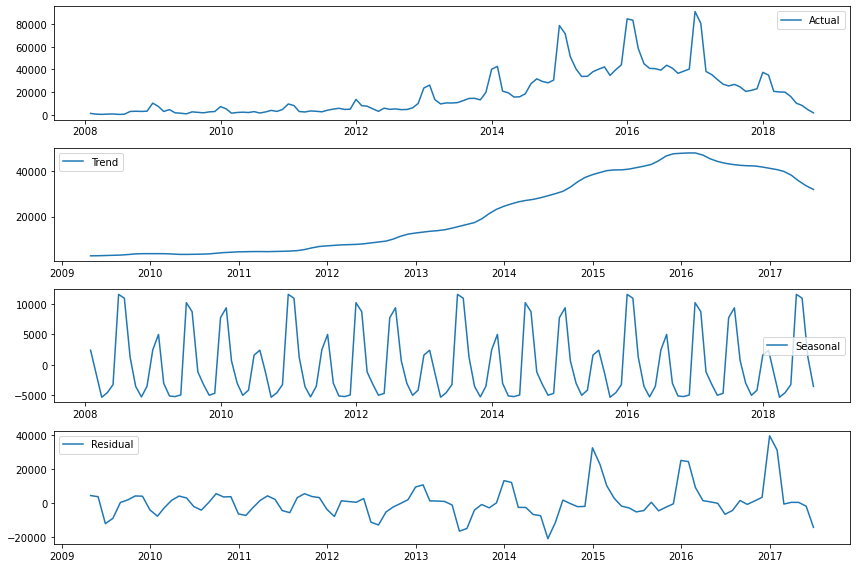

In [255]:
decomposition=seasonal_decompose(Negative_resample, period=30)
d_trend=decomposition.trend
d_seasonal=decomposition.seasonal
d_residual=decomposition.resid

# plotting all the 4 graphs
fig,ax = plt.subplots(4,1,figsize=(12,8))

plt.subplot(411)
plt.plot(Negative_resample,label='Actual')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(d_trend,label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(d_seasonal,label='Seasonal')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(d_residual,label='Residual')
plt.legend(loc='best')

plt.tight_layout()

Trend: approaching inverted u trend
Seasonality: additive seasonality is observed after every 12 months
Residuals: magnitude of residuals correspond to the trend

Hypothesis behind the inverted u trend:
Increasing broadband internet and 4g advancement created more ecommerce platforms and thereby more competitiors. Also by this time the living standards of people had improved and people started looking for more options

### ADF test ( Stationarity )

In [256]:
checkStationarity(Negative_resample)

'p-value = 0.592. Data is not stationary'

### Moving average technique to make data stationary

In [257]:
Stationary_negative = Negative_resample.rolling(window=12).mean().dropna()
checkStationarity(Stationary_negative)

'p-value = 0.086. Data is not stationary'

### Before & after data stationary

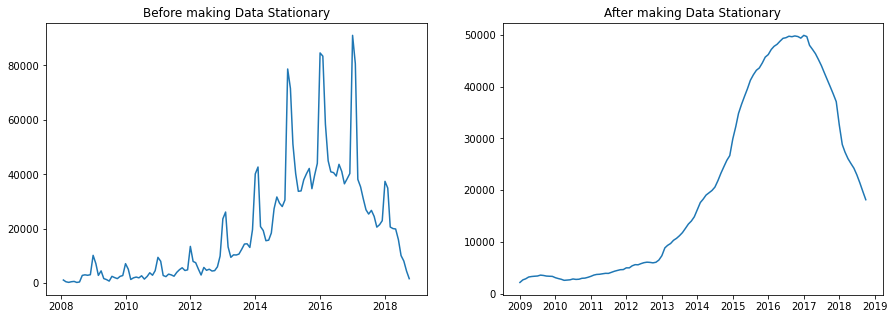

In [258]:
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(15,5))

ax[0].plot(Negative_resample)
ax[0].set_title('Before making Data Stationary')

ax[1].plot(Stationary_negative)
ax[1].set_title('After making Data Stationary')

plt.show()

Before stationarity: The average value changes over time and the peaks in the seasonal periods seem to get only larger
After stationarity treatment: The average value is constant 

### ACF & PACF plot

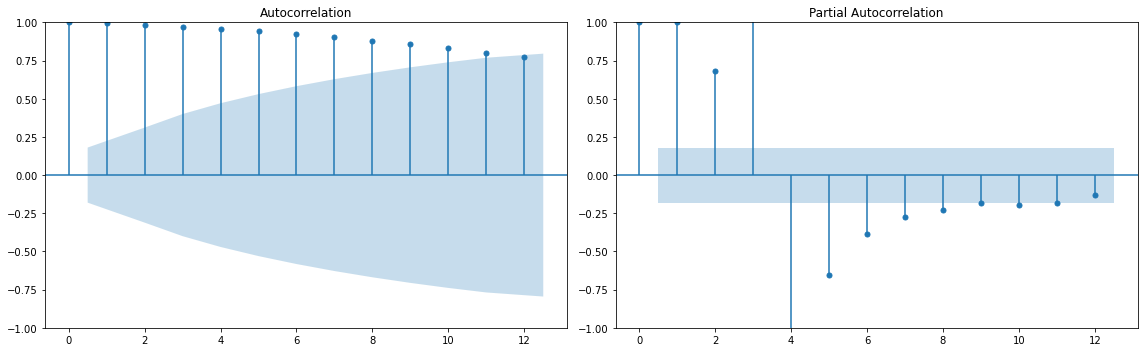

In [259]:
fig = plt.figure(figsize=(16,5))

# ACF
ax1 = fig.add_subplot(121)
sm.graphics.tsa.plot_acf(Stationary_negative, lags=12, ax=ax1)

# PACF
ax2 = fig.add_subplot(122)
sm.graphics.tsa.plot_pacf(Stationary_negative, lags=12, ax=ax2)
plt.tight_layout()

### Train - Test split

In [260]:
train_size = int(0.9 * len(Negative_resample))

train = Negative_resample.iloc[:train_size]
test = Negative_resample.iloc[train_size:]
print("train = {}, test = {}".format(len(train), len(test)))

train = 116, test = 13


### ARMA

### Hyperparameters with lowest AIC

In [261]:
for p in range(1,5):
    for q in range(1,12):
        m1 = ARIMA(Stationary_negative,order=(p,0,q))
        r1 = m1.fit()
        print(f'for AR{p,0,q} AIC score is {r1.aic}')

for AR(1, 0, 1) AIC score is 1900.178885386205
for AR(1, 0, 2) AIC score is 1875.656939391761
for AR(1, 0, 3) AIC score is 1859.1000159493951
for AR(1, 0, 4) AIC score is 1851.8846146162168
for AR(1, 0, 5) AIC score is 1851.2843984363526
for AR(1, 0, 6) AIC score is 1847.581783686588
for AR(1, 0, 7) AIC score is 1845.2634738844276
for AR(1, 0, 8) AIC score is 1850.4899005878567
for AR(1, 0, 9) AIC score is 1870.863693440873
for AR(1, 0, 10) AIC score is 1844.539440890431
for AR(1, 0, 11) AIC score is 1827.3294905381356
for AR(2, 0, 1) AIC score is 1826.0975252493502
for AR(2, 0, 2) AIC score is 1817.1068549093197
for AR(2, 0, 3) AIC score is 1818.987874279533
for AR(2, 0, 4) AIC score is 1821.4278940013596
for AR(2, 0, 5) AIC score is 1853.5177394991126
for AR(2, 0, 6) AIC score is 1823.7111192878374
for AR(2, 0, 7) AIC score is 1825.6364034401456
for AR(2, 0, 8) AIC score is 1829.0886834416892
for AR(2, 0, 9) AIC score is 1831.918015054153
for AR(2, 0, 10) AIC score is 1837.1604101032

### Traing the model

In [262]:
p,d,q = 2,0,2
arma_model2 = ARIMA(train,order=(p,d,q)).fit()
print(arma_model2.summary())

                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:                  116
Model:                 ARIMA(2, 0, 2)   Log Likelihood               -1221.942
Date:                Wed, 01 Feb 2023   AIC                           2455.883
Time:                        21:53:17   BIC                           2472.405
Sample:                    01-31-2008   HQIC                          2462.590
                         - 08-31-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.936e+04   2.17e+04      0.891      0.373   -2.32e+04     6.2e+04
ar.L1          1.2796      0.299      4.276      0.000       0.693       1.866
ar.L2         -0.2914      0.293     -0.995      0.3

### Predictions

In [263]:
start = len(train)
end =  len(train)+len(test)-1
pred = arma_model2.predict(start=start,end=end)

DF_ARMA2 = pd.DataFrame({'Actual':test,'Predicted':pred,'Error':test-pred})
DF_ARMA2.head()

Actual     Predicted        Error
2017-09-30  20587.95  27160.023814 -6572.073814
2017-10-31  21489.62  31070.520354 -9580.900354
2017-11-30  22958.08  32071.625342 -9113.545342
2017-12-31  37410.06  32212.959387  5197.100613
2018-01-31  34952.69  32102.045512  2850.644488

### Actual vs predicted

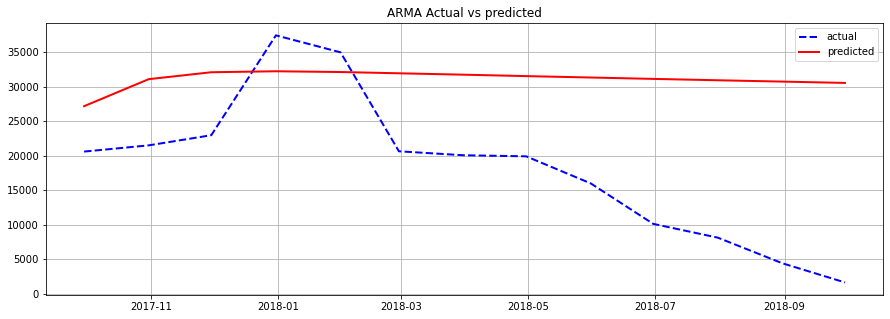

In [264]:
plt.figure(figsize=(15,5))

plt.plot(test,'b--',linewidth=2,label='actual')
plt.plot(pred,'r-',linewidth=2,label='predicted')

plt.title(f'ARMA Actual vs predicted')
plt.legend()
plt.grid()

### Evaluation

In [265]:
mse = mean_squared_error(pred,test)
rmse = np.sqrt(mse)
print('\nRoot Mean squarred error for ARMA model for negative sentiments  is : ',round(rmse,2))


Root Mean squarred error for ARMA model for negative sentiments  is :  16103.83


### Ljung box test

In [266]:
pvalue = sm.stats.acorr_ljungbox(arma_model2.resid,lags=[1],return_df=True)['lb_pvalue'].values
if pvalue < 0.05:
    print("Reject H0. Bad model")
else:
    print("Fail-to-Reject H0. Good model")

Fail-to-Reject H0. Good model


### ARIMA model for negative sentiments

In [267]:
for p in range(1,5):
    for q in range(1,12):
        m1 = ARIMA(Stationary_negative,order=(p,12,q))
        r1 = m1.fit()
        print(f'for AR{p,12,q} AIC score is {r1.aic}')

for AR(1, 12, 1) AIC score is 2638.0350511726388
for AR(1, 12, 2) AIC score is 2604.5046462225423
for AR(1, 12, 3) AIC score is 2423.867105595619
for AR(1, 12, 4) AIC score is 2577.062198308795
for AR(1, 12, 5) AIC score is 2608.5574336689706
for AR(1, 12, 6) AIC score is 2591.528428834647
for AR(1, 12, 7) AIC score is 2607.015611993488
for AR(1, 12, 8) AIC score is 2602.054573572848
for AR(1, 12, 9) AIC score is 2620.2955860707107
for AR(1, 12, 10) AIC score is 2622.215986540577
for AR(1, 12, 11) AIC score is 2626.7012562179057
for AR(2, 12, 1) AIC score is 2524.9295749827147
for AR(2, 12, 2) AIC score is 10.0
for AR(2, 12, 3) AIC score is 2315.7526723803317
for AR(2, 12, 4) AIC score is 14.0
for AR(2, 12, 5) AIC score is 2477.2866273110594
for AR(2, 12, 6) AIC score is 2482.3722926479227
for AR(2, 12, 7) AIC score is 2486.7252395262876
for AR(2, 12, 8) AIC score is 2484.6039643558784
for AR(2, 12, 9) AIC score is 2507.39077338435
for AR(2, 12, 10) AIC score is 2507.8901518653843
for 

### Training of model

In [268]:
p,d,q = 2,12,4

arima_model2 = ARIMA(train,order = (p,d,q)).fit()
print(arima_model2.summary())

                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:                  116
Model:                ARIMA(2, 12, 4)   Log Likelihood               -1562.745
Date:                Wed, 01 Feb 2023   AIC                           3139.490
Time:                        21:53:49   BIC                           3158.000
Sample:                    01-31-2008   HQIC                          3146.989
                         - 08-31-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.4170      1.239     -1.144      0.253      -3.845       1.011
ar.L2         -0.7756      1.356     -0.572      0.567      -3.432       1.881
ma.L1         -3.3413      1.853     -1.803      0.0

### Predictions

In [269]:
start = len(train)
end =  len(train)+len(test)-1
pred = arima_model2.predict(start=start,end=end)

DF_ARMA2 = pd.DataFrame({'Actual':test,'Predicted':pred,'Error':test-pred})
DF_ARMA2.head()

Actual     Predicted         Error
2017-09-30  20587.95 -3.099833e+05  3.305713e+05
2017-10-31  21489.62 -2.104469e+06  2.125958e+06
2017-11-30  22958.08 -8.418342e+06  8.441300e+06
2017-12-31  37410.06 -2.624662e+07  2.628403e+07
2018-01-31  34952.69 -6.987494e+07  6.990989e+07

### Actual vs predicted 

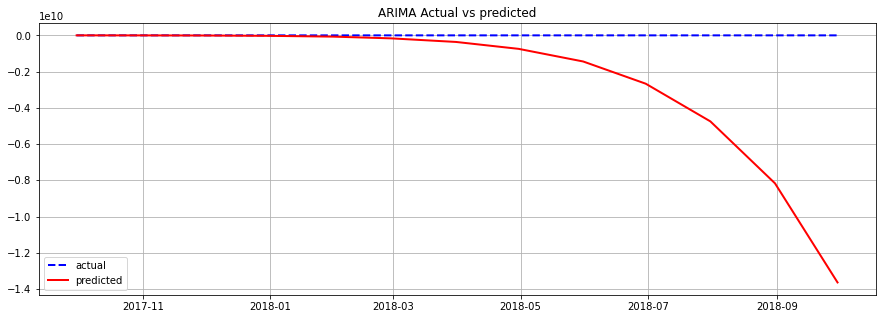

In [270]:
plt.figure(figsize=(15,5))

plt.plot(test,'b--',linewidth=2,label='actual')
plt.plot(pred,'r-',linewidth=2,label='predicted')

plt.title(f'ARIMA Actual vs predicted')
plt.legend()
plt.grid()

Here we can see as per the time increasing error in predictions is also increasing that means model have heteroscedasticity factor

### Evaluation

In [271]:
mse = mean_squared_error(pred,test)
rmse = np.sqrt(mse)
print('Root Mean squarred error for ARMA model for negative sentiments  is : ',round(rmse,2))

Root Mean squarred error for ARMA model for negative sentiments  is :  4683833107.67


### Ljung box test

In [272]:
pvalue = sm.stats.acorr_ljungbox(arima_model2.resid,lags=[1],return_df=True)['lb_pvalue'].values
if pvalue < 0.05:
    print("Reject H0. Bad model")
else:
    print("Fail-to-Reject H0. Good model")

Reject H0. Bad model


### SARIMA for negative sentiments

In [273]:
sarima_model2 = SARIMAX(train, order=(2,0,2), seasonal_order=(2,0,2,24)).fit()
pred=sarima_model2.predict(len(train),((len(train)+len(test)-1)))

### Predictions

In [274]:
start = len(train)
end =  len(train)+len(test)-1
pred = sarima_model2.predict(start=start,end=end)

DF_SARMA2 = pd.DataFrame({'Actual':test,'Predicted':pred,'Error':test-pred})
DF_SARMA2.head()

Actual     Predicted         Error
2017-09-30  20587.95  21076.462119   -488.512119
2017-10-31  21489.62  26931.250694  -5441.630694
2017-11-30  22958.08  29982.799486  -7024.719486
2017-12-31  37410.06  57414.778455 -20004.718455
2018-01-31  34952.69  56250.309101 -21297.619101

### Actual vs predicted

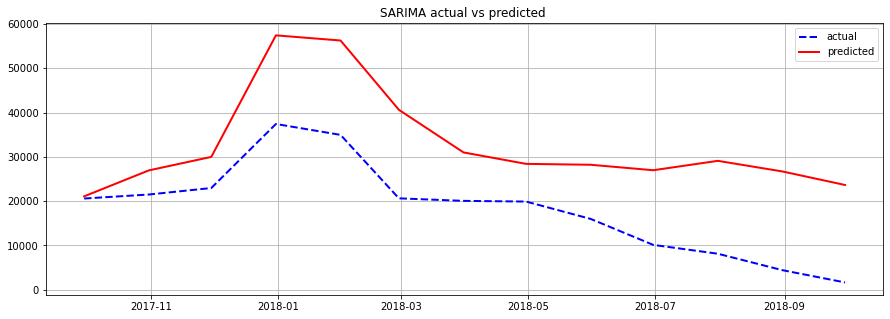

In [275]:
plt.figure(figsize=(15,5))

plt.plot(test,'b--',linewidth=2,label='actual')
plt.plot(pred,'r-',linewidth=2,label='predicted')
plt.title(f'SARIMA actual vs predicted ')
plt.legend()
plt.grid()

### Evaluation

In [276]:
mse = mean_squared_error(pred,test)
rmse = np.sqrt(mse)
print('Root Mean squarred error for ARMA model for negative sentiments  is : ',round(rmse,2))

Root Mean squarred error for ARMA model for negative sentiments  is :  16117.82


### Ljung box test

In [277]:
pvalue = sm.stats.acorr_ljungbox(sarima_model2.resid,lags=[1],return_df=True)['lb_pvalue'].values
if pvalue < 0.05:
    print("Reject H0. Bad model")
else:
    print("Fail-to-Reject H0. Good model")

Fail-to-Reject H0. Good model


SARIMA model giving the best predictions with compare to the other models as it have low RMSE value and the predicted values are following the actual values path and closed to it

### Forecasting the total sales for next year

In [278]:
start = len(train)+len(test)
end = start + 12
future = sarima_model2.predict(start=start,end=end)
future

2018-10-31    25141.002420
2018-11-30    26302.300519
2018-12-31    57888.795135
2019-01-31    51156.975441
2019-02-28    22496.917032
2019-03-31    21627.578447
2019-04-30    19220.555369
2019-05-31    16231.632073
2019-06-30    14637.562407
2019-07-31    15379.579373
2019-08-31    13580.643346
2019-09-30    11899.132967
2019-10-31    15546.458872
Freq: M, Name: predicted_mean, dtype: float64

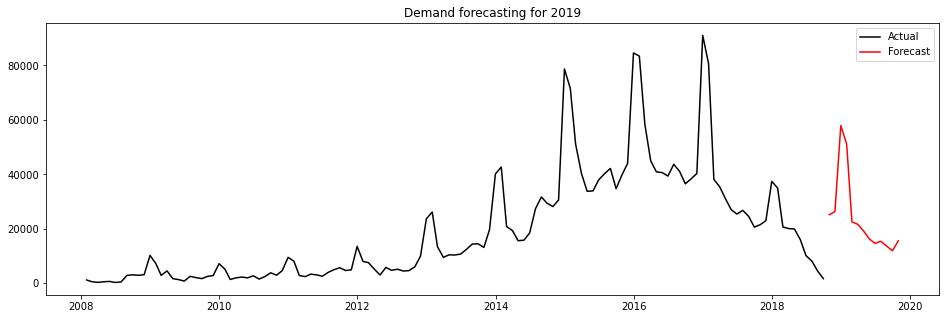

In [279]:
plt.figure(figsize=(16,5))

plt.plot(Negative_resample,color='black',label='Actual')
plt.plot(future,color='red',label='Forecast')
plt.title('Demand forecasting for 2019')

plt.legend()
plt.show()

#### Observation
2019 starts off with increase in sum(price) i.e sales from the previous year
follows the seasonality- sale hits peak at the 1st quarter and declines as the year passes reached lowest sales in november 2019 and then again increasd in december 2019

## Demand forecasting for neutral sentiment products

### Resempling on month basis

In [280]:
Neutral_resample = Neutral['price'].resample('m').sum()
Neutral_resample = Neutral_resample[Neutral_resample.index>'2007-01-01']
Neutral_resample

reviewTime
2007-01-31     2420.93
2007-02-28      321.43
2007-03-31     1285.47
2007-04-30     1323.72
2007-05-31      809.08
                ...   
2018-06-30    16050.24
2018-07-31    12038.56
2018-08-31     5637.02
2018-09-30     1893.54
2018-10-31       20.99
Freq: M, Name: price, Length: 142, dtype: float64

### Decomposition plot for neutral sentiments

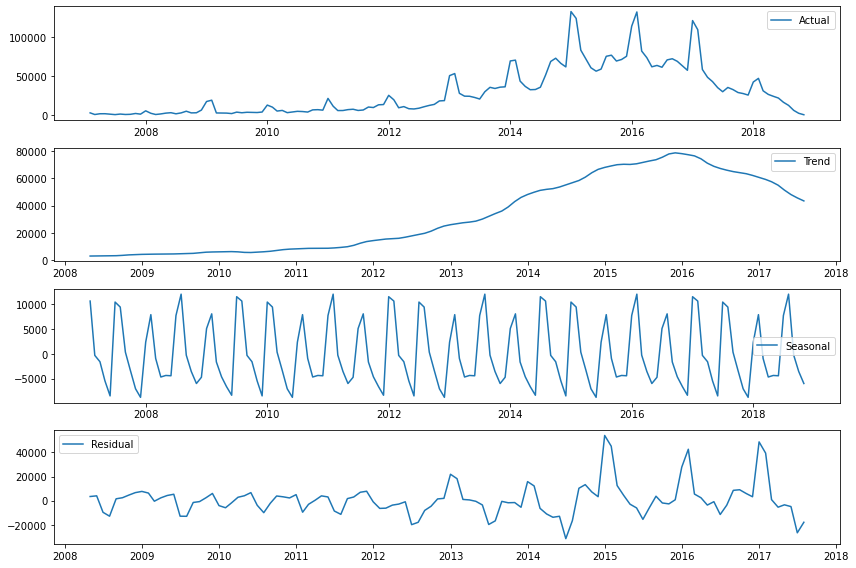

In [281]:
decomposition=seasonal_decompose(Neutral_resample, period=30)
d_trend=decomposition.trend
d_seasonal=decomposition.seasonal
d_residual=decomposition.resid

# plotting all the 4 graphs
fig,ax = plt.subplots(4,1,figsize=(12,8))

plt.subplot(411)
plt.plot(Neutral_resample,label='Actual')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(d_trend,label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(d_seasonal,label='Seasonal')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(d_residual,label='Residual')
plt.legend(loc='best')

plt.tight_layout()

Here we can see that the data have increasing trend after 2010 and start decreasing after 2015 as well as seasonality after every 2 years

### ADF test (Stationarity)

In [282]:
checkStationarity(Neutral_resample)

'p-value = 0.384. Data is not stationary'

### Moving average to make data stationary

In [283]:
Stationary_neutral=Stationary_negative = Neutral_resample.rolling(window=15).mean().dropna()
checkStationarity(Stationary_neutral)

'p-value = 0.032. Data is stationary'

### Plot before & after data stationary

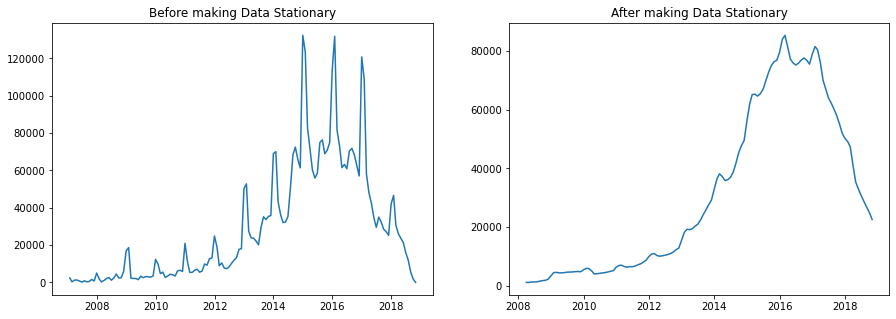

In [284]:
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(15,5))
ax[0].plot(Neutral_resample)
ax[0].set_title('Before making Data Stationary')
ax[1].plot(Stationary_neutral)
ax[1].set_title('After making Data Stationary')
plt.show()

### ACF & PACF Plot

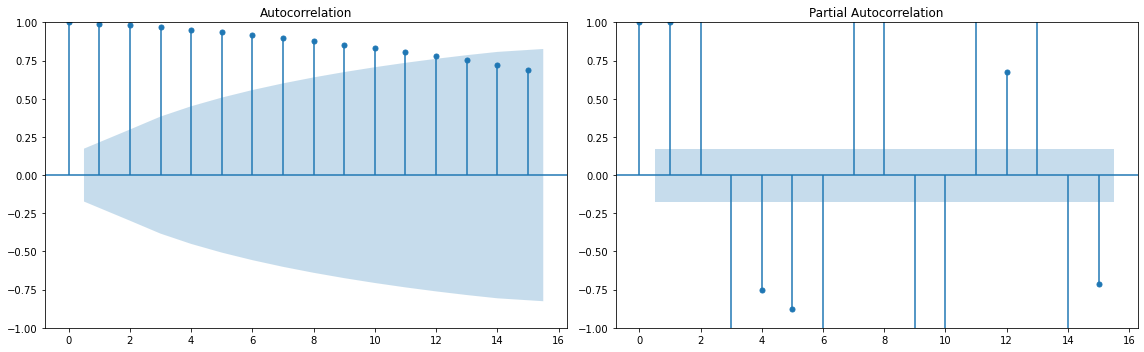

In [285]:
fig = plt.figure(figsize=(16,5))

# ACF
ax1 = fig.add_subplot(121)
sm.graphics.tsa.plot_acf(Stationary_neutral, lags=15, ax=ax1)

#  PACF
ax2 = fig.add_subplot(122)
sm.graphics.tsa.plot_pacf(Stationary_neutral, lags=15, ax=ax2)
plt.tight_layout()

### Train - Test split

In [286]:
train_size = int(0.8 * len(Neutral_resample))

train = Neutral_resample.iloc[:train_size]
test = Neutral_resample.iloc[train_size:]
print("train = {}, test = {}".format(len(train), len(test)))

train = 113, test = 29


### ARMA model for neutral sentiments

### Hyperparameters with lowest AIC

In [288]:
for p in range(1,8):
    for q in range(1,10):
        model = ARIMA(Stationary_neutral,order=(p,0,q))
        result = model.fit()
        print(f'for {(p,0,q)} aic score is {result.aic}')

for (1, 0, 1) aic score is 2217.243720916559
for (1, 0, 2) aic score is 2194.2269254805483
for (1, 0, 3) aic score is 2185.377592796187
for (1, 0, 4) aic score is 2182.1945789133842
for (1, 0, 5) aic score is 2179.808999603245
for (1, 0, 6) aic score is 2220.5540312665134
for (1, 0, 7) aic score is 2236.8806074180143
for (1, 0, 8) aic score is 2256.333352851591
for (1, 0, 9) aic score is 2258.2389057486835
for (2, 0, 1) aic score is 2188.426580505467
for (2, 0, 2) aic score is 2182.86205320085
for (2, 0, 3) aic score is 2179.440844986243
for (2, 0, 4) aic score is 2178.996333324755
for (2, 0, 5) aic score is 2166.7223619803244
for (2, 0, 6) aic score is 2184.87811722847
for (2, 0, 7) aic score is 2187.0351399445176
for (2, 0, 8) aic score is 2188.8000969653635
for (2, 0, 9) aic score is 2194.112324123685
for (3, 0, 1) aic score is 2190.1594464209584
for (3, 0, 2) aic score is 2191.055651026958
for (3, 0, 3) aic score is 2181.548544814576
for (3, 0, 4) aic score is 2174.496233742788
for

LinAlgError: LU decomposition error.

### Training the model

In [289]:
p=7;q=6
model = ARIMA(train,order=(p,0,q))
arma_model3 = model.fit()
arma_model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  price   No. Observations:                  113
Model:                 ARIMA(7, 0, 6)   Log Likelihood               -1203.799
Date:                Wed, 01 Feb 2023   AIC                           2437.598
Time:                        21:56:10   BIC                           2478.509
Sample:                    01-31-2007   HQIC                          2454.199
                         - 05-31-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        2.61e+04   2.62e+04      0.997      0.319   -2.52e+04    7.74e+04
ar.L1          0.2887      0.825      0.350      0.726      -1.329       1.906
ar.L2         -0.2250      0.981     -0.229      0.819      -2.148       1.698
ar.L3         -0.2691      1.059     -0.254      0.799      -2.345       1.807
ar.L4          0.5318      0.735      0.724      0.469      -0.908       1.972
ar.L5         -0.1949      0.251     -0.777      0.437      -0.686       0.297
ar.L6          0.1693      0.233      0.728      0.467      -0.287       0.625
ar.L7          0.4120      0.300      1.375      0.169      -0.175       0.999
ma.L1          0.7191      0.891      0.807      0.419      -1.026       2.465
ma.L2          0.5993      0.455      1.319      0.187      -0.292       1.490
ma.L3          0.9902      0.639      1.549      0.121      -0.263       2.243
ma.L4          0.4625      0.420      1.101      0.271      -0.361       1.286
ma.L5          0.9172      0.221      4.147      0.000       0.484       1.351
ma.L6          0.7591      0.632      1.201      0.230      -0.480       1.998
sigma2      9.335e+07      0.879   1.06e+08      0.000    9.34e+07    9.34e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               272.05
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):              18.53   Skew:                             1.54
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.95
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 9.02e+24. Standard errors may be unstable.
"""

### Predictions

In [290]:
start = len(train)
end = len(train)+len(test)-1

pred = arma_model3.predict(start=start,end=end)

DF_ARMA3 = pd.DataFrame({ 'Actual':test, 'Predicted':pred, 'Error':test-pred})
DF_ARMA3.head()

Actual     Predicted         Error
2016-06-30  60919.55  70938.372709 -10018.822709
2016-07-31  70344.84  62076.680303   8268.159697
2016-08-31  71818.64  58724.968767  13093.671233
2016-09-30  68539.70  42389.307829  26150.392171
2016-10-31  62694.58  37106.801853  25587.778147

### Actual vs predicted

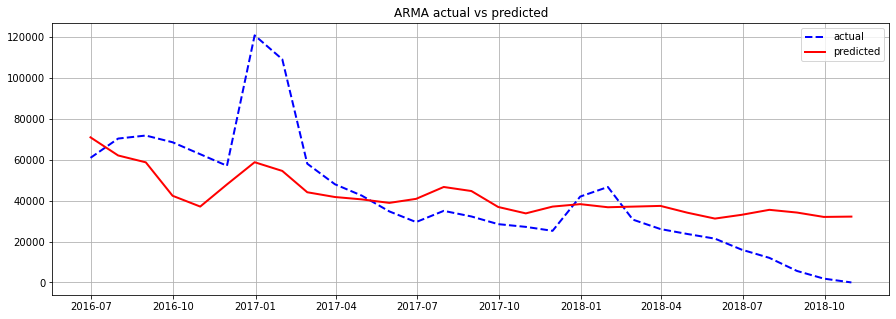

In [291]:
plt.figure(figsize=(15,5))

plt.plot(test,'b--',linewidth=2,label='actual')
plt.plot(pred,'r-',linewidth=2,label='predicted')

plt.title(f'ARMA actual vs predicted')
plt.legend()
plt.grid()

### Evaluation

In [292]:
mse = mean_squared_error(pred,test)
rmse = np.sqrt(mse)
print('Root Mean squarred error for ARMA model for Neutral sentiments  is : ',round(rmse,2))

Root Mean squarred error for ARMA model for Neutral sentiments  is :  21654.88


### Ljung box

In [293]:
pvalue = sm.stats.acorr_ljungbox(arma_model3.resid,lags=[1],return_df=True)['lb_pvalue'].values
if pvalue < 0.05:
    print("Reject H0. Bad model")
else:
    print("Fail-to-Reject H0. Good model")

Fail-to-Reject H0. Good model


### ARIMA model for neutral sentiments

In [294]:
for p in range(1,3):
    for q in range(1,13):
        model = ARIMA(Stationary_neutral,order=(p,15,q))
        result = model.fit()
        print(f'for {(p,15,q)} aic score is {result.aic}')

for (1, 15, 1) aic score is 3390.1855805172454
for (1, 15, 2) aic score is 3365.2332102678088
for (1, 15, 3) aic score is 3348.636508347122
for (1, 15, 4) aic score is 3344.173085311957
for (1, 15, 5) aic score is 3346.1278298012016
for (1, 15, 6) aic score is 3343.350034479452
for (1, 15, 7) aic score is 3349.485853654479
for (1, 15, 8) aic score is 3367.033741043735
for (1, 15, 9) aic score is 3382.8740095493768
for (1, 15, 10) aic score is 3402.3553666134717
for (1, 15, 11) aic score is 3405.064744032577
for (1, 15, 12) aic score is 3408.9981323436864
for (2, 15, 1) aic score is 3133.2664477660196
for (2, 15, 2) aic score is 3041.6065402147456
for (2, 15, 3) aic score is 2955.4776195574946
for (2, 15, 4) aic score is 2996.8616293549458
for (2, 15, 5) aic score is 3040.027624041688
for (2, 15, 6) aic score is 3006.8387983267257
for (2, 15, 7) aic score is 3055.3827183185435
for (2, 15, 8) aic score is 3093.52106991244
for (2, 15, 9) aic score is 3106.636801075778
for (2, 15, 10) aic 

### training the model

In [295]:
p,d,q = 2,15,3

arima_model3 = ARIMA(train,order=(p,d,q)).fit()
print(arima_model3.summary())

                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:                  113
Model:                ARIMA(2, 15, 3)   Log Likelihood               -1603.860
Date:                Wed, 01 Feb 2023   AIC                           3219.720
Time:                        21:56:29   BIC                           3235.229
Sample:                    01-31-2007   HQIC                          3225.993
                         - 05-31-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.5905      0.175     -9.108      0.000      -1.933      -1.248
ar.L2         -0.8642      0.188     -4.596      0.000      -1.233      -0.496
ma.L1         -2.8066      0.467     -6.014      0.0

### Predictions

In [296]:
start = len(train)
end = len(train)+len(test)-1

pred = arima_model3.predict(start=start,end=end)

DF_ARIMA3 = pd.DataFrame({ 'Actual':test, 'Predicted':pred, 'Error':test-pred})
DF_ARIMA3.head()

Actual     Predicted         Error
2016-06-30  60919.55  6.751544e+06 -6.690624e+06
2016-07-31  70344.84  6.634188e+07 -6.627153e+07
2016-08-31  71818.64  3.713027e+08 -3.712309e+08
2016-09-30  68539.70  1.539281e+09 -1.539213e+09
2016-10-31  62694.58  5.247672e+09 -5.247609e+09

### Actual vs Predicted

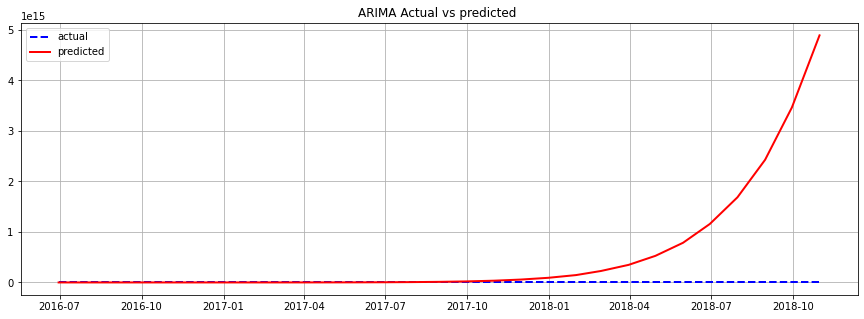

In [297]:
plt.figure(figsize=(15,5))

plt.plot(test,'b--',linewidth=2,label='actual')
plt.plot(pred,'r-',linewidth=2,label='predicted')

plt.title(f'ARIMA Actual vs predicted ')
plt.legend()
plt.grid()

### Evaluation

In [298]:
mse = mean_squared_error(pred,test)
rmse = np.sqrt(mse)
print('Root Mean squarred error for ARIMA model for Neutral sentiments  is : ',round(rmse,2))

Root Mean squarred error for ARIMA model for Neutral sentiments  is :  1274218836552319.8


### Ljung box test

In [299]:
pvalue = sm.stats.acorr_ljungbox(arima_model3.resid,lags=[1],return_df=True)['lb_pvalue'].values
if pvalue < 0.05:
    print("Reject H0. Bad model")
else:
    print("Fail-to-Reject H0. Good model")

Reject H0. Bad model


### SARIMA model for neutral sentiments

In [300]:
p,d,q = (7, 0, 9)

sarima_model3 = SARIMAX(train,order=(p,d,q),seasonal_order=(p,d,q,24)).fit()
print(sarima_model3.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              price   No. Observations:                  113
Model:             SARIMAX(7, 0, 9)x(7, 0, 9, 24)   Log Likelihood               -1191.181
Date:                            Wed, 01 Feb 2023   AIC                           2448.363
Time:                                    22:00:43   BIC                           2538.367
Sample:                                01-31-2007   HQIC                          2484.885
                                     - 05-31-2016                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2286      3.235      0.071      0.944      -6.112       6.570
ar.L2         -0.5137      3.063   

### Predictions

In [301]:
start = len(train)
end = len(train)+len(test)-1

pred = sarima_model3.predict(start=start,end=end)

DF_SARIMA3 = pd.DataFrame({ 'Actual':test, 'Predicted':pred, 'Error':test-pred})
DF_SARIMA3.head()

Actual     Predicted        Error
2016-06-30  60919.55  68385.416576 -7465.866576
2016-07-31  70344.84  67223.194027  3121.645973
2016-08-31  71818.64  74857.744331 -3039.104331
2016-09-30  68539.70  66152.340287  2387.359713
2016-10-31  62694.58  55169.635671  7524.944329

### Actual vs predicted

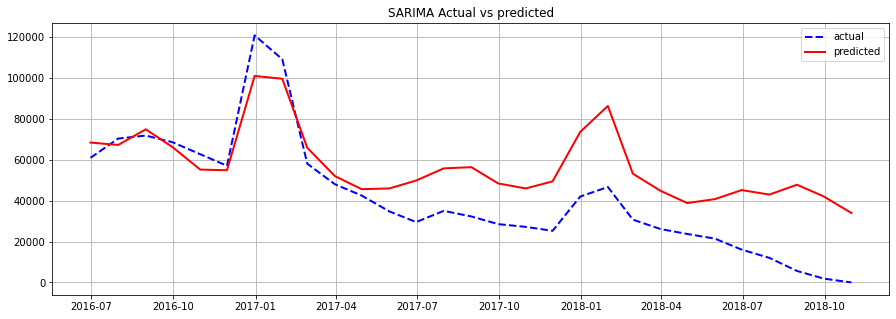

In [302]:
plt.figure(figsize=(15,5))

plt.plot(test,'b--',linewidth=2,label='actual')
plt.plot(pred,'r-',linewidth=2,label='predicted')

plt.title(f'SARIMA Actual vs predicted')
plt.legend()
plt.grid()

### Evaluation

In [303]:
mse = mean_squared_error(pred,test)
rmse = np.sqrt(mse)
print('Root Mean squarred error for SARIMA model for Neutral sentiments  is : ',round(rmse,2))

Root Mean squarred error for SARIMA model for Neutral sentiments  is :  21940.91


### Ljung box test

In [304]:
pvalue = sm.stats.acorr_ljungbox(sarima_model3.resid,lags=[1],return_df=True)['lb_pvalue'].values
if pvalue < 0.05:
    print("Reject H0. Bad model")
else:
    print("Fail-to-Reject H0. Good model")

Fail-to-Reject H0. Good model


### Forecasting the total sales for next year

In [305]:
start = len(train)+len(test)
end = start + 12
future = sarima_model3.predict(start=start,end=end)
future

2018-11-30    34370.573975
2018-12-31    62119.808250
2019-01-31    63015.435238
2019-02-28    41315.984338
2019-03-31    31508.081697
2019-04-30    28293.961863
2019-05-31    28580.829440
2019-06-30    31703.539924
2019-07-31    34393.574974
2019-08-31    34764.793838
2019-09-30    30189.400610
2019-10-31    27723.292617
2019-11-30    30183.126417
Freq: M, Name: predicted_mean, dtype: float64

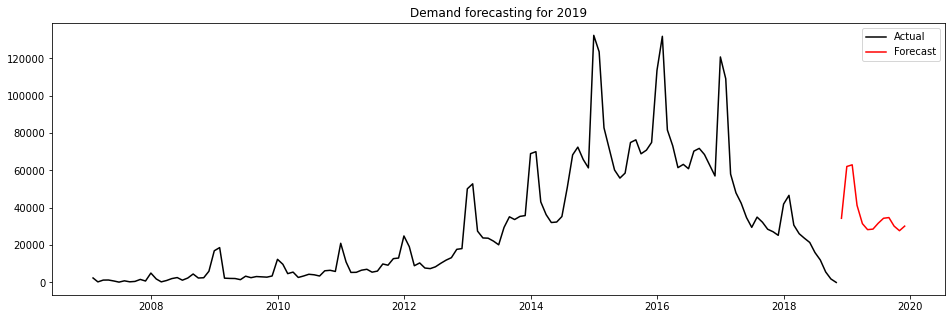

In [306]:
plt.figure(figsize=(16,5))

plt.plot(Neutral_resample,color='black',label='Actual')
plt.plot(future,color='red',label='Forecast')
plt.title('Demand forecasting for 2019')

plt.legend()
plt.show()

#### Observation 
2019 starts off with increase in sum(price) i.e sales from the previous year
follows the seasonality- sale hits highest peak at the 1st quarter and 2nd highest peak at the end of the third quarter

---

### Forecasting the total sales of the category with highest reviews
['Toys & Games', 'Action Figures & Statues', 'Action Figures']

In [307]:
prod  = df[(df['category'] == "['Toys & Games', 'Action Figures & Statues', 'Action Figures']")]
prod.head(3)

overall  verified reviewTime        asin  \
2586      5.0     False 2014-11-07  1616594985   
2587      5.0      True 2014-10-30  1616594985   
2588      5.0      True 2016-07-23  1616594985   

                                             reviewText  \
2586  cersei lannister finally dark horse treatment ...   
2587  arrived today week finally jamie lannister com...   
2588  div id video block r2trhl6l66yo8n class sectio...   

                                                summary  \
2586       Beautiful and devious Cercei gets her figure   
2587  It arrived today 3 weeks finally. It and Jamie...   
2588                             All Hail Queen Cersei!   

                                               category              brand  \
2586  ['Toys & Games', 'Action Figures & Statues', '...  Dark Horse Deluxe   
2587  ['Toys & Games', 'Action Figures & Statues', '...  Dark Horse Deluxe   
2588  ['Toys & Games', 'Action Figures & Statues', '...  Dark Horse Deluxe   

       price sentiment predicted  
2586  139.99  Positive  Positive  
2587  139.99  Positive   Neutral  
2588  139.99  Positive  Positive

In [308]:
prod = prod.sort_values(by='reviewTime',ascending=True)
prod = prod.set_index('reviewTime')
prod = prod['price']
prod.head(3)

reviewTime
2000-05-02    19.95
2000-05-02    19.95
2001-06-13    35.77
Name: price, dtype: float64

### weekly resempling

In [309]:
prod = prod.resample('W').sum().round(2)
prod.head()

reviewTime
2000-05-07    39.9
2000-05-14     0.0
2000-05-21     0.0
2000-05-28     0.0
2000-06-04     0.0
Freq: W-SUN, Name: price, dtype: float64

### Data continuity

In [310]:
category_resemple = prod[prod.index>'2009-05-24']
category_resemple[:5]

reviewTime
2009-05-31     707.13
2009-06-07     366.02
2009-06-14     125.66
2009-06-21    1145.75
2009-06-28     661.65
Freq: W-SUN, Name: price, dtype: float64

### Decomposition chart

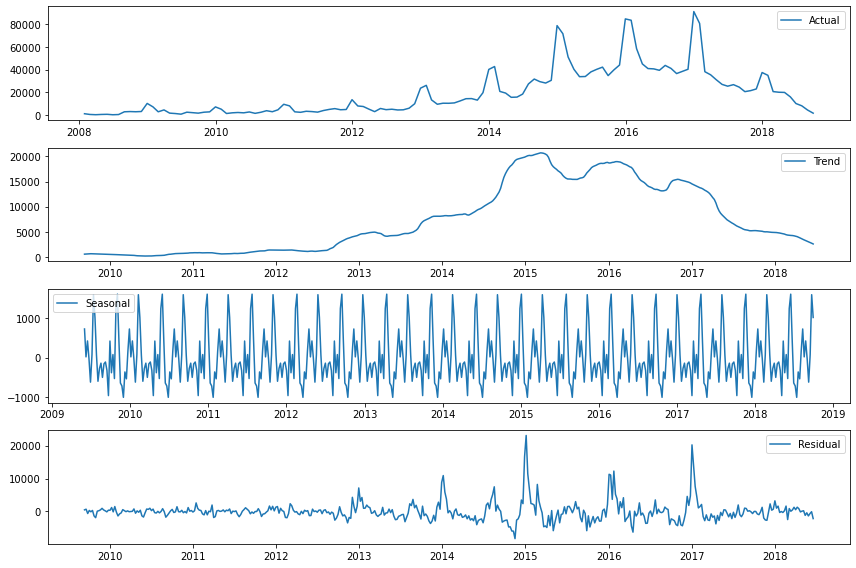

In [311]:
decomposition=seasonal_decompose(category_resemple, period=30)
d_trend=decomposition.trend
d_seasonal=decomposition.seasonal
d_residual=decomposition.resid

# plotting all the 4 graphs
fig,ax = plt.subplots(4,1,figsize=(12,8))

plt.subplot(411)
plt.plot(Negative_resample,label='Actual')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(d_trend,label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(d_seasonal,label='Seasonal')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(d_residual,label='Residual')
plt.legend(loc='best')

plt.tight_layout()

### Stationary check

In [312]:
checkStationarity(category_resemple)

'p-value = 0.477. Data is not stationary'

### making data stationary

In [313]:
category_resemple1 = category_resemple-category_resemple.shift(1)
category_resemple1 = category_resemple.dropna(axis=0)
category_resemple1

reviewTime
2009-05-31     707.13
2009-06-07     366.02
2009-06-14     125.66
2009-06-21    1145.75
2009-06-28     661.65
               ...   
2018-09-02     920.62
2018-09-09     246.23
2018-09-16     282.12
2018-09-23     296.84
2018-09-30     154.94
Freq: W-SUN, Name: price, Length: 488, dtype: float64

In [314]:
checkStationarity(category_resemple1)

'p-value = 0.477. Data is not stationary'

### ACF & PACF Plot 

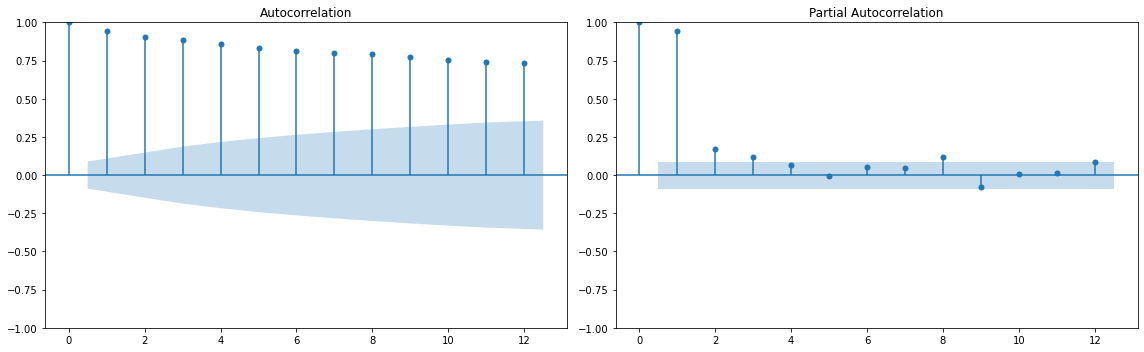

In [315]:
fig = plt.figure(figsize=(16,5))

ax1 = fig.add_subplot(121)
sm.graphics.tsa.plot_acf(category_resemple, lags=12, ax=ax1)

ax2 = fig.add_subplot(122)
sm.graphics.tsa.plot_pacf(category_resemple, lags=12, ax=ax2)
plt.tight_layout()

### Train -Test Split

In [316]:
train_size = int(0.90 * len(prod)) 
train = prod.iloc[:train_size]
test = prod.iloc[train_size:]
print("train = {}, test = {}".format(len(train), len(test)))

train = 864, test = 97


### ARMA model for cateory sales forecasting

### Hyperparameters for lowest AIC score

In [317]:
for p in range(1,8):
    for q in range(1,13):
        model = ARIMA(category_resemple1,order=(p,0,q))
        result = model.fit()
        print(f'for {(p,0,q)} aic score is {result.aic}')

for (1, 0, 1) aic score is 8984.690377055722
for (1, 0, 2) aic score is 8982.022609205664
for (1, 0, 3) aic score is 8983.341433838274
for (1, 0, 4) aic score is 8985.478555213693
for (1, 0, 5) aic score is 8984.386458412555
for (1, 0, 6) aic score is 8985.060233743981
for (1, 0, 7) aic score is 8985.537738211926
for (1, 0, 8) aic score is 8982.45748134948
for (1, 0, 9) aic score is 8982.400645432854
for (1, 0, 10) aic score is 8984.088425027985
for (1, 0, 11) aic score is 8981.469230949626
for (1, 0, 12) aic score is 8983.91645284713
for (2, 0, 1) aic score is 8980.035318234699
for (2, 0, 2) aic score is 8979.523591112847
for (2, 0, 3) aic score is 8983.47042444022
for (2, 0, 4) aic score is 8985.578955081219
for (2, 0, 5) aic score is 8987.209330551668
for (2, 0, 6) aic score is 8985.690408828166
for (2, 0, 7) aic score is 8982.231461973002
for (2, 0, 8) aic score is 8982.841504315651
for (2, 0, 9) aic score is 8981.527403573962
for (2, 0, 10) aic score is 8983.648335519327
for (2, 0

### Training of model

In [318]:
p,d,q = 6,0,6

model1 = ARIMA(train, order=(p,d,q)).fit()
print(model1.summary())

                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:                  864
Model:                 ARIMA(6, 0, 6)   Log Likelihood               -7576.264
Date:                Wed, 01 Feb 2023   AIC                          15180.529
Time:                        22:02:40   BIC                          15247.191
Sample:                    05-07-2000   HQIC                         15206.044
                         - 11-20-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3256.2941   2.49e-08   1.31e+11      0.000    3256.294    3256.294
ar.L1          0.0166      0.046      0.364      0.716      -0.073       0.106
ar.L2          0.6924      0.044     15.858      0.0

### Predictions

In [319]:
start = len(train)
end =  len(train)+len(test)-1
pred = model1.predict(start=start,end=end)

DF_ARMA = pd.DataFrame({ 'Actual':test, 'Predicted':pred, 'Error':-test+pred})
DF_ARMA.head()

Actual     Predicted        Error
2016-11-27  12501.41  11116.974627 -1384.435373
2016-12-04  15067.04  12997.799667 -2069.240333
2016-12-11  19488.52  12352.321324 -7136.198676
2016-12-18  16050.86  12236.259006 -3814.600994
2016-12-25  19515.66  11768.769643 -7746.890357

### Actual vs predicted

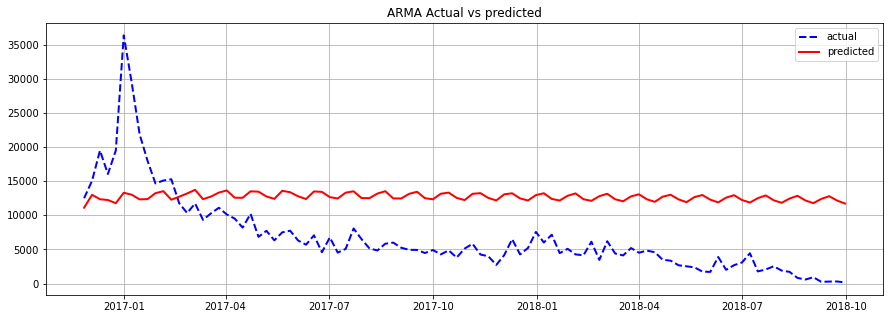

In [320]:
plt.figure(figsize=(15,5))

plt.plot(test,'b--',linewidth=2,label='actual')
plt.plot(pred,'r-',linewidth=2,label='predicted')

plt.title(f'ARMA Actual vs predicted')
plt.legend()
plt.grid()

### Evaluation

In [321]:
mse = mean_squared_error(pred,test)
rmse = np.sqrt(mse)
print('Root Mean squarred error for ARMA model  is : ',round(rmse,2))

Root Mean squarred error for ARMA model  is :  8297.47


### Ljung box test

In [322]:
pvalue = sm.stats.acorr_ljungbox(model1.resid,lags=[1],return_df=True)['lb_pvalue'].values
if pvalue < 0.05:
    print("Reject H0. Bad model")
else:
    print("Fail-to-Reject H0. Good model")

Fail-to-Reject H0. Good model


### ARIMA Model

In [323]:
for p in range(1,8):
    for q in range(1,13):
        model = ARIMA(category_resemple1,order=(p,1,q))
        result = model.fit()
        print(f'for {(p,1,q)} aic score is {result.aic}')

for (1, 1, 1) aic score is 8958.080439756464
for (1, 1, 2) aic score is 8956.895329617273
for (1, 1, 3) aic score is 8957.987578792821
for (1, 1, 4) aic score is 8967.920732302595
for (1, 1, 5) aic score is 8961.302713482622
for (1, 1, 6) aic score is 8962.964759654958
for (1, 1, 7) aic score is 8960.200090898776
for (1, 1, 8) aic score is 8961.156743004054
for (1, 1, 9) aic score is 8958.93983789957
for (1, 1, 10) aic score is 8961.077917642371
for (1, 1, 11) aic score is 8960.80123413772
for (1, 1, 12) aic score is 8961.784085458854
for (2, 1, 1) aic score is 8957.34279002417
for (2, 1, 2) aic score is 8960.115098331418
for (2, 1, 3) aic score is 8959.973980476696
for (2, 1, 4) aic score is 8960.66672942686
for (2, 1, 5) aic score is 8961.01445013666
for (2, 1, 6) aic score is 8962.959159265552
for (2, 1, 7) aic score is 8960.06577553754
for (2, 1, 8) aic score is 8960.90434620417
for (2, 1, 9) aic score is 8957.808957312784
for (2, 1, 10) aic score is 8962.241213659849
for (2, 1, 11

### training of model

In [324]:
p,d,q =1,1,7

model2 = ARIMA(train, order=(p,d,q)).fit()
print(model2.summary())

                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:                  864
Model:                 ARIMA(1, 1, 7)   Log Likelihood               -7583.967
Date:                Wed, 01 Feb 2023   AIC                          15185.933
Time:                        22:04:30   BIC                          15228.777
Sample:                    05-07-2000   HQIC                         15202.333
                         - 11-20-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6937      0.072     -9.694      0.000      -0.834      -0.553
ma.L1          0.4232      0.073      5.813      0.000       0.281       0.566
ma.L2         -0.2788      0.025    -10.943      0.0

### predictions

In [325]:
start = len(train)
end =  len(train)+len(test)-1
pred = model2.predict(start=start,end=end)

DF_ARiMA = pd.DataFrame({ 'Actual':test, 'Predicted':pred, 'Error':-test+pred})
DF_ARiMA.head()

Actual     Predicted        Error
2016-11-27  12501.41  12048.258935  -453.151065
2016-12-04  15067.04  12217.967938 -2849.072062
2016-12-11  19488.52  12080.563405 -7407.956595
2016-12-18  16050.86  12265.636977 -3785.223023
2016-12-25  19515.66  12030.681025 -7484.978975

### Actual vs predicted 

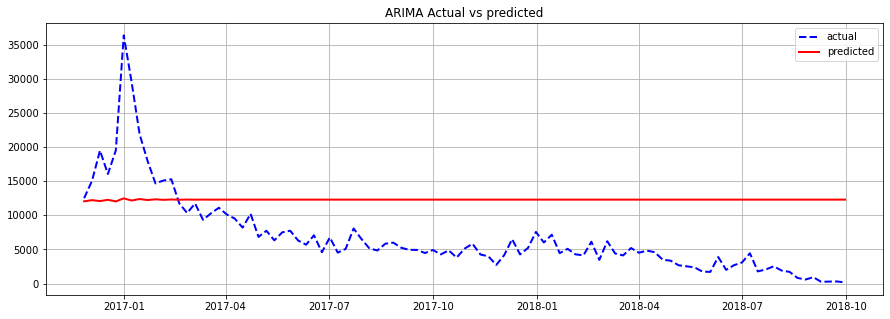

In [326]:
plt.figure(figsize=(15,5))

plt.plot(test,'b--',linewidth=2,label='actual')
plt.plot(pred,'r-',linewidth=2,label='predicted')

plt.title(f'ARIMA Actual vs predicted')
plt.legend()
plt.grid()

### Evaluation

In [327]:
mse = mean_squared_error(pred,test)
rmse = np.sqrt(mse)
print('Root Mean squarred error for ARIMA model  is : ',round(rmse,2))

Root Mean squarred error for ARIMA model  is :  8068.61


### Ljung box test

In [328]:
pvalue = sm.stats.acorr_ljungbox(model1.resid,lags=[1],return_df=True)['lb_pvalue'].values
if pvalue < 0.05:
    print("Reject H0. Bad model")
else:
    print("Fail-to-Reject H0. Good model")

Fail-to-Reject H0. Good model


### SARIMA Model

In [329]:
p,d,q = (6, 0, 6)
model = SARIMAX(train, order=(p,d,q), seasonal_order=(p,d,q,24)).fit()
print(model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              price   No. Observations:                  864
Model:             SARIMAX(6, 0, 6)x(6, 0, 6, 24)   Log Likelihood               -7577.832
Date:                            Wed, 01 Feb 2023   AIC                          15205.665
Time:                                    22:12:36   BIC                          15324.704
Sample:                                05-07-2000   HQIC                         15251.227
                                     - 11-20-2016                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0621      0.051      1.226      0.220      -0.037       0.161
ar.L2          0.6844      0.082   

### Predictions

In [330]:
start = len(train)
end =  len(train)+len(test)-1

pred = model.predict(start=start,end=end)

DF_SARIMA = pd.DataFrame({ 'Actual':test, 'Predicted':pred, 'Error':test-pred})
DF_SARIMA.head()

Actual     Predicted        Error
2016-11-27  12501.41  11469.490459  1031.919541
2016-12-04  15067.04  13299.807410  1767.232590
2016-12-11  19488.52  12567.849188  6920.670812
2016-12-18  16050.86  12212.618395  3838.241605
2016-12-25  19515.66  12049.171834  7466.488166

### Actual vs predicted

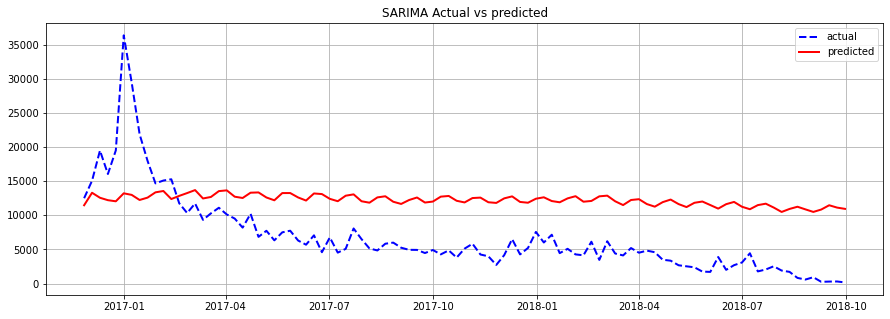

In [331]:
plt.figure(figsize=(15,5))

plt.plot(test,'b--',linewidth=2,label='actual')
plt.plot(pred,'r-',linewidth=2,label='predicted')

plt.title(f'SARIMA Actual vs predicted')
plt.legend()
plt.grid()

### Evaluation

In [332]:
mse = mean_squared_error(pred,test)
rmse = np.sqrt(mse)
print('Root Mean squarred error for SARIMA model  is : ',round(rmse,2))

Root Mean squarred error for SARIMA model  is :  7756.54


### Ljung box test

In [333]:
pvalue = sm.stats.acorr_ljungbox(model.resid,lags=[1],return_df=True)['lb_pvalue'].values
if pvalue < 0.05:
    print("Reject H0. Bad model")
else:
    print("Fail-to-Reject H0. Good model")

Fail-to-Reject H0. Good model


### Comparision between ARMA , ARIMA , SARIMA forecasting

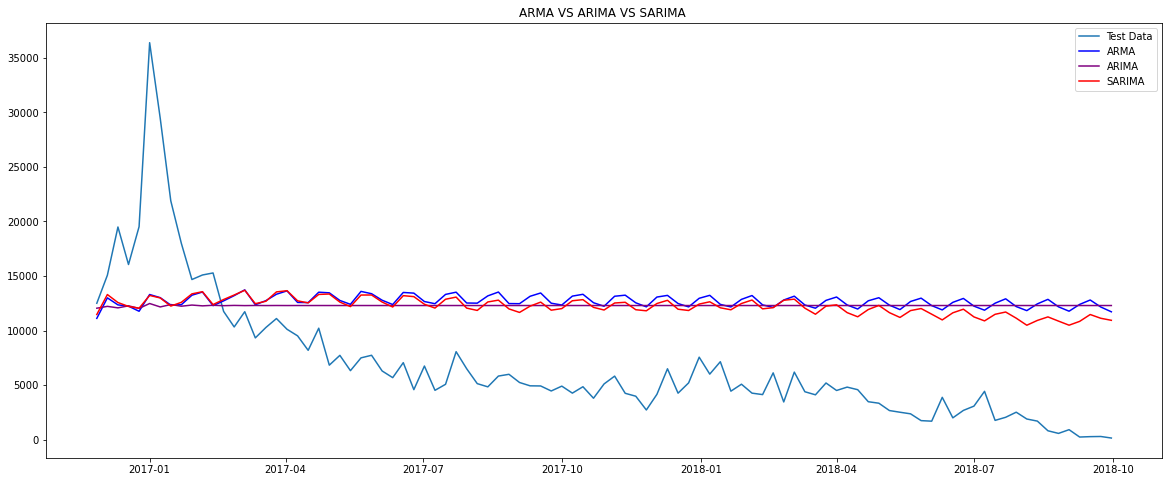

In [334]:
plt.figure(figsize=(20,8))
plt.plot(test,label='Test Data')
#plt.plot(category_resemple1,color='black',label='Actual')

plt.plot(DF_ARMA['Predicted'],color='blue',label='ARMA')
plt.plot(DF_ARiMA['Predicted'],color='purple',label='ARIMA')
plt.plot(DF_SARIMA['Predicted'],color='red',label='SARIMA')
plt.legend()

plt.title('ARMA VS ARIMA VS SARIMA ')
plt.show()

### Forecasting the next year sales for ['Toys & Games', 'Action Figures & Statues', 'Action Figures']  category

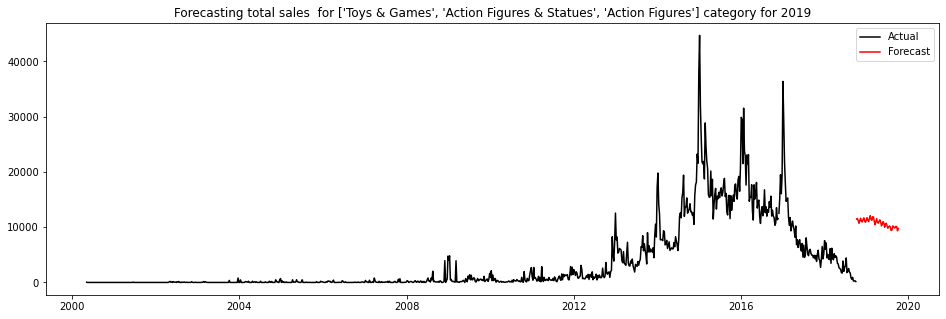

In [335]:
# forecast for the next 52 weeks
start = 864+97
end = start + 52
future = model.predict(start=start,end=end)
future

plt.figure(figsize=(16,5))

plt.plot(train,color='black',label='Actual')
plt.plot(test,color='black')
plt.plot(future,color='red',label='Forecast')
plt.title("Forecasting total sales  for ['Toys & Games', 'Action Figures & Statues', 'Action Figures'] category for 2019")

plt.legend()
plt.show()

#### Observation
the category rating for 2019 is expected to show a downward trend which is still more than 2018
also the variance in rating is reduced compared to the previous year

---

In [336]:
# reusability
d = df.copy()

d.sort_values(by='reviewTime',ascending=True,inplace=True)
d = d.set_index('reviewTime')
d.head()

overall  verified        asin  \
reviewTime                                  
1999-10-06      5.0     False  1572810939   
2000-03-08      5.0     False  B00000IWFB   
2000-03-08      5.0     False  B00000IWFB   
2000-05-02      3.0     False  B00000IW4C   
2000-05-02      3.0     False  B00000IW4C   

                                                   reviewText  \
reviewTime                                                      
1999-10-06  ready heart meet spade whist ready play wizard...   
2000-03-08  long ha toy yes awhile great play great stress...   
2000-03-08  long ha toy yes awhile great play great stress...   
2000-05-02  came price wa year ago said not getting commte...   
2000-05-02  came price wa year ago said not getting commte...   

                                            summary  \
reviewTime                                            
1999-10-06  The game was a great time for everyone.   
2000-03-08           Lots of fun for grown-ups too!   
2000-03-08           Lots of fun for grown-ups too!   
2000-05-02     Getting better with the POTF figures   
2000-05-02     Getting better with the POTF figures   

                                                     category           brand  \
reviewTime                                                                      
1999-10-06            ['Toys & Games', 'Games', 'Card Games']        US Games   
2000-03-08                          ['Toys & Games', 'Games']  Milton Bradley   
2000-03-08                          ['Toys & Games', 'Games']  Milton Bradley   
2000-05-02  ['Toys & Games', 'Action Figures & Statues', '...          Hasbro   
2000-05-02  ['Toys & Games', 'Action Figures & Statues', '...          Hasbro   

            price sentiment predicted  
reviewTime                             
1999-10-06  12.72  Positive  Positive  
2000-03-08  39.63  Positive  Positive  
2000-03-08  39.63  Positive  Positive  
2000-05-02  19.95   Neutral  Positive  
2000-05-02  19.95   Neutral  Positive

In [337]:
d1 = d['overall'].resample('m').mean()
d1 = d1[d1.index>='2002-01-01']
d1.head()

reviewTime
2002-01-31    4.125000
2002-02-28    4.000000
2002-03-31    5.000000
2002-04-30    4.782609
2002-05-31    4.520000
Freq: M, Name: overall, dtype: float64

### Data decomposition of ratings

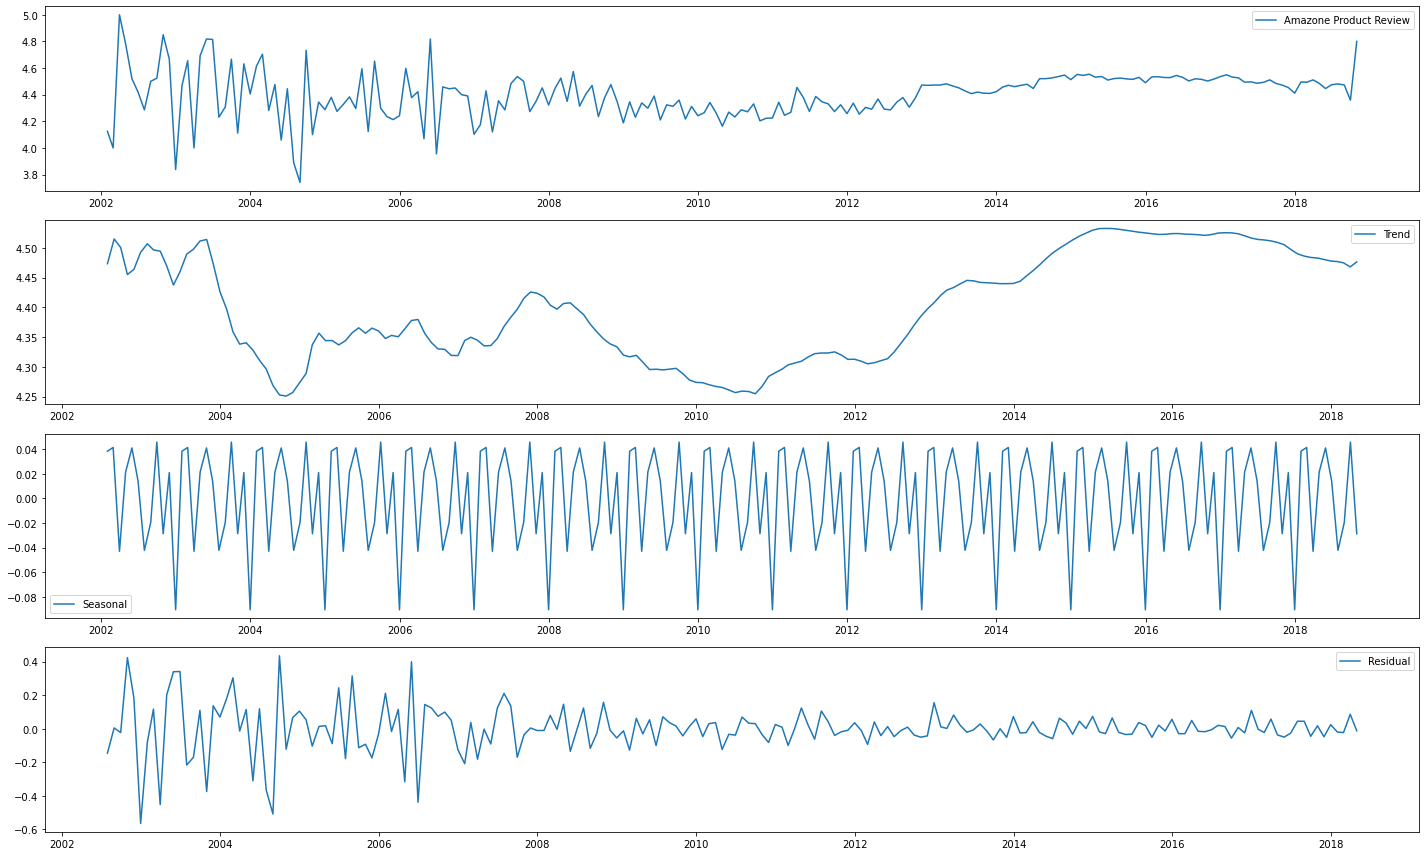

In [338]:
decomposition=seasonal_decompose(d1, period=12)
d_trend=decomposition.trend
d_seasonal=decomposition.seasonal
d_residual=decomposition.resid

# plotting all the 4 graphs
fig,ax = plt.subplots(4,1,figsize=(20,12))

plt.subplot(411)
plt.plot(d1,label='Amazone Product Review')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(d_trend,label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(d_seasonal,label='Seasonal')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(d_residual,label='Residual')
plt.legend(loc='best')

plt.tight_layout()

In the decomposition graph we can see that there is a decrease in rating from year 2002 and increase after 2011 and also the seasonality is present that means repeatation of total ratings in between specific time period over the years

### Data stationarity
ADF test to check the stationarity of data

In [339]:
checkStationarity(d1)

'p-value = 0.182. Data is not stationary'

Here we can see that if our Data is not stationary i.e. data don't have constant mean and constant variance over the time so for further processing we have to make data stationary so we can accurately do the statistical analysis.

### Differencing method 
subtracts the current value from the previous value 

In [340]:
shift1 = d1 - d1.shift(1)
checkStationarity(shift1.dropna())

'p-value = 0.000. Data is stationary'

In [341]:
Stationary_positive = shift1.dropna()

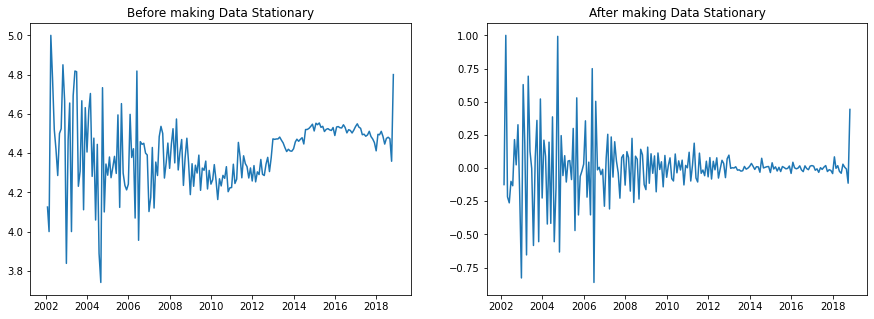

In [342]:
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(15,5))

ax[0].plot(d1)
ax[0].set_title('Before making Data Stationary')

ax[1].plot(Stationary_positive)
ax[1].set_title('After making Data Stationary')
plt.show()

ACF PACF Plot Just with a quick look over the left graph it’s easy to determine the time series is not stationary. The average value changes over time and the peaks in the seasonal periods seem to get only larger

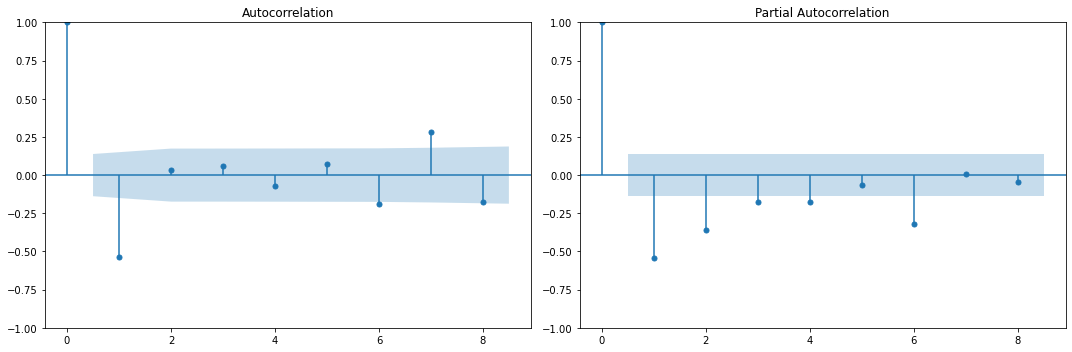

In [343]:
fig = plt.figure(figsize=(15,5))

# Show ACF
ax1 = fig.add_subplot(121)
sm.graphics.tsa.plot_acf(Stationary_positive, lags=8, ax=ax1)

# Show PACF
ax2 = fig.add_subplot(122)
sm.graphics.tsa.plot_pacf(Stationary_positive, lags=8, ax=ax2)
plt.tight_layout()

#### OBSERVATION
From the graph above we get the Q value to be 1 and P value to be 4

### Data spliting

In [344]:
train_size = int(0.8 * len(d1))

train = d1.iloc[:train_size]
test = d1.iloc[train_size:]
print("train = {}, test = {}".format(len(train), len(test)))

train = 161, test = 41


In [345]:
import warnings
warnings.filterwarnings('ignore')

In [346]:
for p in range(1,9):
    for q in range(1,9):
        m1 = ARIMA(Stationary_positive,order=(p,0,q))
        r1 = m1.fit()
        print(f'for AR{p,0,q} AIC score is {r1.aic}')

for AR(1, 0, 1) AIC score is -146.87506729408216
for AR(1, 0, 2) AIC score is -144.70551340926437
for AR(1, 0, 3) AIC score is -148.85625229106915
for AR(1, 0, 4) AIC score is -146.81674011182295
for AR(1, 0, 5) AIC score is -145.6496667436808
for AR(1, 0, 6) AIC score is -143.5527472810498
for AR(1, 0, 7) AIC score is -143.9729652800535
for AR(1, 0, 8) AIC score is -145.8645687694177
for AR(2, 0, 1) AIC score is -145.73772343755815
for AR(2, 0, 2) AIC score is -146.55131689465526
for AR(2, 0, 3) AIC score is -146.62666545619885
for AR(2, 0, 4) AIC score is -144.8536753487459
for AR(2, 0, 5) AIC score is -143.5583903682963
for AR(2, 0, 6) AIC score is -141.21517284986038
for AR(2, 0, 7) AIC score is -144.4875277191898
for AR(2, 0, 8) AIC score is -144.27782621994717
for AR(3, 0, 1) AIC score is -143.7785233853826
for AR(3, 0, 2) AIC score is -146.6232528005067
for AR(3, 0, 3) AIC score is -145.2009302349498
for AR(3, 0, 4) AIC score is -142.33721655928986
for AR(3, 0, 5) AIC score is -

ARMA(6,0,8) model giving the lowest AIC score thats we choose these parameters for further model training

In [347]:
p=6; q=8
model = ARIMA(train,order=(p,0,q))
result = model.fit()
print(result.summary())

                               SARIMAX Results                                
Dep. Variable:                overall   No. Observations:                  161
Model:                 ARIMA(6, 0, 8)   Log Likelihood                  56.971
Date:                Wed, 01 Feb 2023   AIC                            -81.942
Time:                        22:13:27   BIC                            -32.639
Sample:                    01-31-2002   HQIC                           -61.923
                         - 05-31-2015                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.3934      0.040    110.888      0.000       4.316       4.471
ar.L1          0.9238      0.361      2.561      0.010       0.217       1.631
ar.L2          0.2944      0.230      1.279      0.2

### Predictions

In [348]:
start = len(train)
end = len(train)+len(test)-1
pred = result.predict(start=start,end=end)

pred.index=d1.index[start:end+1]

### Plotting Actual and Predicted

<AxesSubplot:xlabel='reviewTime'>

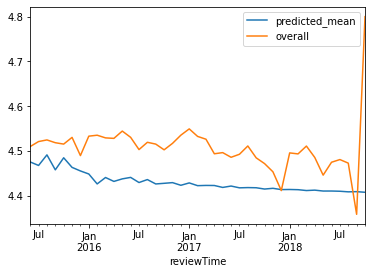

In [349]:
pred.plot(legend=True)
test.plot(legend=True)

Model is predicting near to the actual values but not the exact values and predictin values following the pattern of actual values overall ratings seems to rise after 2018 july

### Evaluation

In [350]:
mse = mean_squared_error(pred,test)
print('Mean squarred error for ARMA model is : ',round(mse,2))
print('\nRoot Mean squarred error for ARMA model is : ',np.sqrt(round(mse,2)))

Mean squarred error for ARMA model is :  0.01

Root Mean squarred error for ARMA model is :  0.1


### ARIMA model

In [351]:
for p in range(1,7):
    for q in range(1,7):
        m1 = ARIMA(Stationary_positive,order=(p,1,q))
        r1 = m1.fit()
        print(f'for AR{p,1,q} AIC score is {r1.aic}')

for AR(1, 1, 1) AIC score is -73.17358575601331
for AR(1, 1, 2) AIC score is -135.45747937346056
for AR(1, 1, 3) AIC score is -130.73195844957925
for AR(1, 1, 4) AIC score is -132.22514905606792
for AR(1, 1, 5) AIC score is -130.77572856034175
for AR(1, 1, 6) AIC score is -128.85509111405594
for AR(2, 1, 1) AIC score is -101.499724348054
for AR(2, 1, 2) AIC score is -86.53075941864064
for AR(2, 1, 3) AIC score is -132.7783231509057
for AR(2, 1, 4) AIC score is -136.92664049707537
for AR(2, 1, 5) AIC score is -135.9174837683031
for AR(2, 1, 6) AIC score is -134.55424520989786
for AR(3, 1, 1) AIC score is -108.72911206803188
for AR(3, 1, 2) AIC score is -99.83370400386357
for AR(3, 1, 3) AIC score is -130.67432247010572
for AR(3, 1, 4) AIC score is -135.71449858777703
for AR(3, 1, 5) AIC score is -136.2279904581841
for AR(3, 1, 6) AIC score is -134.93934004645672
for AR(4, 1, 1) AIC score is -115.60203970715702
for AR(4, 1, 2) AIC score is -117.18625375198138
for AR(4, 1, 3) AIC score is

ARIMA(6,1,1) Model giving the lowest AIC score

In [352]:
p=6; q=1
model = ARIMA(train,order=(p,1,q))
result = model.fit()

print(result.summary())

                               SARIMAX Results                                
Dep. Variable:                overall   No. Observations:                  161
Model:                 ARIMA(6, 1, 1)   Log Likelihood                  49.960
Date:                Wed, 01 Feb 2023   AIC                            -83.919
Time:                        22:13:48   BIC                            -59.318
Sample:                    01-31-2002   HQIC                           -73.929
                         - 05-31-2015                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7184      0.164     -4.369      0.000      -1.041      -0.396
ar.L2         -0.6333      0.155     -4.090      0.000      -0.937      -0.330
ar.L3         -0.4861      0.127     -3.814      0.0

In [353]:
pred = result.predict(start=start,end=end)

In [354]:
mse = mean_squared_error(pred,test)
print('Mean squarred error for ARMA model is : ',mse)
print('\nRoot Mean squarred error for ARMA model is : ',np.sqrt(mse))

Mean squarred error for ARMA model is :  0.004422530128176268

Root Mean squarred error for ARMA model is :  0.06650210619353547


In [355]:
m = SARIMAX(train, order=(6,1,1), seasonal_order=(6,1,1,12)).fit()

### Predictions

In [356]:
pred=m.predict(len(train),((len(train)+len(test)-1)))

SARIMA = pd.DataFrame({'Actual':test,
                     'Predicted':pred,
                     'Error':test-pred})
SARIMA

Actual  Predicted     Error
2015-06-30  4.509802   4.529686 -0.019884
2015-07-31  4.520956   4.572848 -0.051892
2015-08-31  4.524589   4.546599 -0.022010
2015-09-30  4.518361   4.590239 -0.071878
2015-10-31  4.515284   4.527452 -0.012168
2015-11-30  4.530265   4.538291 -0.008026
2015-12-31  4.489604   4.472557  0.017047
2016-01-31  4.532989   4.587426 -0.054438
2016-02-29  4.535126   4.558507 -0.023380
2016-03-31  4.529139   4.540618 -0.011478
2016-04-30  4.528057   4.580500 -0.052444
2016-05-31  4.544346   4.601273 -0.056928
2016-06-30  4.530359   4.534132 -0.003773
2016-07-31  4.503010   4.553542 -0.050531
2016-08-31  4.519286   4.564852 -0.045566
2016-09-30  4.515263   4.600112 -0.084849
2016-10-31  4.502491   4.528074 -0.025583
2016-11-30  4.516865   4.571685 -0.054820
2016-12-31  4.535221   4.536619 -0.001398
2017-01-31  4.549232   4.609112 -0.059880
2017-02-28  4.532454   4.595000 -0.062547
2017-03-31  4.526181   4.582477 -0.056296
2017-04-30  4.493652   4.612788 -0.119137
2017-05-31  4.496224   4.625444 -0.129220
2017-06-30  4.485806   4.577681 -0.091875
2017-07-31  4.492541   4.593848 -0.101308
2017-08-31  4.511066   4.592918 -0.081852
2017-09-30  4.484550   4.622613 -0.138063
2017-10-31  4.471693   4.571514 -0.099821
2017-11-30  4.453382   4.602968 -0.149586
2017-12-31  4.411427   4.573064 -0.161638
2018-01-31  4.495603   4.639478 -0.143875
2018-02-28  4.493361   4.629670 -0.136309
2018-03-31  4.510866   4.617305 -0.106439
2018-04-30  4.485357   4.641328 -0.155971
2018-05-31  4.445894   4.651665 -0.205771
2018-06-30  4.474706   4.610346 -0.135640
2018-07-31  4.480731   4.642127 -0.161396
2018-08-31  4.472765   4.638191 -0.165425
2018-09-30  4.358400   4.664981 -0.306581
2018-10-31  4.800000   4.621198  0.178802

### Evaluation

In [357]:
err=np.sqrt(mean_squared_error(test,pred))
print('RMSE:',err)

RMSE: 0.10975844182751528


### Actual and Predicted Plot

<AxesSubplot:>

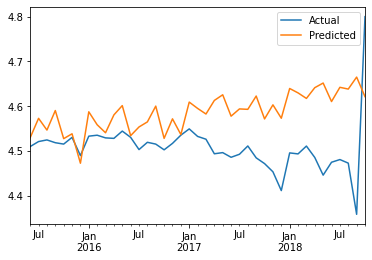

In [358]:
SARIMA[['Actual','Predicted']].plot()

### LJung Box Test

In [359]:
pvalue = sm.stats.acorr_ljungbox(m.resid,lags=[1],return_df=True)['lb_pvalue'].values
if pvalue < 0.05:
    print("Reject H0. Bad model")
else:
    print("Fail-to-Reject H0. Good model")

Fail-to-Reject H0. Good model


Fail To Reject the H0 , Therefore it is a Good model

### Forecasting future values

In [360]:
start = 202
end = 214
future =m.predict(start=start,end=end)
future

2018-11-30    4.647560
2018-12-31    4.609213
2019-01-31    4.678988
2019-02-28    4.665596
2019-03-31    4.656880
2019-04-30    4.675112
2019-05-31    4.686785
2019-06-30    4.647182
2019-07-31    4.678755
2019-08-31    4.673668
2019-09-30    4.705235
2019-10-31    4.652544
2019-11-30    4.679639
Freq: M, Name: predicted_mean, dtype: float64

<AxesSubplot:xlabel='reviewTime'>

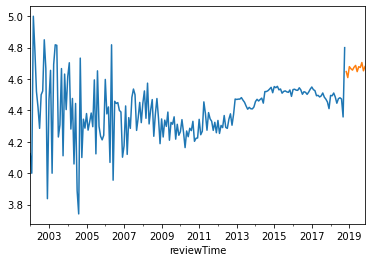

In [361]:
d1.plot()
future.plot()

In [362]:
future.describe()

count    13.000000
mean      4.665935
std       0.023829
min       4.609213
25%       4.652544
50%       4.673668
75%       4.678988
max       4.705235
Name: predicted_mean, dtype: float64

## Data insights

- Since we have data for upto year 2018 , we are predicting the future        outcomes for year 2019.
- The Average Rating For Year 2019 is 4.657113 and the Minimum is 4.599376 whereas 4.694732
- We are predicting the reviewTime , we can see a steep rise and stability after year 2013 , before 2013 we can see that there was no stability but the graph provides us the information about the year 2002
- We can also see that overall rating decreased after year 2002 , after 2002 we can hardly see 5 point review for toys and games over the years . 
- In 2007 where there is a steep high and low in overall reviews mainly because in 2007 Amazon released its new logo and the release of its first kindle in america .
- India being the huge market in asia and asia pacific region amazon established itself in indian marketplace in year 2013 and the boom of digitalization in india boosted the overall ratings and also the stability.
- Since we only have data for upto 2018 we can predict from various models and graphs that the overall rating is going to fall a bit but then gradually rise for year 2019.
- Considering the data from 2002 to 2018 we get to a point that the customers are mostly happy with the toys and games section of amazon.